In [3]:
from sqlalchemy import create_engine, text
import pandas.io.sql as psql

engine = create_engine('postgresql+psycopg2://w9i@localhost/w9i')

def read_sql_query(query):
    with engine.connect() as connection:
        result = psql.read_sql(query, connection).style.set_properties(**{'text-align': 'left'})
        return result
    
read_sql_query('select * from book')

,book_id,title,author_id,genre_id,price,amount
0,1,Мастер и Маргарита,1,1,670.990000,3
1,2,Белая гвардия,1,1,540.500000,5
2,3,Идиот,2,1,460.000000,10
3,4,Братья Карамазовы,2,1,799.010000,3
4,5,Игрок,2,1,480.500000,10
5,6,Стихотворения и поэмы,3,2,650.000000,15
6,7,Черный человек,3,2,570.200000,6
7,8,Лирика,4,2,518.990000,2


# Задание
### В конце года цену всех книг на складе пересчитывают – снижают ее на 30%. Написать SQL запрос, который из таблицы book выбирает названия, авторов, количества и вычисляет новые цены книг. Столбец с новой ценой назвать new_price, цену округлить до 2-х знаков после запятой.

In [3]:
read_sql_query("""
SELECT title, author, amount,
    ROUND(price - (0.3 * price), 2) AS new_price
FROM book
""")

,title,author,amount,new_price
0,Мастер и Маргарита,Булгаков М.А.,3,469.690000
1,Белая гвардия,Булгаков М.А.,5,378.350000
2,Идиот,Достоевский Ф.М.,10,322.000000
3,Братья Карамазовы,Достоевский Ф.М.,2,559.310000
4,Стихотворения и поэмы,Есенин С.А.,15,455.000000


<h2>Выборка данных, вычисляемые столбцы, логические&nbsp;функции</h2>

<p>В SQL реализована возможность заносить в поле значение в зависимости от условия. 
    Для этого используется функция <code>IF()</code>:</p>

<code class="language-sql hljs">IF(логическое_выражение, выражение_1, выражение_2)</code>

<p>Функция вычисляет <code>логическое_выражение,</code> если оно истина – в поле заносится значение <code>выражения_1</code>, в противном случае –&nbsp; значение <code>выражения_2. </code>Все три параметра <code>IF() </code>являются обязательными.</p>

<p>Допускается использование вложенных функций, вместо <code>выражения_1</code> или <code>выражения_2</code> может стоять новая функция <code><strong>IF</strong></code>.</p>

<p><strong>Пример&nbsp;</strong></p>

<p>Для каждой книги из таблицы <code><strong>book</strong></code>&nbsp;установим скидку следующим образом: если количество книг меньше 4, то скидка будет составлять 50% от цены, в противном случае 30%.</p>

<p>В PostgreSQL вместо&nbsp;<code>IF</code>&nbsp; используют конструкцию&nbsp;<code>CASE ... WHEN ... THEN ... ELSE ... END</code>&nbsp;и <a href="https://www.postgresql.org/docs/12/functions-conditional.html" rel="noopener noreferrer nofollow" target="_blank">некоторые другие</a>.</p>

<code class="hljs ada">...
    <span class="hljs-keyword">CASE</span>
        <span class="hljs-keyword">WHEN</span> author = <span class="hljs-symbol">'Text</span> <span class="hljs-number">1</span>' <span class="hljs-keyword">THEN</span> price * <span class="hljs-number">2</span>
        <span class="hljs-keyword">WHEN</span> author = <span class="hljs-symbol">'Text</span> <span class="hljs-number">2</span>' <span class="hljs-keyword">THEN</span> price * <span class="hljs-number">3</span>
        <span class="hljs-keyword">ELSE</span> price <span class="hljs-keyword">END</span>
...</code>

In [4]:
read_sql_query("""
SELECT title, amount, price, 
    ROUND(CASE
        WHEN amount < 4 THEN price*0.5
        ELSE price*0.7 END, 2) AS sale
FROM book
""")

,title,amount,price,sale
0,Мастер и Маргарита,3,670.990000,335.500000
1,Белая гвардия,5,540.500000,378.350000
2,Идиот,10,460.000000,322.000000
3,Братья Карамазовы,2,799.010000,399.510000
4,Стихотворения и поэмы,15,650.000000,455.000000


<p><strong>Пример</strong></p>

<p>Усложним вычисление скидки в зависимости от количества книг.&nbsp;Если количество книг меньше 4 – то скидка 50%, меньше 11&nbsp;– 30%, в остальных случаях – 10%. И еще укажем какая именно скидка на каждую книгу.</p>

In [5]:
read_sql_query("""
SELECT title, amount, price,
ROUND(
    CASE
        WHEN amount < 4 THEN price * 0.5
        ELSE
            CASE
                WHEN amount < 11 THEN price * 0.7
                ELSE price * 0.9
                END
        END
,2) AS sale,
CASE
    WHEN amount<4 THEN 'скидка 50%%'
    ELSE
        CASE
            WHEN amount < 11 THEN 'скидка 30%%'
            ELSE 'скидка 10%%'
            END
    END AS Ваша_скидка
FROM book
""")

,title,amount,price,sale,Ваша_скидка
0,Мастер и Маргарита,3,670.990000,335.500000,скидка 50%
1,Белая гвардия,5,540.500000,378.350000,скидка 30%
2,Идиот,10,460.000000,322.000000,скидка 30%
3,Братья Карамазовы,2,799.010000,399.510000,скидка 50%
4,Стихотворения и поэмы,15,650.000000,585.000000,скидка 10%


## Задание

#### <p>При анализе продаж книг выяснилось, что наибольшей популярностью пользуются книги Михаила Булгакова, на втором месте книги Сергея Есенина. Исходя из этого решили поднять цену книг Булгакова на 10%, а цену книг Есенина - на 5%. Написать запрос, куда включить автора, название книги и новую цену, последний столбец назвать <code><strong>new_price</strong></code>. Значение округлить до двух знаков после запятой.</p>

In [6]:
read_sql_query("""
SELECT author, title,
ROUND(
CASE
    WHEN author = 'Булгаков М.А.' THEN (price*0.10) + price
    WHEN author = 'Есенин С.А.' THEN (price*0.05) + price
    ELSE price
    END ,2) AS new_price
FROM book
""")

,author,title,new_price
0,Булгаков М.А.,Мастер и Маргарита,738.090000
1,Булгаков М.А.,Белая гвардия,594.550000
2,Достоевский Ф.М.,Идиот,460.000000
3,Достоевский Ф.М.,Братья Карамазовы,799.010000
4,Есенин С.А.,Стихотворения и поэмы,682.500000


## Выборка данных по усовию
<p>С помощью запросов можно включать в итоговую выборку не все строки исходной таблицы, а только те, которые отвечают некоторому условию. Для этого после указания таблицы, откуда выбираются данные, задается ключевое слово <code>WHERE</code> и логическое выражение, от результата которого зависит будет ли включена строка в выборку или нет. Если условие – истина, то строка(запись) &nbsp;включается в выборку, если ложь – нет.</p>

<p>Логическое выражение может включать <strong>операторы сравнения&nbsp;</strong>(равно «<strong>=</strong>», не равно «<strong>&lt;&gt;</strong>», больше «<strong>&gt;</strong>», меньше «<strong>&lt;</strong>», больше или равно«<strong>&gt;=</strong>», меньше или равно «<strong>&lt;=</strong>») и выражения, допустимые в SQL.</p>

### Пример

<p>Вывести название и цену тех книг, цены которых меньше 600 рублей.</p>

In [7]:
read_sql_query("""
SELECT title, price
FROM book
WHERE price < 600
""")

,title,price
0,Белая гвардия,540.500000
1,Идиот,460.000000


### Пример

<p>Вывести название, автора&nbsp; и стоимость (цена умножить на количество) тех книг, стоимость которых&nbsp;больше 4000 рублей</p>

In [8]:
read_sql_query("""
SELECT title, author, price * amount AS total
FROM book
WHERE price * amount > 4000
""")

,title,author,total
0,Идиот,Достоевский Ф.М.,4600.000000
1,Стихотворения и поэмы,Есенин С.А.,9750.000000


## Задание
### Вывести автора, название  и цены тех книг, количество которых меньше 10.

In [9]:
read_sql_query("""
SELECT author, title, price
FROM book
WHERE amount < 10
""")

,author,title,price
0,Булгаков М.А.,Мастер и Маргарита,670.990000
1,Булгаков М.А.,Белая гвардия,540.500000
2,Достоевский Ф.М.,Братья Карамазовы,799.010000


## Выборка данных, логические операции.

<p><strong>&nbsp;</strong>Логическое выражение после ключевого слова <code>WHERE</code> кроме операторов сравнения&nbsp; и выражений может включать &nbsp;<strong>логические операции</strong>&nbsp;(И «<strong>and</strong>», ИЛИ «<strong>or</strong>», НЕ «<strong>not</strong>») и круглые скобки, изменяющие приоритеты выполнения операций.</p>

<p>Приоритеты операций:</p>

<ol>
	<li>круглые скобки</li>
	<li>умножение &nbsp;(*), &nbsp;деление (/)</li>
	<li>сложение &nbsp;(+), вычитание (-)</li>
	<li>операторы сравнения (=, &gt;, &lt;, &gt;=, &lt;=, &lt;&gt;)</li>
	<li>NOT</li>
	<li>AND</li>
	<li>OR</li>
</ol>

### Пример
<p>Вывести название, автора и цену тех книг, которые написал Булгаков, ценой больше 600 рублей</p>

In [10]:
read_sql_query("""
SELECT title, author, price
FROM book
WHERE price > 600 AND author = 'Булгаков М.А.'
""")

,title,author,price
0,Мастер и Маргарита,Булгаков М.А.,670.990000


## Пример
<p>Вывести название,&nbsp;цену&nbsp; тех книг, которые написал Булгаков или Есенин, ценой больше 600 рублей</p>

In [11]:
read_sql_query("""
SELECT title, author, price
FROM book
WHERE (author = 'Булгаков М.А.' OR author = 'Есенин С.А.') AND price > 600
""")

,title,author,price
0,Мастер и Маргарита,Булгаков М.А.,670.990000
1,Стихотворения и поэмы,Есенин С.А.,650.000000


### Пояснение

<p>В данном запросе обязательно нужно поставить скобки, так как без них сначала вычисляется &nbsp;<code>author = 'Есенин С.А.' and price &gt; 600,</code> а потом уже выражение через <code>or</code>. Без скобок были бы&nbsp;отобраны все книги Булгакова и те книги Есенина, цена которых больше 600.</p>

In [12]:
read_sql_query("""
SELECT title, author, price 
FROM book
WHERE author = 'Булгаков М.А.' OR author = 'Есенин С.А.' AND price > 600
""")

,title,author,price
0,Мастер и Маргарита,Булгаков М.А.,670.990000
1,Белая гвардия,Булгаков М.А.,540.500000
2,Стихотворения и поэмы,Есенин С.А.,650.000000


<h2>Задание</h2>

<p>Вывести название, автора, &nbsp;цену &nbsp;и количество всех книг, цена которых меньше 500 или больше 600, а стоимость всех экземпляров этих книг&nbsp;больше или равна 5000.</p>

In [13]:
read_sql_query("""
SELECT title, author, price, amount
FROM book
WHERE (price < 500 OR price > 600) AND amount*price >= 5000
""")

,title,author,price,amount
0,Стихотворения и поэмы,Есенин С.А.,650.000000,15


<h2>Выборка данных, операторы BETWEEN, IN</h2>

<p><strong>&nbsp;</strong>Логическое выражение после ключевого слова <code>WHERE</code> может включать операторы &nbsp;<strong><code>BETWEEN</code></strong> и <strong><code>IN</code></strong>. Приоритет&nbsp; у этих операторов такой же как у операторов сравнения, то есть они выполняются раньше, чем <code><strong>NOT</strong></code>, <code><strong>AND</strong>,</code> <code><strong>OR</strong></code>.</p>

<p>Оператор <code>BETWEEN</code> позволяет отобрать данные, относящиеся к некоторому интервалу, включая его границы.</p>

<p><strong>Пример</strong></p>

<p>Выбрать названия и количества тех книг, количество которых от 5 до 14 включительно.</p>

In [14]:
read_sql_query("""
SELECT title, amount
FROM book
WHERE amount BETWEEN 5 AND 14
""")

,title,amount
0,Белая гвардия,5
1,Идиот,10


<p>Этот запрос можно реализовать по-другому, результат будет точно такой же.</p>

In [15]:
read_sql_query("""
SELECT title, amount
FROM book
WHERE amount >= 5 AND amount <= 14
""")

,title,amount
0,Белая гвардия,5
1,Идиот,10


<p><strong>Пример</strong></p>

<p>Выбрать названия и цены&nbsp;книг, написанных Булгаковым или Достоевским.</p>

In [16]:
read_sql_query("""
SELECT title, price
FROM book
WHERE author IN ('Булгаков М.А.', 'Достоевский Ф.М.')
""")

,title,price
0,Мастер и Маргарита,670.990000
1,Белая гвардия,540.500000
2,Идиот,460.000000
3,Братья Карамазовы,799.010000


<p>Этот запрос можно реализовать по-другому, результат будет точно такой же.</p>

In [17]:
read_sql_query("""
SELECT title, price 
FROM book
WHERE author = 'Булгаков М.А.' OR author = 'Достоевский Ф.М.';
""")

,title,price
0,Мастер и Маргарита,670.990000
1,Белая гвардия,540.500000
2,Идиот,460.000000
3,Братья Карамазовы,799.010000


<h2>Задание</h2>

<p>Вывести название и авторов тех книг, цены которых принадлежат интервалу от 540.50 до 800 (включая границы), &nbsp;а количество или 2, или 3, или 5, или 7 .</p>

In [18]:
read_sql_query("""
SELECT title, author
FROM book
WHERE (price BETWEEN 540.50 AND 800) AND amount IN (2, 3, 5)
""")

,title,author
0,Мастер и Маргарита,Булгаков М.А.
1,Белая гвардия,Булгаков М.А.
2,Братья Карамазовы,Достоевский Ф.М.


<h2>Выборка данных с сортировкой</h2>

<p>При выборке можно указывать столбец или несколько столбцов, по которым необходимо отсортировать отобранные строки. Для этого используются ключевые слова <code>ORDER BY</code>, после которых задаются имена столбцов. При этом строки сортируются по первому столбцу, если указан второй столбец, сортировка осуществляется только для тех строк, у которых&nbsp;значения первого столбца одинаковы. По умолчанию&nbsp;<code>ORDER BY</code> выполняет сортировку по возрастанию. Чтобы управлять направлением сортировки вручную, после имени столбца указывается ключевое слово <code>ASC</code> (по возрастанию) или <code>DESC</code> (по убыванию).&nbsp;</p>

<p>Столбцы после ключевого слова <code>ORDER BY</code> можно задавать:</p>

<ul>
	<li>названием столбца;</li>
	<li>номером столбца;</li>
	<li>именем столбца (указанным после <code>AS</code>).</li>
</ul>

<strong>Пример</strong>

<p>Вывести название, автора и цены книг. Информацию &nbsp;отсортировать по названиям книг&nbsp;в алфавитном порядке.</p>

In [21]:
read_sql_query("""
SELECT title, author, price
FROM book
ORDER BY title
""")

,title,author,price
0,Белая гвардия,Булгаков М.А.,540.500000
1,Братья Карамазовы,Достоевский Ф.М.,799.010000
2,Идиот,Достоевский Ф.М.,460.000000
3,Мастер и Маргарита,Булгаков М.А.,670.990000
4,Стихотворения и поэмы,Есенин С.А.,650.000000


<p>Аналогичный результат получится при использовании запроса:</p>

In [22]:
read_sql_query("""
SELECT title, author, price
FROM book
ORDER BY 1;
""")

,title,author,price
0,Белая гвардия,Булгаков М.А.,540.500000
1,Братья Карамазовы,Достоевский Ф.М.,799.010000
2,Идиот,Достоевский Ф.М.,460.000000
3,Мастер и Маргарита,Булгаков М.А.,670.990000
4,Стихотворения и поэмы,Есенин С.А.,650.000000


## Пример

<p>Вывести автора, название и количество&nbsp;книг, в отсортированном в алфавитном порядке по автору и по убыванию количества, для тех книг, цены которых меньше 750 рублей.</p>

In [25]:
read_sql_query("""
SELECT author, title, amount AS Количество
FROM book
WHERE price < 750
ORDER BY author, amount DESC;
""")

,author,title,Количество
0,Булгаков М.А.,Белая гвардия,5
1,Булгаков М.А.,Мастер и Маргарита,3
2,Достоевский Ф.М.,Идиот,10
3,Есенин С.А.,Стихотворения и поэмы,15


<p>Можно использовать другие варианты записи запроса:</p>

In [26]:
read_sql_query("""
SELECT author, title, amount AS Количество
FROM book
WHERE price < 750
ORDER BY author, Количество DESC;
""")

,author,title,Количество
0,Булгаков М.А.,Белая гвардия,5
1,Булгаков М.А.,Мастер и Маргарита,3
2,Достоевский Ф.М.,Идиот,10
3,Есенин С.А.,Стихотворения и поэмы,15


In [27]:
read_sql_query("""
SELECT author, title, amount AS Количество
FROM book
WHERE price < 750
ORDER BY 1, 3 DESC;
""")

,author,title,Количество
0,Булгаков М.А.,Белая гвардия,5
1,Булгаков М.А.,Мастер и Маргарита,3
2,Достоевский Ф.М.,Идиот,10
3,Есенин С.А.,Стихотворения и поэмы,15


<p><strong>Важно! </strong>Если названия столбцов заключены в кавычки, то при использовании их в сортировке, необходимо записывать их БЕЗ КАВЫЧЕК.</p>

## Задание

<p>Вывести &nbsp;автора и название &nbsp;книг, количество которых принадлежит интервалу от 2 до 14 (включая границы).&nbsp;Информацию &nbsp;отсортировать сначала по авторам (в обратном алфавитном порядке), а затем по названиям книг (по алфавиту).</p>

In [28]:
read_sql_query("""
SELECT author, title
FROM book
WHERE amount BETWEEN 2 AND 14
ORDER BY author DESC, title
""")

,author,title
0,Достоевский Ф.М.,Братья Карамазовы
1,Достоевский Ф.М.,Идиот
2,Булгаков М.А.,Белая гвардия
3,Булгаков М.А.,Мастер и Маргарита


<h2>Выборка данных, оператор LIKE</h2>

<p>Оператор <code>LIKE</code> используется для сравнения строк. В отличие от операторов отношения равно (<strong>=</strong>) и не равно (<strong>&lt;&gt;</strong>), <code>LIKE</code> позволяет сравнивать строки не на полное совпадение (не совпадение), а в соответствии с шаблоном.&nbsp;Шаблон может включать <strong>обычные символы</strong> и <strong>символы-шаблоны</strong>.&nbsp;При сравнении с шаблоном,&nbsp;его обычные символы должны в точности совпадать с символами, указанными в строке.&nbsp;Символы-шаблоны могут совпадать с произвольными элементами символьной строки.</p>

<table border="1">
	<thead>
		<tr style="background-color: #e6f8e0; background: #e6f8e0; text-align: center;">
			<th><sup>Символ-шаблон</sup></th>
			<th>Описание</th>
			<th>Пример</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td><strong>%</strong></td>
			<td>Любая строка, содержащая ноль или более символов</td>
			<td><code>SELECT * FROM book WHERE author LIKE '%М.%' </code><br>
			выполняет поиск и выдает все книги, инициалы авторов которых содержат «<em>М.</em>»</td>
		</tr>
		<tr>
			<td><strong>_ </strong><sup>(подчеркивание)</sup></td>
			<td>Любой одиночный символ</td>
			<td><code>SELECT * FROM book WHERE title LIKE 'Поэм_' </code><br>
			выполняет поиск и выдает все книги, названия которых либо «<em>Поэма</em>», либо «<em>Поэмы</em>» и пр.</td>
		</tr>
	</tbody>
</table>

In [31]:
read_sql_query("""
SELECT * FROM book WHERE author LIKE '%%М.%%'
""")

,book_id,title,author,price,amount
0,1,Мастер и Маргарита,Булгаков М.А.,670.990000,3
1,2,Белая гвардия,Булгаков М.А.,540.500000,5
2,3,Идиот,Достоевский Ф.М.,460.000000,10
3,4,Братья Карамазовы,Достоевский Ф.М.,799.010000,2


## Пример 1

<p>Вывести названия книг, начинающихся с буквы&nbsp;«<em>Б</em>».</p>

In [37]:
read_sql_query("""
SELECT title 
FROM book
WHERE title LIKE 'Б%%';
/* эквивалентное условие 
title LIKE 'б%%'
*/
""")

,title
0,Белая гвардия
1,Братья Карамазовы


## Пример 2

<p>Вывести название книг, состоящих ровно из 5 букв.</p>

In [39]:
read_sql_query("""
SELECT title FROM book
WHERE title LIKE '_____'
""")

,title
0,Идиот


## Пример 3

<p>Вывести книги, название которых длиннее 5 символов:</p>

In [41]:
read_sql_query("""
SELECT title FROM book
WHERE title LIKE '______%%'
/* эквивалентные условия 
title LIKE "%%______"
title LIKE "%%______%%"
*/
""")

,title
0,Мастер и Маргарита
1,Белая гвардия
2,Братья Карамазовы
3,Стихотворения и поэмы


## Пример 4

<p>Вывести названия книг, которые содержат букву <strong>"и"</strong> как отдельное слово, если считать, что слова в названии отделяются друг от друга пробелами и не содержат знаков препинания.</p>

In [42]:
read_sql_query("""
SELECT title FROM book
WHERE title LIKE '_%% и _%%' /* отбирает слово И внутри названия */
    OR title LIKE 'и _%%' /* отбирает слово И в начале названия */
    OR title LIKE '_%% и' /*отбирает слово И в конце названия */
    OR title LIKE 'и' /* отбирает название, состоящее из одного слова И */
""")

,title
0,Мастер и Маргарита
1,Стихотворения и поэмы


## Пример 5

<p>Вывести названия книг, которые состоят ровно из одного слова, если считать, что слова в названии отделяются друг от друга пробелами .</p>

In [45]:
read_sql_query("""
SELECT title FROM book
WHERE title NOT LIKE '%% %%'
""")

,title
0,Идиот


<h2>Задание</h2>

<p>Вывести название и автора тех книг, название которых состоит из двух и более слов, а инициалы автора содержат букву «С». Считать, что в названии слова отделяются друг от друга пробелами и не содержат знаков препинания, между фамилией автора и инициалами обязателен пробел, инициалы записываются без пробела в формате: буква, точка, буква, точка. Информацию отсортировать по названию книги в алфавитном порядке.</p>

In [66]:
read_sql_query("""
SELECT title, author FROM book
WHERE (title LIKE '%%_ _%%') AND (author LIKE '%%С.%%')
ORDER BY title
""")

,title,author
0,Стихотворения и поэмы,Есенин С.А.


<h2>Выбор уникальных элементов столбца</h2>

<p>Чтобы отобрать уникальные элементы некоторого столбца используется ключевое слово <code>DISTINCT</code>, которое размещается сразу после <code>SELECT</code>.</p>

<strong>Пример</strong>

<p>Выбрать различных&nbsp;авторов, книги которых хранятся в таблице<code><strong> book</strong></code>.</p>

In [67]:
read_sql_query("""
SELECT DISTINCT author
FROM book;
""")

,author
0,Есенин С.А.
1,Булгаков М.А.
2,Достоевский Ф.М.


<p>Другой способ – использование оператора <code>GROUP BY</code>, который группирует данные при выборке, имеющие одинаковые значения в некотором столбце. Столбец, по которому осуществляется группировка, указывается после <code>GROUP BY</code>&nbsp;.</p>

<p>С помощью <code>GROUP BY</code>&nbsp;можно выбрать уникальные элементы столбца, по которому осуществляется группировка. Результат будет точно такой же как при использовании <code>DISTINCT</code>.</p>

In [68]:
read_sql_query("""
SELECT author
FROM book
GROUP BY author
""")

,author
0,Есенин С.А.
1,Булгаков М.А.
2,Достоевский Ф.М.


<h2>Задание</h2>

<p>Отобрать различные (уникальные) элементы столбца <code><strong>amount</strong></code> таблицы<code><strong> book</strong></code>.</p>

In [71]:
read_sql_query("""
SELECT amount FROM book
GROUP BY amount
""")

,amount
0,15
1,3
2,5
3,10
4,2


<h2>Выборка данных, групповые функции SUM&nbsp;и COUNT</h2>

<p>При группировке над элементами столбца, входящими в группу можно выполнить различные действия, например, просуммировать их или найти количество элементов в группе.</p>

<p>Подробно рассмотрим, как осуществляется группировка данных по некоторому столбцу и вычисления над группой на следующем примере:</p>

In [80]:
read_sql_query("""
SELECT author, sum(amount), count(amount)
FROM book
GROUP by author
""")

,author,sum,count
0,Есенин С.А.,15,1
1,Булгаков М.А.,8,2
2,Достоевский Ф.М.,23,3


<p>1. В таблице <code><strong>book</strong></code> определяются строки, в которых в столбце <code><strong>author</strong></code> одинаковые значения:</p>

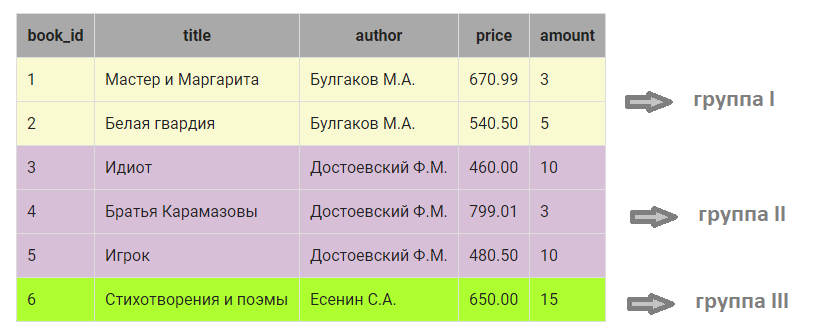

<p>Получили 3 различные группы:</p>

<ul>
	<li><strong>группа I</strong> объединяет две записи, у которых в столбце <code><strong>author</strong></code> значение Булгаков&nbsp;М.А.;</li>
	<li><strong>группа II</strong> объединяет три записи, у которых в столбце <code><strong>author</strong></code> значение Достоевский Ф.М.;</li>
	<li><strong>группа III</strong> объединяет одну запись, у которой в столбце <code><strong>author</strong></code> значение Есенин С.А.</li>
</ul>

<p>2. Вместо каждой группы в результирующий запрос включается&nbsp; одна запись. Запись как минимум включает значение столбца, по которому осуществляется группировка (в нашем случае это <code><strong>author</strong></code>):</p>

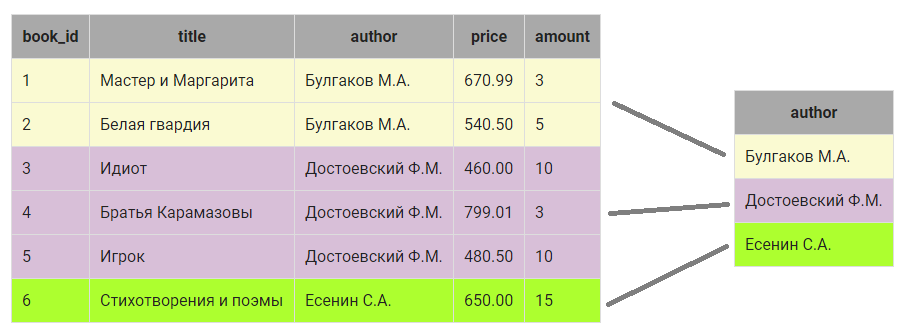

<p>3. Дальше можно выполнить вычисления над&nbsp;элементами КАЖДОЙ группы в отдельности, например, посчитать общее количество экземпляров книг каждого автора. Для этого используется групповая функция <code>SUM()</code>, а в скобках указывается столбец, по которому нужно выполнить суммирование ( в нашем случае <code><strong>amount</strong></code>):</p>

<p>4. Также можно посчитать, сколько записей относится к группе. Для этого используется функция <code>COUNT()</code>, в скобках можно указать ЛЮБОЙ столбец из группы, если группа не содержит пустых значений (ниже приведен пример, в котором показано, как работает <code><strong>COUNT()</strong></code>, если в группе есть пустые значения):</p>

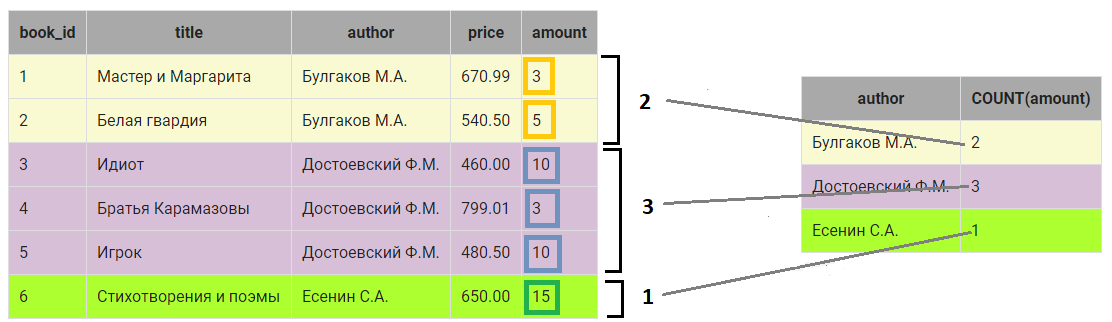

## Пример

<p>Посчитать, сколько экземпляров книг каждого автора хранится на складе.</p>

In [73]:
read_sql_query("""
SELECT author, SUM(amount)
FROM book
GROUP by author
""")

,author,sum
0,Есенин С.А.,15
1,Булгаков М.А.,8
2,Достоевский Ф.М.,12


## Пример

<p>Посчитать, сколько различных&nbsp;книг каждого автора хранится на складе.</p>

<p>Только для этого примера в таблицу<code><strong> book</strong></code> добавлена запись с пустыми значениями в столбцах <code><strong>amount</strong></code> и <code><strong>price</strong></code>:</p>

In [83]:
read_sql_query("""
/* чтобы проверить запрос, добавьте в таблицу строку */
INSERT INTO book (title, author, price, amount) 
VALUES ('Черный человек','Есенин С.А.', Null, Null);

SELECT author, COUNT(author) AS count_author, 
COUNT(amount) AS count_amount, COUNT(*) AS count_all
FROM book
GROUP BY author
""")

,author,count_author,count_amount,count_all
0,Есенин С.А.,2,1,2
1,Булгаков М.А.,2,2,2
2,Достоевский Ф.М.,3,3,3


<p>Из таблицы с результатами запроса видно, что&nbsp;функцию&nbsp;<code><strong>COUNT()</strong></code>&nbsp;можно применять к любому столбцу, в том числе можно использовать и <code><strong>*</strong></code>, если таблица не содержит пустых значений. Если же в столбцах есть значения <code><strong>Null</strong></code>, (для группы по автору Есенин в нашем примере), то</p>

<ul>
	<li><code><strong>COUNT(*) </strong></code>— &nbsp;подсчитывает&nbsp; все записи, относящиеся к группе, в том числе и со значением&nbsp;<code><strong>NULL</strong></code>;</li>
	<li><code><strong>COUNT(имя_столбца)</strong></code> —&nbsp;возвращает количество записей конкретного столбца (только <code><strong>NOT NULL</strong></code>), относящихся к группе.</li>
</ul>

<p><strong>ВАЖНО.</strong></p>

<ol>
	<li>Если столбец указан в&nbsp;<code>SELECT</code>&nbsp;&nbsp;<strong>БЕЗ&nbsp;</strong>применения групповой функции, то он обязательно должен быть указан и в<code>GROUP BY.</code>Иначе получим ошибку.</li>
	<li>Между названием функции и скобкой <span style="color: #ff4363;"><strong>НЕЛЬЗЯ СТАВИТЬ ПРОБЕЛ</strong></span>. Это особенность платформы.</li>
</ol>

<h2>Задание</h2>

<p>Посчитать, количество различных&nbsp;книг и количество экземпляров книг каждого автора&nbsp;, хранящихся на складе. &nbsp;Столбцы назвать <code><strong>Автор,</strong>&nbsp;<strong>Различных_книг</strong></code> и<strong> <code>Количество_экземпляров</code></strong> соответственно.</p>

In [86]:
read_sql_query("""
SELECT author AS Автор, count(title) AS Различных_книг, sum(amount) AS Количество_экземпляров
FROM book
GROUP BY author
""")

,Автор,Различных_книг,Количество_экземпляров
0,Есенин С.А.,1,15
1,Булгаков М.А.,2,8
2,Достоевский Ф.М.,3,23


<h2>Выборка данных, групповые функции MIN, MAX и AVG</h2>

<p>К групповым функциям SQL относятся: <code>MIN()</code>, <code>MAX()</code> и <code>AVG()</code>, которые вычисляют минимальное, максимальное и среднее значение элементов столбца, относящихся к группе.</p>

<strong>Пример</strong>

<p>Вывести минимальную цену книги каждого автора</p>

In [87]:
read_sql_query("""
SELECT author, MIN(price) AS min_price
FROM book
GROUP BY author
""")

,author,min_price
0,Есенин С.А.,650.000000
1,Булгаков М.А.,540.500000
2,Достоевский Ф.М.,460.000000


<h2>Задание</h2>

<p>Вывести фамилию и инициалы автора, минимальную, максимальную и среднюю цену книг каждого автора . Вычисляемые столбцы назвать <strong>Минимальная_цена, Максимальная_цена</strong> и<strong> Средняя_цена</strong> соответственно.</p>

In [89]:
read_sql_query("""
SELECT author, 
MIN(price) AS Минимальная_цена, 
MAX(price) AS Максимальная_цена, 
AVG(price) AS Средняя_цена
FROM book
GROUP BY author
""")

,author,Минимальная_цена,Максимальная_цена,Средняя_цена
0,Есенин С.А.,650.000000,650.000000,650.000000
1,Булгаков М.А.,540.500000,670.990000,605.745000
2,Достоевский Ф.М.,460.000000,799.010000,579.836667


<h2>Выборка данных c вычислением, групповые функции</h2>

<p>В качестве аргумента групповых функций &nbsp;SQL может использоваться не только столбец, но и любое допустимое в SQL арифметическое выражение.</p>

<strong>Пример</strong>

<p>Вывести суммарную стоимость книг каждого автора.</p>



In [91]:
read_sql_query("""
SELECT author, SUM(price * amount) AS Стоимость
FROM book
GROUP BY author
""")

,author,Стоимость
0,Есенин С.А.,9750.000000
1,Булгаков М.А.,4715.470000
2,Достоевский Ф.М.,11802.030000


<p>Групповые функции могут быть элементами выражений. Например, при вычислении средней стоимости книг каждого автора на предыдущем шаге получились значения с шестью знаками после запятой. А поскольку это деньги, значения нужно округлить до 2 знаков после запятой.</p>

## Пример

<p>Найти среднюю цену книг&nbsp;каждого автора.</p>

In [92]:
read_sql_query("""
SELECT author, ROUND(AVG(price),2) AS Средняя_цена
FROM book
GROUP BY author
""")

,author,Средняя_цена
0,Есенин С.А.,650.000000
1,Булгаков М.А.,605.750000
2,Достоевский Ф.М.,579.840000


<p>Для каждого автора вычислить суммарную стоимость книг <strong>S</strong>&nbsp;(имя столбца <strong>Стоимость</strong>), а также вычислить налог на добавленную стоимость &nbsp;для полученных сумм (имя столбца <strong>НДС</strong>&nbsp;) , который <strong>включен в стоимость</strong> и составляет 18% (<strong>k=18</strong>),&nbsp; а также стоимость книг &nbsp;(<strong>Стоимость_без_НДС</strong>) без него. Значения округлить до двух знаков после запятой. В запросе для расчета НДС(<strong><em>tax</em></strong>)&nbsp;&nbsp;и Стоимости без НДС(<strong><em>S_without_tax</em></strong>)&nbsp;использовать следующие формулы:</p>

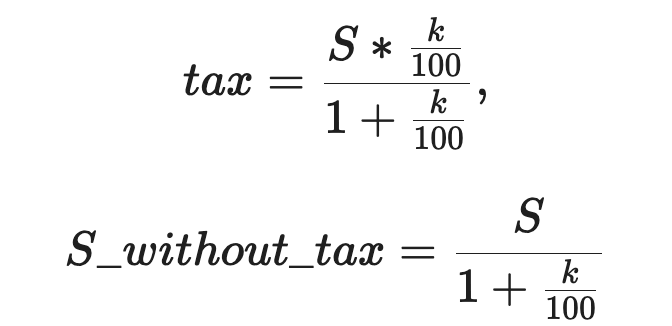

In [116]:
read_sql_query("""
SELECT author, SUM(price*amount) AS Стоимость,
ROUND((SUM(price*amount)*(18.0/100.0))/(1.0+18.0/100.0), 2) AS НДС,
ROUND(SUM(price*amount)/(1.0+18.0/100.0), 2) AS Стоимость_без_НДС
FROM book
GROUP BY author
""")

,author,Стоимость,НДС,Стоимость_без_НДС
0,Есенин С.А.,9750.000000,1487.290000,8262.710000
1,Булгаков М.А.,4715.470000,719.310000,3996.160000
2,Достоевский Ф.М.,11802.030000,1800.310000,10001.720000


<h2>Вычисления по таблице целиком</h2>

<p>Групповые функции позволяют вычислять итоговые значения по всей таблице. Например, можно посчитать общее количество книг на складе, вычислить суммарную стоимость и пр. Для этого после ключевого слова <code>SELECT</code> указывается групповая функция для&nbsp;выражения или имени столбца,&nbsp;а ключевые слова <code>GROUP BY</code> опускаются.</p>

<strong>Пример</strong>

<p>Посчитать количество экземпляров книг на складе.</p>

In [117]:
read_sql_query("""
SELECT SUM(amount) AS Количество
FROM book
""")

,Количество
0,46


<p>Результатом таких запросов является единственная строка с вычисленными по таблице значениями.</p>

<strong>&nbsp;Пример</strong>

<p>Посчитать общее количество экземпляров книг на складе и их стоимость .</p>

In [118]:
read_sql_query("""
SELECT SUM(amount) AS Количество, 
    SUM(price * amount) AS Стоимость
FROM book
""")

,Количество,Стоимость
0,46,26267.500000


<h2>Задание</h2>

<p>Вывести &nbsp;цену самой дешевой книги, цену самой дорогой и среднюю цену уникальных книг на складе. Названия столбцов&nbsp;<strong>Минимальная_цена, Максимальная_цена, Средняя_цена</strong> соответственно. Среднюю цену округлить до двух знаков после запятой.</p>

<p><strong>Пояснение</strong>. В задании нужно посчитать среднюю цену уникальных книг на складе, а не среднюю цену всех экземпляров книг.</p>

In [124]:
read_sql_query("""
SELECT ROUND(MIN(price), 2) AS Минимальная_цена, ROUND(MAX(price), 2) AS Максимальная_цена, ROUND(AVG(DISTINCT price), 2) AS Средняя_цена
FROM book
""")

,Минимальная_цена,Максимальная_цена,Средняя_цена
0,460.000000,799.010000,600.170000


<h2>Выборка данных по условию, групповые функции</h2>

<p>В запросы с групповыми функциями можно включать условие&nbsp;отбора строк, которое в обычных запросах записывается после <code>WHERE</code>. В запросах с групповыми функциями вместо <code>WHERE</code> используется&nbsp;ключевое&nbsp;слово&nbsp;<code>HAVING</code>&nbsp;,&nbsp;которое размещается после оператора <code>GROUP BY</code>.</p>

<p><strong>Пример</strong></p>

<p>Найти минимальную и максимальную цену книг всех авторов, общая стоимость книг которых больше 5000.</p>

In [125]:
read_sql_query("""
SELECT author,
    MIN(price) AS Минимальная_цена,
    MAX(price) AS Максимальная_цена
FROM book
GROUP BY author
HAVING SUM(price * amount) > 5000
""")

,author,Минимальная_цена,Максимальная_цена
0,Есенин С.А.,650.000000,650.000000
1,Достоевский Ф.М.,460.000000,799.010000


<p>Найти минимальную и максимальную цену книг всех авторов, общая стоимость книг которых больше 5000.</p>

<strong>&nbsp;Пример</strong>


<p>Найти минимальную и максимальную цену книг всех авторов, общая стоимость книг которых больше 5000.&nbsp;Результат вывести по убыванию минимальной цены.</p>

In [126]:
read_sql_query("""
SELECT author,
    MIN(price) AS Минимальная_цена, 
    MAX(price) AS Максимальная_цена
FROM book
GROUP BY author
HAVING SUM(price * amount) > 5000 
ORDER BY Минимальная_цена DESC
""")

,author,Минимальная_цена,Максимальная_цена
0,Есенин С.А.,650.000000,650.000000
1,Достоевский Ф.М.,460.000000,799.010000


<h2>Задание</h2>

<p>Вычислить среднюю цену и суммарную стоимость тех книг, количество экземпляров которых принадлежит интервалу от 5 до 14, включительно. Столбцы назвать <code><strong>Средняя_цена</strong></code> и <code><strong>Стоимость</strong></code>, значения округлить до 2-х знаков после запятой.</p>

In [132]:
read_sql_query("""
SELECT 
ROUND(AVG(price), 2) AS Средняя_цена,
ROUND(SUM(price*amount), 2) AS Стоимость
FROM book
WHERE amount BETWEEN 5 AND 14
""")

,Средняя_цена,Стоимость
0,493.670000,12107.500000


<h2>Выборка данных по условию, групповые функции, WHERE и HAVING</h2>

<p><code>WHERE</code> и <code>HAVING</code>&nbsp;могут использоваться в одном запросе. При этом необходимо учитывать <strong>порядок выполнения &nbsp;SQL запроса на выборку на СЕРВЕРЕ</strong>:</p>

<ol>
	<li>FROM</li>
	<li>WHERE</li>
	<li>GROUP BY</li>
	<li>HAVING</li>
	<li>SELECT</li>
	<li>ORDER BY</li>
</ol>

<p>Сначала определяется таблица, из которой выбираются данные (<code>FROM</code>), затем из этой таблицы отбираются записи в соответствии с условием&nbsp;&nbsp;<code>WHERE</code>, выбранные данные агрегируются (<code>GROUP BY</code>),&nbsp; из агрегированных записей выбираются те, которые удовлетворяют условию после <code>HAVING</code>. Потом формируются данные результирующей выборки, как это указано после <code>SELECT</code> ( вычисляются выражения, присваиваются имена и пр. ). Результирующая выборка сортируется, как указано после <code>ORDER BY</code>.</p>

<p><strong>Важно!</strong> Порядок ВЫПОЛНЕНИЯ запросов - это не порядок ЗАПИСИ ключевых слов в запросе на выборку. Порядок записи (синтаксис запроса) остается таким же, как рассматривался ранее в курсе.&nbsp;Порядок ВЫПОЛНЕНИЯ&nbsp; нужен для того, чтобы понять, почему, например, в <code><strong>WHERE</strong></code> нельзя использовать имена выражений из <code><strong>SELECT</strong></code>. Просто <code><strong>SELECT</strong></code> выполняется компилятором&nbsp;позже, чем <code><strong>WHERE</strong></code>, поэтому ему неизвестно, какое там выражение написано.</p>

<strong>Пример</strong>

<p>Вывести максимальную и минимальную цену книг каждого автора, кроме Есенина, количество экземпляров книг которого больше 10.&nbsp;</p>

In [134]:
read_sql_query("""
SELECT author,
    MIN(price) AS Минимальная_цена,
    MAX(price) AS Максимальная_цена
FROM book
WHERE author != 'Есенин С.А.'
GROUP BY author
HAVING SUM(amount) > 10
""")

,author,Минимальная_цена,Максимальная_цена
0,Достоевский Ф.М.,460.000000,799.010000


<p>Другим способом решения примера является запрос:</p>

In [135]:
read_sql_query("""
SELECT author,
    MIN(price) AS Минимальная_цена,
    MAX(price) AS Максимальная_цена
FROM book
GROUP BY author
HAVING SUM(amount) > 10 AND author <> 'Есенин С.А.'
""")

,author,Минимальная_цена,Максимальная_цена
0,Достоевский Ф.М.,460.000000,799.010000


<p>Не смотря на то что результат будет одинаковым, так делать <strong>не рекомендуется</strong>.&nbsp;«Потому что как написано - запрос сначала выбирает всех авторов, потом выводит данные, рассчитывая минимальное и максимальное значение цены для каждого,&nbsp;и только после всего убирает Есенина. Можно убрать Есенина в данном случае раньше и не использовать ресурсы базы для расчета его минимального и максимального значения, как это сделано в первом варианте. На небольшой базе быстродействия не ощутить, но если выполнять такое на продуктивной, то второй вариант значительно проигрывает...»</p>

<strong>Задание</strong>

<p>Посчитать стоимость всех экземпляров&nbsp;каждого автора без учета книг «Идиот» и «Белая гвардия». В результат включить только тех авторов, у которых суммарная стоимость книг (без учета книг «Идиот» и «Белая гвардия») более 5000 руб. Вычисляемый столбец назвать <code><strong>Стоимость</strong></code>. Результат отсортировать по убыванию стоимости.</p>

In [147]:
read_sql_query("""
SELECT author, SUM(price*amount) AS Стоимость
FROM book
WHERE (title != 'Идиот') AND (title != 'Белая Гвардия')
GROUP BY author
HAVING SUM(price*amount) > 5000
ORDER BY SUM(price*amount) DESC
""")

,author,Стоимость
0,Есенин С.А.,9750.000000
1,Достоевский Ф.М.,7202.030000


<h2>Содержание урока</h2>

<p>SQL позволяет создавать вложенные запросы. Вложенный запрос (подзапрос, внутренний запрос) – это запрос внутри другого запроса SQL.</p>

<p>Вложенный запрос используется&nbsp;для выборки данных, которые будут использоваться в условии отбора записей основного запроса.&nbsp;Его применяют&nbsp;для:</p>

<ul>
	<li>сравнения выражения с результатом вложенного запроса;</li>
	<li>определения того, включено ли выражение в результаты вложенного запроса;</li>
	<li>проверки того, выбирает ли запрос определенные&nbsp;строки.</li>
</ul>

<p>Вложенный запрос&nbsp;имеет следующие компоненты:</p>

<ul>
	<li>ключевое слово&nbsp;<code>SELECT</code>&nbsp; после которого указываются имена столбцов или выражения (чаще всего список содержит один элемент)&nbsp;;</li>
	<li>ключевое слово&nbsp;<code>FROM&nbsp;</code>и имя таблицы, из которой выбираются данные;</li>
	<li>необязательное предложение&nbsp;<code>WHERE</code>;</li>
	<li>необязательное предложение&nbsp;<code>GROUP BY:</code></li>
	<li>необязательное предложение&nbsp;<code>HAVING</code>.</li>
</ul>

<p>&nbsp;Вложенные запросы&nbsp; могут включаться в WHERE или HAVING так&nbsp;(в квадратных скобках указаны необязательные элементы, через | – один из элементов):</p>

<ul>
	<li><code><a href="https://stepik.org/lesson/297514/step/2?unit=279274" rel="noopener noreferrer nofollow">WHERE</a>&nbsp;| <a href="https://stepik.org/lesson/297515/step/7?unit=279275" rel="noopener noreferrer nofollow">HAVING</a> выражение <em>оператор_сравнения</em> (вложенный запрос)</code>;</li>
	<li><code><a href="https://stepik.org/lesson/297514/step/3?unit=279274" rel="noopener noreferrer nofollow">WHERE</a>&nbsp;| <a href="https://stepik.org/lesson/297515/step/7?unit=279275" rel="noopener noreferrer nofollow">HAVING</a>&nbsp;выражение, включающее вложенный запрос<strong>;</strong></code></li>
	<li><code><a href="https://stepik.org/lesson/297514/step/4?unit=279274" rel="noopener noreferrer nofollow">WHERE</a>&nbsp;|&nbsp;<a href="https://stepik.org/lesson/297515/step/7?unit=279275" rel="noopener noreferrer nofollow">HAVING</a> выражение [NOT] IN (вложенный запрос)</code>;</li>
	<li><code><a href="https://stepik.org/lesson/297514/step/5?unit=279274" rel="noopener noreferrer nofollow">WHERE</a>&nbsp;| <a href="https://stepik.org/lesson/297515/step/7?unit=279275" rel="noopener noreferrer nofollow">HAVING</a> выражение &nbsp;<em>оператор_сравнения</em> &nbsp;ANY | ALL&nbsp;(вложенный запрос)</code>.</li>
</ul>

<p>Также вложенные запросы могут вставляться&nbsp;в основной запрос после ключевого слова <code><a href="https://stepik.org/lesson/297514/step/6?unit=279274" rel="noopener noreferrer nofollow">SELECT</a></code>.</p>

<h2>Вложенный запрос, возвращающий одно значение</h2>

<p>Вложенный запрос, возвращающий одно значение, может использоваться в условии отбора записей <code>WHERE</code> как обычное значение совместно с операциями =, &lt;&gt;, &gt;=, &lt;=, &gt;, &lt;.</p>

<p><strong>Пример</strong></p>

<p>Вывести информацию о самых дешевых книгах, хранящихся на складе.</p>

<p>Для реализации этого запроса нам необходимо получить минимальную цену из столбца <code><strong>price</strong></code>&nbsp;таблицы <code><strong>book</strong></code>, а затем вывести информацию о тех книгах, цена которых &nbsp;равна минимальной. Первая часть &nbsp;– поиск &nbsp;минимума – реализуется вложенным запросом.</p>

In [148]:
read_sql_query("""
SELECT title, author, price, amount
FROM book
WHERE price = (
    SELECT MIN(price)
    FROM book
)
""")

,title,author,price,amount
0,Идиот,Достоевский Ф.М.,460.000000,10


<p>Вложенный запрос определяет минимальную цену книг во всей таблице (это 460.00), а затем в основном запросе для каждой записи проверяется, равна ли цена&nbsp;минимальному значению, если равна, информация о книге включается в результирующую таблицу запроса.</p>

<p><strong>Рекомендация. </strong>При использовании вложенного запроса рекомендуется сначала проверить, правильно ли он работает&nbsp;(занести текст запроса в окно кода и нажать черную кнопку <strong>Запустить</strong>), если выдается верный результат – использовать код в качестве вложенного запроса.</p>

<h2>Задание</h2>

<p>Вывести информацию (автора, название и цену) о&nbsp; книгах, цены которых меньше или равны средней цене книг на складе. Информацию вывести в отсортированном по убыванию&nbsp;цены виде. Среднее вычислить как среднее по цене книги.</p>

In [152]:
read_sql_query("""
SELECT author, title, price
FROM book
WHERE price <= (
    SELECT AVG(price) FROM book
)
ORDER BY price DESC
""")

,author,title,price
0,Булгаков М.А.,Белая гвардия,540.500000
1,Достоевский Ф.М.,Игрок,480.500000
2,Достоевский Ф.М.,Идиот,460.000000


<h2>Использование вложенного запроса в выражении</h2>

<p>Вложенный запрос, возвращающий одно значение, может использоваться в выражениях как обычный операнд, например, к нему можно что-то прибавить, вычесть и пр.</p>

<p><strong>Пример</strong></p>

<p>Вывести информацию о книгах, количество экземпляров которых отличается от среднего количества экземпляров книг на складе более чем на 3. То есть нужно вывести и те книги, количество экземпляров которых меньше среднего на 3, или больше среднего на 3.</p>

In [154]:
read_sql_query("""
SELECT title, author, amount
FROM book
WHERE ABS(amount - (SELECT AVG(amount) FROM book)) > 3
""")

,title,author,amount
0,Мастер и Маргарита,Булгаков М.А.,3
1,Стихотворения и поэмы,Есенин С.А.,15
2,Братья Карамазовы,Достоевский Ф.М.,3


<h2>Задание</h2>

<p>Вывести информацию (автора, название и цену) о тех книгах, цены которых превышают минимальную цену книги на складе не более чем на 150 рублей в отсортированном по возрастанию цены виде.</p>

In [166]:
read_sql_query("""
SELECT author, title, price
FROM book
WHERE price <= (SELECT MIN(price) FROM book)+150.00
ORDER BY price ASC
""")

,author,title,price
0,Достоевский Ф.М.,Идиот,460.000000
1,Достоевский Ф.М.,Игрок,480.500000
2,Булгаков М.А.,Белая гвардия,540.500000


<h2>Вложенный запрос, оператор IN</h2>

<p>Вложенный запрос может возвращать несколько значений одного столбца.&nbsp; Тогда его можно использовать в разделе <code>WHERE</code> совместно с оператором <code>IN</code>.</p>

<code class="language-sql hljs">WHERE имя_столбца IN (вложенный запрос, возвращающий один столбец)</code>

<p>Оператор&nbsp;<code>IN</code> определяет, совпадает ли значение столбца с одним из значений, содержащихся во вложенном запросе.&nbsp;При этом логическое выражение после <code>WHERE</code> получает значение истина. Оператор <code>NOT IN</code> выполняет обратное действие – выражение истинно, если значение столбца не содержится во вложенном запросе.</p>

<p><strong>Пример</strong></p>

<p>Вывести информацию о книгах тех авторов, общее количество экземпляров книг которых не менее&nbsp;12.</p>

In [181]:
read_sql_query("""
SELECT title, author, amount, price
FROM book
WHERE author IN (
    SELECT author
    FROM book
    GROUP BY author
    HAVING SUM(amount) >= 12
)
""")

,title,author,amount,price
0,Идиот,Достоевский Ф.М.,10,460.000000
1,Стихотворения и поэмы,Есенин С.А.,15,650.000000
2,Игрок,Достоевский Ф.М.,10,480.500000
3,Братья Карамазовы,Достоевский Ф.М.,3,799.010000


<p>Вложенный запрос отбирает двух авторов (Достоевского и Есенина). А в основном запросе для каждой записи таблицы <code><strong>book</strong></code> &nbsp;проверяется, входит ли автор книги в отобранный список, если входит - информация о книге включается в запрос.</p>

In [182]:
read_sql_query("""
    SELECT author
    FROM book
    GROUP BY author
    HAVING SUM(amount) >= 12
""")

,author
0,Есенин С.А.
1,Достоевский Ф.М.


<strong>Задание</strong>

<p>Вывести информацию (автора, книгу и количество) о тех книгах, количество экземпляров которых в таблице <code><strong>book</strong></code>&nbsp;не дублируется.</p>

In [8]:
read_sql_query("""
SELECT author, title, amount
FROM book
WHERE amount IN (    
    SELECT amount
    FROM book
    GROUP BY amount
    HAVING COUNT(amount) < 2)
""")

,author,title,amount
0,Булгаков М.А.,Белая гвардия,5
1,Есенин С.А.,Стихотворения и поэмы,15


<h2>Вложенный запрос, операторы ANY и ALL</h2>

<p>&nbsp;Вложенный запрос, возвращающий несколько значений одного столбца, можно использовать для отбора записей с помощью операторов <code>ANY</code> и <code>ALL</code> совместно с операциями отношения (=, &lt;&gt;, &lt;=, &gt;=, &lt;, &gt;).</p>

<p>Операторы <code>ANY</code> и <code>ALL</code> используются&nbsp; в SQL для сравнения некоторого значения с результирующим набором вложенного запроса, состоящим из одного столбца. При этом тип данных столбца, возвращаемого вложенным запросом,&nbsp;должен совпадать с типом данных столбца (или&nbsp;выражения), с которым происходит сравнение.</p>

<p>При использовании оператора <code>ANY</code> в результирующую таблицу будут включены все записи, для которых &nbsp;выражение со знаком отношения верно хотя бы для одного элемента результирующего запроса. Как работает оператор <code>ANY</code>:</p>


<ul>
	<li>
	<p><code>amount &gt; ANY (10, 12)</code>&nbsp;эквивалентно&nbsp;<code>amount &gt; 10</code></p>
	</li>
	<li>
	<p><code>amount&nbsp;&lt; ANY (10, 12)</code>&nbsp;эквивалентно&nbsp;<code>amount &lt; 12</code></p>
	</li>
	<li>
	<p><code>amount = ANY (10, 12)</code>&nbsp;эквивалентно&nbsp;<code>(amount = 10) OR (amount&nbsp;= 12)</code>, а также <code>amount IN &nbsp;(10,12)</code></p>
	</li>
	<li>
	<p><code>amount &lt;&gt; ANY (10, 12)</code>&nbsp;вернет все записи с любым значением <code>amount,</code> включая 10 и 12</p>
	</li>
</ul>

<p>При использовании оператора <code>ALL</code>&nbsp;в результирующую таблицу будут включены все записи, для которых &nbsp;выражение со знаком отношения верно для всех элементов результирующего запроса.&nbsp;Как работает оператор <code>ALL</code>:</p>

<ul>
	<li>
	<p><code>amount &gt; ALL (10, 12)</code>&nbsp;эквивалентно&nbsp;<code>amount &gt; 12</code></p>
	</li>
	<li>
	<p><code>amount&nbsp;&lt; ALL (10, 12)</code>&nbsp;эквивалентно&nbsp;<code>amount &lt; 10</code></p>
	</li>
	<li><code>amount = ALL (10, 12)</code><span style="color: #222222; font-size: inherit;">&nbsp;не вернет ни одной записи, так как </span><span style="color: #222222; font-size: inherit;">эквивалентно</span><span style="color: #222222; font-size: inherit;">&nbsp;</span><code>(amount = 10) AND (amount&nbsp;= 12)</code></li>
	<li>
	<p><code>amount &lt;&gt; ALL (10, 12)</code>&nbsp;вернет все записи кроме тех,&nbsp; в которых<code>amount равно 10 или&nbsp;12</code></p>
	</li>
</ul>

<p><strong>Важно! </strong>Операторы <code><strong>ALL</strong></code> и <code><strong>ANY</strong></code> можно использовать т<strong>олько с вложенными запросами</strong>. В примерах выше (10,&nbsp;12) приводится как результат вложенного запроса просто для того, чтобы показать как эти операторы работают. В запросах так записывать нельзя.</p>

<p><strong>Пример</strong></p>

<p>Вывести информацию о тех&nbsp;книгах, количество которых меньше самого маленького среднего количества книг каждого автора.</p>

In [10]:
read_sql_query("""
SELECT title, author, amount, price
FROM book
WHERE amount < ALL (
    SELECT AVG(amount)
    FROM book
    GROUP BY author
)
""")

,title,author,amount,price
0,Мастер и Маргарита,Булгаков М.А.,3,670.990000
1,Братья Карамазовы,Достоевский Ф.М.,3,799.010000


<p>Вывести информацию о тех&nbsp;книгах, количество которых меньше самого большого среднего количества книг каждого автора.</p>

In [11]:
read_sql_query("""
SELECT title, author, amount, price
FROM book
WHERE amount < ANY (
    SELECT AVG(amount)
    FROM book
    GROUP BY author
)
""")

,title,author,amount,price
0,Мастер и Маргарита,Булгаков М.А.,3,670.990000
1,Белая гвардия,Булгаков М.А.,5,540.500000
2,Идиот,Достоевский Ф.М.,10,460.000000
3,Игрок,Достоевский Ф.М.,10,480.500000
4,Братья Карамазовы,Достоевский Ф.М.,3,799.010000


<h2>Задание</h2>

<p>Вывести информацию о книгах(автор, название, цена), цена которых меньше самой большой из минимальных цен, вычисленных для каждого автора.</p>

In [13]:
read_sql_query("""
SELECT author, title, price
FROM book
WHERE price < ANY (
    SELECT MIN(price) FROM book
    GROUP BY author
)
""")

,author,title,price
0,Булгаков М.А.,Белая гвардия,540.500000
1,Достоевский Ф.М.,Идиот,460.000000
2,Достоевский Ф.М.,Игрок,480.500000


<h2>Вложенный запрос после SELECT</h2>

<p>Вложенный запрос может располагаться после ключевого слова <code>SELECT</code>. В этом случае результат выполнения запроса выводится в отдельном столбце результирующей таблицы. При этом результатом запроса может быть только одно значение, тогда оно будет повторяться во всех строках. Также вложенный запрос может использоваться в выражениях.</p>

<p><strong>Пример</strong></p>

<p>Вывести информацию о книгах, количество экземпляров которых отличается от среднего количества экземпляров книг на складе более чем на 3, &nbsp;а также указать среднее значение количества экземпляров книг.</p>

In [23]:
read_sql_query("""
SELECT title, author, amount, 
    FLOOR((SELECT AVG(amount) FROM book)) AS Среднее_количество 
FROM book
WHERE ABS(amount - (SELECT AVG(amount) FROM book)) > 3
""")

,title,author,amount,Среднее_количество
0,Мастер и Маргарита,Булгаков М.А.,3,7.000000
1,Стихотворения и поэмы,Есенин С.А.,15,7.000000
2,Братья Карамазовы,Достоевский Ф.М.,3,7.000000


<p>Во вложенном запросе вычисляется среднее количество экземпляров книг&nbsp;на складе. Этот запрос используется и в условии отбора, и для создания столбца <strong>Среднее_количество</strong> в результирующей таблице запроса. Значения &nbsp;столбца одинаковы во всех строках, поскольку &nbsp;вложенный запрос возвращает одно значение.</p>

<p>Среднее количество в виде дробного числа выглядит не очень правильно. Полученное значение можно <a href="https://stepik.org/lesson/297509/step/6?unit=279269" rel="noopener noreferrer nofollow">округлить "вниз"</a> - до ближайшего меньшего целого.</p>

<h2>Задание</h2>

<p>Посчитать сколько и каких экземпляров книг нужно заказать поставщикам, чтобы на складе стало одинаковое количество экземпляров каждой книги, равное значению самого большего количества экземпляров одной книги на складе. Вывести название книги, ее автора, текущее количество экземпляров на складе и количество&nbsp;заказываемых экземпляров книг. Последнему столбцу присвоить имя <strong>Заказ</strong>. В результат не включать книги, которые заказывать не нужно.</p>

In [32]:
read_sql_query("""
SELECT title, author, amount,
(SELECT MAX(amount) from book) - amount AS Заказ
FROM book
WHERE (SELECT MAX(amount) from book) - amount > 0
""")

,title,author,amount,Заказ
0,Мастер и Маргарита,Булгаков М.А.,3,12
1,Белая гвардия,Булгаков М.А.,5,10
2,Идиот,Достоевский Ф.М.,10,5
3,Игрок,Достоевский Ф.М.,10,5
4,Братья Карамазовы,Достоевский Ф.М.,3,12


In [33]:
read_sql_query("""
SELECT author, title, price, amount
FROM book
WHERE author = 'Булгаков М.А.'
""")

,author,title,price,amount
0,Булгаков М.А.,Мастер и Маргарита,670.990000,3
1,Булгаков М.А.,Белая гвардия,540.500000,5


<h2>Запросы на обновление</h2>

<p>Под обновлением данных подразумевается изменение значений в существующих записях таблицы. При этом возможно как изменение значений полей в группе строк (даже всех строк таблицы), так и правка значения поля отдельной строки.</p>

<p>Изменение записей в таблице реализуется с помощью запроса&nbsp;<code>UPDATE</code>. Простейший запрос на &nbsp;обновление выглядит так:</p>

<p>где&nbsp;<br>
<strong>таблица</strong>&nbsp;– имя таблицы, в которой будут проводиться изменения;<br>
<strong>поле</strong>&nbsp;– поле таблицы, в которое будет внесено изменение;<br>
<strong>выражение</strong> – выражение, &nbsp;значение которого будет занесено в поле.</p>

<strong>Пример</strong>

<p>Уменьшить на 30% цену книг в таблице <code><strong>book</strong></code>.</p>

In [16]:
execute_sql_query("UPDATE book SET price = 0.7 * price")

In [10]:
read_sql_query("""
UPDATE book 
SET price = 0.7 * price;

SELECT * FROM book;
""")

,book_id,title,author,price,amount,buy
0,1,Мастер и Маргарита,Булгаков М.А.,469.690000,3,0
1,2,Белая гвардия,Булгаков М.А.,378.350000,5,3
2,3,Идиот,Достоевский Ф.М.,322.000000,10,8
3,4,Братья Карамазовы,Достоевский Ф.М.,559.310000,2,0
4,5,Стихотворения и поэмы,Есенин С.А.,455.000000,15,18


<p>С помощью запросов на обновление можно изменять не все записи в таблице (как в предыдущем запросе), а только часть из них. Для этого в запрос включается ключевое слово <code>WHERE</code>, после которого указывается условие отбора строк для изменения.</p>

<p><strong>Пример</strong></p>

<p>Уменьшить на 30% цену тех книг в таблице <code><strong>book</strong></code>, количество которых меньше 5.</p>

In [20]:
read_sql_query("""
UPDATE book 
SET price = 0.7 * price 
WHERE amount < 5;

SELECT * FROM book;
""")

,book_id,title,author,price,amount,buy
0,2,Белая гвардия,Булгаков М.А.,540.500000,5,3
1,3,Идиот,Достоевский Ф.М.,460.000000,10,8
2,5,Стихотворения и поэмы,Есенин С.А.,650.000000,15,18
3,1,Мастер и Маргарита,Булгаков М.А.,469.690000,3,0
4,4,Братья Карамазовы,Достоевский Ф.М.,559.310000,2,0


<p>В этом запросе обновляется только 2 записи (цена книг «Мастер и Маргарита» и «Братья Карамазовы»).</p>

<h2>Задание</h2>

<p>Уменьшить на 10% цену тех книг в таблице <code><strong>book</strong></code>, количество которых принадлежит интервалу от 5 до 10, включая границы.</p>

In [21]:
read_sql_query("""
UPDATE book
SET price = 0.9 * price
WHERE amount BETWEEN 5 AND 10;

SELECT * FROM book;
""")

,book_id,title,author,price,amount,buy
0,1,Мастер и Маргарита,Булгаков М.А.,670.990000,3,0
1,4,Братья Карамазовы,Достоевский Ф.М.,799.010000,2,0
2,5,Стихотворения и поэмы,Есенин С.А.,650.000000,15,18
3,2,Белая гвардия,Булгаков М.А.,486.450000,5,3
4,3,Идиот,Достоевский Ф.М.,414.000000,10,8


In [22]:
read_sql_query("""
SELECT * FROM book
""")

,book_id,title,author,price,amount,buy
0,1,Мастер и Маргарита,Булгаков М.А.,670.990000,3,0
1,2,Белая гвардия,Булгаков М.А.,540.500000,5,3
2,3,Идиот,Достоевский Ф.М.,460.000000,10,8
3,4,Братья Карамазовы,Достоевский Ф.М.,799.010000,2,0
4,5,Стихотворения и поэмы,Есенин С.А.,650.000000,15,18


<h2>Запросы на обновление нескольких столбцов</h2>

<p>Запросом <code>UPDATE</code> можно обновлять значения нескольких столбцов одновременно. В этом случае&nbsp;простейший запрос будет выглядеть так:</p>

<p>На складе, кроме хранения и получения книг, выполняется их оптовая продажа. Для реализации этого действия включим дополнительный столбец <code><strong>buy</strong></code>&nbsp; в таблицу <code><strong>book</strong></code>:</p>

<p><strong>Пример</strong></p>

<p>В столбце <code><strong>buy</strong></code>&nbsp;покупатель указывает количество книг, которые он хочет приобрести. Для каждой книги, выбранной покупателем, необходимо уменьшить ее количество на складе на указанное в столбце<code><strong>buy</strong></code>&nbsp;количество, а в столбец <code><strong>buy</strong></code>&nbsp;занести&nbsp;0.</p>

In [23]:
read_sql_query("""
UPDATE book
SET amount = amount - buy, buy = 0;

SELECT * FROM book;
""")

,book_id,title,author,price,amount,buy
0,1,Мастер и Маргарита,Булгаков М.А.,670.990000,3,0
1,2,Белая гвардия,Булгаков М.А.,540.500000,2,0
2,3,Идиот,Достоевский Ф.М.,460.000000,2,0
3,4,Братья Карамазовы,Достоевский Ф.М.,799.010000,2,0
4,5,Стихотворения и поэмы,Есенин С.А.,650.000000,-3,0


<p>Как видно из таблицы, без проверки данных, которые занесены в столбец,&nbsp; нельзя запускать запрос на обновление (может получиться отрицательное значение количества).</p>

<h2>Задание</h2>

<p>В таблице&nbsp;<strong>book</strong>&nbsp;необходимо скорректировать значение для покупателя&nbsp;в столбце&nbsp;<strong>buy&nbsp;</strong>таким образом, чтобы оно не превышало количество экземпляров книг, указанных в столбце&nbsp;<strong>amount</strong>. А цену тех книг, которые покупатель не заказывал, снизить на 10%.</p>

In [31]:
read_sql_query("""
UPDATE book
SET buy = CASE
    WHEN buy > amount THEN
    amount
    ELSE buy END,
price = CASE
    WHEN buy = 0 THEN
    price*0.9
    ELSE price END;


SELECT * FROM book;
""")

,book_id,title,author,price,amount,buy
0,1,Мастер и Маргарита,Булгаков М.А.,603.890000,3,0
1,2,Белая гвардия,Булгаков М.А.,540.500000,5,3
2,3,Идиот,Достоевский Ф.М.,460.000000,10,8
3,4,Братья Карамазовы,Достоевский Ф.М.,719.110000,2,0
4,5,Стихотворения и поэмы,Есенин С.А.,650.000000,15,15


<h2>Запросы на обновление нескольких таблиц&nbsp;</h2>

<p>В запросах на обновление можно использовать несколько таблиц, но тогда</p>

<ul>
	<li>для столбцов, имеющих одинаковые имена, необходимо указывать имя таблицы, к которой они относятся, например, <code><strong>book.price</strong></code> – столбец <code><strong>price </strong></code>из таблицы <code><strong>book</strong></code>, <strong><code>supply.price</code></strong> – столбец <code><strong>price</strong></code> из таблицы <code><strong>supply</strong></code>;</li>
	<li>все таблицы, используемые в запросе, нужно перечислить после ключевого слова <code>UPDATE</code>;</li>
	<li>в запросе обязательно условие <code>WHERE</code>, в котором указывается условие при котором обновляются данные.</li>
</ul>

<strong>Пример</strong>

<p>Если в таблице <code><strong>supply</strong></code> &nbsp;есть те же книги, что и в таблице<code><strong> book</strong></code>, добавлять эти книги в таблицу <code><strong>book</strong></code> не имеет смысла. Необходимо увеличить их количество на значение столбца <code><strong>amount</strong></code>таблицы <code><strong>supply</strong></code>.</p>

<p>В PostgreSQL слегка иной принцип мульти-update для нескольких таблиц. Вторая таблица указывается не&nbsp;в <code>UPDATE</code>, а в <code>FROM</code>.</p>

<code class="hljs n1ql"><span class="hljs-keyword">UPDATE</span> table1 <span class="hljs-keyword">AS</span> b
<span class="hljs-keyword">SET</span> field1 = b.field1 + s.field2,
    field2  = b.field2 - s.field3
<span class="hljs-keyword">FROM</span> table2 <span class="hljs-keyword">AS</span> s
<span class="hljs-keyword">WHERE</span> b.field4 = s.field4
  <span class="hljs-keyword">AND</span> b.field5 = s.field5;</code>

In [13]:
read_sql_query("""
UPDATE book
SET amount = book.amount + supply.amount
FROM supply
WHERE book.title = supply.title AND book.author = supply.author;

SELECT * FROM book
ORDER BY book_id;
""")

,book_id,title,author,price,amount
0,1,Мастер и Маргарита,Булгаков М.А.,670.990000,3
1,2,Белая гвардия,Булгаков М.А.,540.500000,12
2,3,Идиот,Достоевский Ф.М.,460.000000,13
3,4,Братья Карамазовы,Достоевский Ф.М.,799.010000,2
4,5,Стихотворения и поэмы,Есенин С.А.,650.000000,15


<p>В этом запросе увеличилось количество двух книг: «Белая гвардия», которая в <code><strong>supply</strong></code> имеет ту же цену, и «Идиот», но цена этой книги в таблицах <code><strong>book</strong></code> и <strong><code>supply</code></strong> отличается. Для этой книги нужно пересчитать цену.</p>

<h2>Запросы на удаление</h2>

<p>Запросы корректировки данных позволяют удалить одну или несколько записей из &nbsp;таблицы. Простейший запрос на удаление имеет вид:</p>

<code class="language-sql hljs"><span class="hljs-keyword">DELETE</span> <span class="hljs-keyword">FROM</span> таблица;</code>

<p>Этот запрос удаляет все записи из указанной после <code>FROM</code> таблицы.</p>

<p><strong>Пример</strong></p>

<p>После того, как информация о книгах из таблицы <code><strong>supply</strong></code> перенесена в <code><strong>book</strong></code> , необходимо очистить таблицу &nbsp;<code><strong>supply</strong></code>.</p>

In [16]:
read_sql_query("""
DELETE FROM supply;

SELECT * FROM supply;
""")

,supply_id,title,author,price,amount


<p>Из таблицы удалены все записи. Запрос на выборку отобрал 0 записей.</p>

<p>Запрос на удаления позволяет удалить не все записи таблицы, а только те, которые удовлетворяют условию, указанному после ключевого слова <code>WHERE</code>:</p>

<code class="language-sql hljs"><span class="hljs-keyword">DELETE</span> <span class="hljs-keyword">FROM</span> таблица
<span class="hljs-keyword">WHERE</span> условие;</code>

<strong>Пример</strong>

<p>Удалить из таблицы <code><strong>supply</strong></code> все книги, названия которых есть в таблице <code><strong>book</strong></code>.</p>

In [17]:
read_sql_query("""
DELETE FROM supply 
WHERE title IN (
        SELECT title 
        FROM book
      );


SELECT * FROM supply;
""")

,supply_id,title,author,price,amount
0,1,Лирика,Пастернак Б.Л.,518.990000,2
1,2,Черный человек,Есенин С.А.,570.200000,6


<p>Из таблицы <code><strong>supply</strong></code> удалены две записи о книгах «Белая&nbsp;гвардия» и «Идиот».</p>

<strong>Задание</strong>

<p>Удалить из таблицы <code><strong>supply</strong></code>&nbsp;книги тех авторов, общее количество экземпляров книг которых&nbsp;в таблице <code><strong>book</strong></code>&nbsp;превышает 10.</p>

In [21]:
read_sql_query("""
DELETE FROM supply
WHERE author IN (
    SELECT author 
        FROM book 
        GROUP BY author 
        HAVING SUM(amount) > 10);

SELECT * from supply
""")

,supply_id,title,author,price,amount
0,1,Лирика,Пастернак Б.Л.,518.990000,2
1,3,Белая гвардия,Булгаков М.А.,540.500000,7


<h2>Запросы на создание таблицы</h2>

<p>Новая таблица может быть создана на основе данных из другой таблицы. Для этого используется запрос <code>SELECT</code>, результирующая таблица которого и будет новой таблицей базы данных. При этом имена столбцов запроса становятся именами столбцов новой таблицы. Запрос на создание новой таблицы имеет вид:</p>

<code class="language-sql hljs"><span class="hljs-keyword">CREATE</span> <span class="hljs-keyword">TABLE</span> имя_таблицы <span class="hljs-keyword">AS</span>
<span class="hljs-keyword">SELECT</span> ...</code>

<strong>Пример</strong>

<p>Создать таблицу заказ (<code><strong>ordering</strong></code>), куда включить авторов и названия тех книг, количество экземпляров которых в таблице <code><strong>book</strong></code> меньше 4. Для всех книг указать одинаковое количество экземпляров 5.</p>

In [22]:
read_sql_query("""
CREATE TABLE ordering AS
SELECT author, title, 5 AS amount
FROM book
WHERE amount < 4;

SELECT * FROM ordering;
""")

,author,title,amount
0,Булгаков М.А.,Мастер и Маргарита,5
1,Достоевский Ф.М.,Братья Карамазовы,5


<p>При создании таблицы можно использовать вложенные запросы как после <code>SELECT</code>, так и после <code>WHERE</code>.</p>

<p><strong>Пример</strong></p>

<p>Создать таблицу заказ (<code><strong>ordering</strong></code>), куда включить авторов и названия тех книг, количество экземпляров которых в таблице <code><strong>book</strong></code> меньше 4. Для всех книг указать одинаковое значение - среднее количество экземпляров книг в таблице <code><strong>book</strong></code>.</p>

In [23]:
read_sql_query("""
CREATE TABLE ordering AS
SELECT author, title, 
   (
    SELECT ROUND(AVG(amount)) 
    FROM book
   ) AS amount
FROM book
WHERE amount < 4;

SELECT * FROM ordering;
""")

,author,title,amount
0,Булгаков М.А.,Мастер и Маргарита,7.000000
1,Достоевский Ф.М.,Братья Карамазовы,7.000000


<h2>Задание</h2>

<p>Создать таблицу заказ (<code><strong>ordering</strong></code>), куда включить авторов и названия тех книг, количество экземпляров которых в таблице <code><strong>book</strong></code> меньше среднего количества экземпляров книг в таблице <code><strong>book</strong></code>. В таблицу включить столбец&nbsp;&nbsp; <code><strong>amount,</strong></code>&nbsp;в котором для всех книг указать одинаковое значение - среднее количество экземпляров книг в таблице <code><strong>book</strong></code>.</p>

In [27]:
read_sql_query("""
CREATE TABLE ordering AS
SELECT author, title, 
(
    SELECT ROUND(AVG(amount)) FROM book
) AS amount
FROM book
WHERE amount < (
    SELECT ROUND(AVG(amount)) FROM book
);

SELECT * FROM ordering;
""")

,author,title,amount
0,Булгаков М.А.,Мастер и Маргарита,7.000000
1,Булгаков М.А.,Белая гвардия,7.000000
2,Достоевский Ф.М.,Братья Карамазовы,7.000000


Для тех книг в таблице book , которые есть в таблице supply.

1) Увеличить их количество в таблице book (увеличить их количество на значение столбца amount таблицы supply)

2) пересчитать их цену (если цена выше в book, то установить цену из book, а иначе из supply).

In [28]:
read_sql_query("""
UPDATE book
SET amount = book.amount + supply.amount,
price = CASE
    WHEN book.price > supply.price THEN
    book.price
    ELSE supply.price END
FROM supply
WHERE book.title = supply.title AND book.author = supply.author;

SELECT * FROM book
ORDER BY book_id;
""")

,book_id,title,author,price,amount
0,1,Мастер и Маргарита,Булгаков М.А.,670.990000,3
1,2,Белая гвардия,Булгаков М.А.,540.500000,12
2,3,Идиот,Достоевский Ф.М.,460.000000,13
3,4,Братья Карамазовы,Достоевский Ф.М.,799.010000,2
4,5,Стихотворения и поэмы,Есенин С.А.,650.000000,15


<h2>Задание</h2>

<p>Вывести из таблицы <code><strong>trip</strong></code> информацию о командировках тех сотрудников, фамилия которых заканчивается на букву «а», в отсортированном по убыванию даты последнего дня командировки виде. В результат включить столбцы <code><strong>name, city, per_diem, date_first, date_last.</strong></code></p>

In [40]:
read_sql_query("""
SELECT name, city, per_diem, date_first, date_last
FROM trip

WHERE name LIKE '%%а _.%%'
ORDER BY 5 DESC;
""")

,name,city,per_diem,date_first,date_last
0,Абрамова К.А.,Владивосток,450.000000,2020-07-02,2020-07-13
1,Федорова А.Ю.,Томск,450.000000,2020-06-20,2020-06-26
2,Абрамова К.А.,Санкт-Петербург,700.000000,2020-05-28,2020-06-04
3,Федорова А.Ю.,Новосибирск,450.000000,2020-05-25,2020-06-04
4,Абрамова К.А.,Москва,700.000000,2020-04-06,2020-04-14
5,Абрамова К.А.,Москва,700.000000,2020-02-23,2020-03-01
6,Абрамова К.А.,Владивосток,450.000000,2020-01-14,2020-01-27


<h2>Задание</h2>

<p>Вывести в алфавитном порядке фамилии и инициалы тех сотрудников, которые были в командировке&nbsp;в Москве.</p>

In [43]:
read_sql_query("""
SELECT distinct name
FROM trip
WHERE city = 'Москва'
ORDER BY 1;
""")

,name
0,Абрамова К.А.
1,Баранов П.Е.
2,Колесов С.П.
3,Лебедев Т.К.
4,Семенов И.В.


<h2>Задание</h2>

<p>Для каждого города посчитать, сколько раз сотрудники в нем были. &nbsp;Информацию вывести в отсортированном в алфавитном порядке по названию городов. Вычисляемый столбец&nbsp;назвать <strong>Количество</strong>.<strong>&nbsp;</strong></p>

In [46]:
read_sql_query("""
SELECT city, COUNT(city) AS Количество
FROM trip
GROUP BY city
ORDER BY 1;
""")

,city,Количество
0,Владивосток,3
1,Воронеж,1
2,Москва,7
3,Новосибирск,4
4,Санкт-Петербург,3
5,Томск,2


<h2><strong>Оператор LIMIT</strong></h2>

<p>Для ограничения вывода записей в SQL используется оператор <code>LIMIT</code>&nbsp;, после которого указывается количество строк. &nbsp;Результирующая таблица будет иметь количество строк не более указанного после <code>LIMIT</code>.&nbsp;<code>LIMIT</code> размещается после раздела&nbsp;<code>ORDER BY</code>.</p>

<p>Как правило, этот оператор используется, чтобы отобрать заданное количество отсортированных строк результата запроса.&nbsp;</p>

<p><strong>Пример</strong></p>

<p>Вывести информацию о первой&nbsp; командировке из таблицы <code><strong>trip</strong></code>. "Первой" считать командировку с самой ранней датой начала.</p>

In [47]:
read_sql_query("""
SELECT *
FROM trip
ORDER by date_first
LIMIT 1;
""")

,trip_id,name,city,per_diem,date_first,date_last
0,1,Баранов П.Е.,Москва,700.000000,2020-01-12,2020-01-17


<p><strong>Важно.</strong> Оператор <code>LIMIT</code> нужно использовать очень осторожно. Например, если бы в таблице <code><strong>trip</strong></code> было несколько командировок с одинаковой датой начала, этот запрос работал бы НЕВЕРНО. Это связано с тем, что заранее не известно точное значение таких командировок.</p>

<h2>Задание</h2>

<p>Вывести два города, в которых чаще всего были в командировках&nbsp;сотрудники.&nbsp;Вычисляемый столбец&nbsp;назвать <strong>Количество</strong>.</p>

In [55]:
read_sql_query("""
SELECT city, COUNT(city) AS Количество
FROM trip
GROUP BY city
ORDER BY 2 DESC

LIMIT 2;
""")

,city,Количество
0,Москва,7
1,Новосибирск,4


<h2>Задание</h2>

<p>Вывести информацию о командировках&nbsp;во все города кроме Москвы и Санкт-Петербурга&nbsp;(фамилии и инициалы сотрудников, город ,&nbsp; длительность командировки в днях, при этом первый и последний день относится к периоду командировки). Последний столбец назвать <code><strong>Длительность</strong></code>. Информацию вывести в упорядоченном по убыванию длительности поездки, а потом по убыванию названий городов (в обратном алфавитном порядке).</p>

<h4>Немного теории</h4>

<p>Для вычитания двух дат используется функция <code><strong>DATEDIFF(дата_1, дата_2)</strong></code>, результатом которой является количество дней между <strong>дата_1</strong> и <strong>дата_2</strong>. Например,</p>

<code class="language-sql hljs">DATEDIFF('2020-04-01', '2020-03-28')=4

DATEDIFF('2020-05-09','2020-05-01')=8

DATEDIFF(date_last, date_first)</code>

In [63]:
read_sql_query("""
SELECT name, city, DATE_PART('day', date_last::timestamp - date_first::timestamp)+1 AS Длительность
FROM trip
WHERE city NOT IN ('Москва', 'Санкт-Петербург')
ORDER BY 3 DESC, 1 DESC;
""")

,name,city,Длительность
0,Ильиных Г.Р.,Владивосток,22.000000
1,Баранов П.Е.,Новосибирск,17.000000
2,Колесов С.П.,Новосибирск,15.000000
3,Абрамова К.А.,Владивосток,14.000000
4,Лебедев Т.К.,Томск,12.000000
5,Абрамова К.А.,Владивосток,12.000000
6,Федорова А.Ю.,Новосибирск,11.000000
7,Колесов С.П.,Новосибирск,10.000000
8,Федорова А.Ю.,Томск,7.000000
9,Баранов П.Е.,Воронеж,7.000000


<h2>Задание</h2>

<p>Вывести информацию о командировках сотрудника(ов), которые были самыми короткими по времени. В результат включить столбцы <code><strong>name</strong></code>, <code><strong>city</strong></code>, <code><strong>date_first</strong></code>, <code><strong>date_last</strong></code>.</p>

In [66]:
read_sql_query("""
SELECT name, city, date_first, date_last
FROM trip
WHERE DATE_PART('day', date_last::timestamp - date_first::timestamp)+1 IN
(SELECT MIN(DATE_PART('day', date_last::timestamp - date_first::timestamp)+1) FROM trip)
""")

,name,city,date_first,date_last
0,Семенов И.В.,Санкт-Петербург,2020-06-01,2020-06-03


<h2>Задание</h2>

<p>Вывести информацию о командировках, начало и конец которых относятся к одному месяцу (год может быть любой).&nbsp;В результат включить столбцы <code><strong>name</strong></code>, <code><strong>city</strong></code>, <code><strong>date_first</strong></code>, <code><strong>date_last</strong></code>.&nbsp;Строки&nbsp;отсортировать сначала&nbsp;&nbsp;в алфавитном порядке по&nbsp;названию города, а затем по фамилии сотрудника .</p>

<strong>Немного теории</strong>

<p>Для того, чтобы выделить номер месяца из даты используется функция <code><strong>MONTH(дата)</strong></code>.</p>

<p>Например, <code><strong>MONTH('2020-04-12') = 4</strong></code>.</p>

#### В PostgreSQL используем 'date_part('month', имя_столбца_с_датой)' или как я использовал в примере.

<p>Если определяется месяц для&nbsp; значений столбца <code><strong>date_first</strong></code>, то используется запись <code><strong>MONTH(date_first)</strong></code></p>

In [71]:
read_sql_query("""
SELECT name, city, date_first, date_last
FROM trip
WHERE EXTRACT(MONTH FROM date_first) = EXTRACT(MONTH FROM date_last)
ORDER BY 2, 1;
""")

,name,city,date_first,date_last
0,Абрамова К.А.,Владивосток,2020-07-02,2020-07-13
1,Абрамова К.А.,Владивосток,2020-01-14,2020-01-27
2,Баранов П.Е.,Воронеж,2020-07-19,2020-07-25
3,Абрамова К.А.,Москва,2020-04-06,2020-04-14
4,Баранов П.Е.,Москва,2020-01-12,2020-01-17
5,Баранов П.Е.,Москва,2020-02-14,2020-02-22
6,Колесов С.П.,Москва,2020-02-01,2020-02-06
7,Лебедев Т.К.,Москва,2020-03-03,2020-03-06
8,Семенов И.В.,Москва,2020-01-23,2020-01-31
9,Колесов С.П.,Новосибирск,2020-06-03,2020-06-12


<h2>Задание</h2>

<p>Вывести название месяца и количество командировок для каждого месяца. Считаем, что командировка относится к некоторому месяцу, если она началась в этом месяце. Информацию вывести сначала в отсортированном по убыванию количества, а потом в алфавитном порядке по названию месяца&nbsp;виде. Название столбцов – <strong>Месяц</strong> и <strong>Количество</strong>.</p>

<p><strong>Немного теории</strong></p>

<ol>
	<li>Для того, чтобы выделить название месяца из даты используется функция&nbsp;<code><strong>MONTHNAME(дата)</strong></code>, которая возвращает название месяца на английском языке&nbsp;для указанной даты. Например,&nbsp;<code><strong>MONTHNAME('2020-04-12')='April'</strong></code>.</li>
	<li>Если группировка осуществляется по вычисляемому столбцу (в данном случае «вычисляется» название месяца), то после <code>GROUP BY</code>можно указать как вычисляемое выражение, так и имя столбца,&nbsp;заданное с помощью <code>AS</code>. Важно отметить, что последний вариант (указать имя столбца)&nbsp;&nbsp;нарушает стандарт по порядку выполнения запросов, но иногда может встречаться на реальных платформах.</li>
</ol>
 
## В PostgreSQL другой синтаксис! Чекаем!

In [78]:
read_sql_query("""
SELECT to_char(date_first, 'Month') AS Месяц,
COUNT(to_char(date_first, 'Month')) AS Количество
FROM trip

GROUP BY 1
ORDER BY 2 DESC, 1;
""")

,Месяц,Количество
0,February,4
1,January,4
2,June,3
3,May,3
4,April,2
5,July,2
6,March,2


<h2>Задание</h2>

<p>Вывести сумму суточных (произведение количества дней командировки и размера суточных) для командировок, первый день которых пришелся на февраль или март 2020 года. Значение суточных для каждой командировки занесено в столбец&nbsp;<code><strong>per_diem</strong></code>. Вывести фамилию и инициалы сотрудника, город, первый день командировки и сумму суточных. Последний столбец назвать <code><strong>Сумма</strong></code>. Информацию отсортировать&nbsp;сначала&nbsp; в алфавитном порядке по фамилиям сотрудников, а затем по убыванию суммы суточных.</p>

In [88]:
read_sql_query("""
SELECT name, city, date_first,
(DATE_PART('day', date_last::timestamp - date_first::timestamp)+1) * per_diem AS Сумма
FROM trip
WHERE EXTRACT(MONTH FROM date_first) IN (2, 3)
ORDER BY 1, 4 DESC;
""")

,name,city,date_first,Сумма
0,Абрамова К.А.,Москва,2020-02-23,5600.000000
1,Баранов П.Е.,Москва,2020-02-14,6300.000000
2,Колесов С.П.,Новосибирск,2020-02-27,6750.000000
3,Колесов С.П.,Москва,2020-02-01,4200.000000
4,Лебедев Т.К.,Москва,2020-03-03,2800.000000
5,Семенов И.В.,Санкт-Петербург,2020-03-29,5600.000000


<h2>Задание</h2>

<p>Вывести фамилию с инициалами и общую сумму суточных, полученных за все командировки для тех сотрудников, которые были в командировках больше чем 3 раза, в отсортированном по убыванию сумм суточных виде. Последний столбец назвать <code><strong>Сумма</strong></code>.</p>

<p>Только для этого задания изменена строка таблицы <code><strong>trip</strong></code>:</p>


<table border="1" cellpadding="0" cellspacing="0">
	<tbody>
		<tr>
			<td>4</td>
			<td>Ильиных Г.Р.</td>
			<td>Владивосток</td>
			<td>450</td>
			<td>2020-01-12</td>
			<td><span style="color: #ff4363;">2020-03-02</span></td>
		</tr>
	</tbody>
</table>

In [101]:
read_sql_query("""
SELECT name, 
SUM((DATE_PART('day', date_last::timestamp - date_first::timestamp)+1) * per_diem) AS Сумма
FROM trip
GROUP BY name
HAVING COUNT(name) > 3
ORDER BY 2 DESC;
""")

,name,Сумма
0,Абрамова К.А.,29200.000000
1,Баранов П.Е.,21300.000000


<h2>Использование временного имени таблицы (алиаса)</h2>

<p>Чтобы не писать название таблицы каждый раз, удобно использовать алиасы.</p>

<p>Алиас, это псевдоним, который мы присваивали столбцам после ключевого слова <code><strong>AS</strong></code>(<a href="https://stepik.org/lesson/297509/step/4?unit=279269" rel="noopener noreferrer nofollow">шаг</a>).&nbsp;&nbsp;Алиасы так же можно использовать и для таблиц. Это становится актуальным, при увеличении числа используемых таблиц, их иногда может&nbsp;быть и 5 и 10 и более.&nbsp;Псевдонимы помогают сделать запрос чище и читабельнее.</p>

<p>Для присваивания псевдонима существует 2 варианта:&nbsp;</p>

<li>с использованием ключевого слова <code><strong>AS</strong></code>&nbsp;</li>

<code class="language-sql hljs">FROM&nbsp;fine AS f, traffic_violation AS tv</code>

<li>а так же и без него</li>

<code class="language-sql hljs">FROM fine f, traffic_violation tv</code>

<p>После присвоения таблице алиаса, он используется во всех разделах запроса, в котором алиас задан. Например:</p>

<code class="hljs stylus">WHERE f<span class="hljs-selector-class">.violation</span> = tv.violation</code>

<p><strong>Пример</strong></p>

<p>Для тех, кто уже оплатил штраф, вывести информацию о том, изменялась ли стандартная сумма штрафа.</p>

In [5]:
read_sql_query("""
SELECT f.name, f.number_plate, f.violation,
CASE
    WHEN f.sum_fine = tv.sum_fine THEN
    'Стандартная сумма штрафа'
    ELSE
        CASE
            WHEN f.sum_fine < tv.sum_fine THEN
            'Уменьшенная сумма штрафа'
            ELSE 'Увеличенная сумма штрафа' END
    END AS descripton
FROM fine AS f, traffic_violation AS tv
WHERE (tv.violation = f.violation) AND (f.sum_fine IS NOT NULL);
""")

,name,number_plate,violation,descripton
0,Яковлев Г.Р.,T330TT,Превышение скорости(от 20 до 40),Стандартная сумма штрафа
1,Яковлев Г.Р.,T330TT,Превышение скорости(от 20 до 40),Стандартная сумма штрафа
2,Баранов П.Е.,P523BT,Превышение скорости(от 40 до 60),Уменьшенная сумма штрафа
3,Баранов П.Е.,P523BT,Превышение скорости(от 40 до 60),Уменьшенная сумма штрафа
4,Абрамова К.А.,О111AB,Проезд на запрещающий сигнал,Стандартная сумма штрафа
5,Абрамова К.А.,О111AB,Проезд на запрещающий сигнал,Стандартная сумма штрафа


<h2><em>З</em>адание</h2>

<p>Занести в таблицу <code><strong>fine</strong></code> суммы штрафов, которые должен оплатить водитель, в соответствии с данными из таблицы <code><strong>traffic_violation</strong></code>. При этом суммы заносить только в пустые поля столбца&nbsp;<span style="color: #000000;"><strong>&nbsp;<code>sum_fine</code></strong></span>.</p>

<p>Таблица <code><strong>traffic_violation</strong></code>создана и заполнена.</p>

<p><strong>Важно!</strong>&nbsp;Сравнение значения столбца с пустым значением осуществляется с помощью оператора <strong><code>IS NULL</code></strong>.</p>

In [13]:
read_sql_query("""
UPDATE fine AS f
SET sum_fine = CASE
    WHEN (f.sum_fine IS NULL) AND (f.violation LIKE '%%от 40 до 60%%') THEN
    (SELECT sum_fine FROM traffic_violation
    WHERE violation LIKE '%%от 40 до 60%%')
    WHEN (f.sum_fine IS NULL) AND (f.violation LIKE '%%от 20 до 40%%') THEN
    (SELECT sum_fine FROM traffic_violation
    WHERE violation LIKE '%%от 20 до 40%%')
    WHEN (f.sum_fine IS NULL) AND (f.violation LIKE '%%запрещающий сигнал%%') THEN
    (SELECT sum_fine FROM traffic_violation
    WHERE violation LIKE '%%запрещающий сигнал%%')
    ELSE f.sum_fine END;

SELECT * FROM fine
""")

,fine_id,name,number_plate,violation,sum_fine,date_violation,date_payment
0,1,Баранов П.Е.,P523BT,Превышение скорости(от 40 до 60),500.000000,2020-01-12,2020-01-17
1,2,Абрамова К.А.,О111AB,Проезд на запрещающий сигнал,1000.000000,2020-01-14,2020-02-27
2,3,Яковлев Г.Р.,T330TT,Превышение скорости(от 20 до 40),500.000000,2020-01-23,2020-02-23
3,4,Яковлев Г.Р.,M701AA,Превышение скорости(от 20 до 40),500.000000,2020-01-12,None
4,5,Колесов С.П.,K892AX,Превышение скорости(от 20 до 40),500.000000,2020-02-01,None
5,6,Баранов П.Е.,P523BT,Превышение скорости(от 40 до 60),500.000000,2020-01-12,2020-01-17
6,7,Абрамова К.А.,О111AB,Проезд на запрещающий сигнал,1000.000000,2020-01-14,2020-02-27
7,8,Яковлев Г.Р.,T330TT,Превышение скорости(от 20 до 40),500.000000,2020-01-23,2020-02-23
8,9,Яковлев Г.Р.,M701AA,Превышение скорости(от 20 до 40),500.000000,2020-01-12,None
9,10,Колесов С.П.,K892AX,Превышение скорости(от 20 до 40),500.000000,2020-02-01,None


<h2>Группировка данных по нескольким столбцам</h2>

<p>В разделе <code>GROUP BY</code> можно указывать несколько столбцов, разделяя их&nbsp;запятыми. Тогда к одной группе будут относиться записи, у которых значения столбцов, входящих в группу, равны. Рассмотрим группировку по нескольким столбцам на примере следующего запроса:</p>

In [45]:
read_sql_query("""
SELECT name, number_plate, violation, COUNT(*)
FROM fine
GROUP by name, number_plate, violation;
""")

,name,number_plate,violation,count
0,Колесов С.П.,K892AX,Превышение скорости(от 20 до 40),1
1,Баранов П.Е.,P523BT,Превышение скорости(от 40 до 60),2
2,Яковлев Г.Р.,T330TT,Превышение скорости(от 20 до 40),1
3,Яковлев Г.Р.,T330TT,Проезд на запрещающий сигнал,1
4,Яковлев Г.Р.,M701AA,Превышение скорости(от 20 до 40),1
5,Абрамова К.А.,О111AB,Проезд на запрещающий сигнал,2


<p>1. Сначала записи таблицы&nbsp;&nbsp;<strong><code>fine</code></strong> разделяются на группы. В каждую группу включаются строки, у которых равны значения в столбцах <code><strong>name</strong></code>, <code><strong>number_plate</strong></code> и <code><strong>violation</strong></code>&nbsp; соответственно. Получается 6 групп.&nbsp;</p>

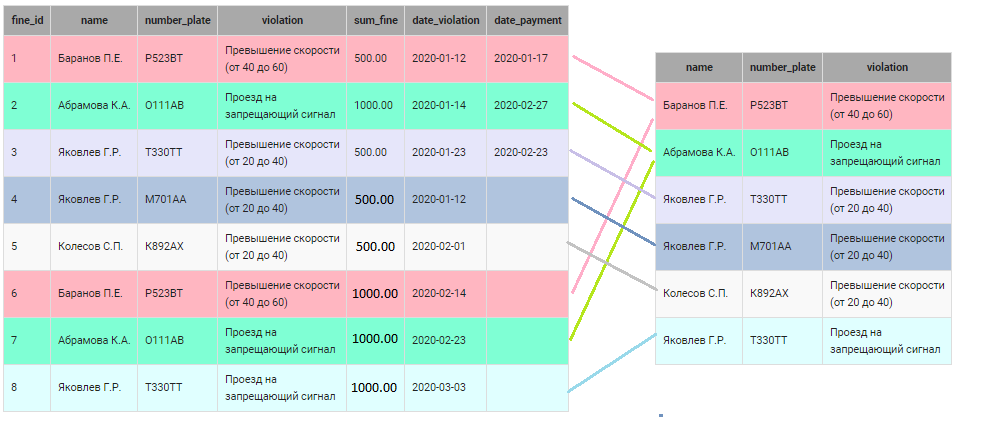

<p>2. Затем вычисляется функция <code><strong>count(*)</strong></code>, которая определяет количество записей в каждой группе. Получается, что к первым двум группам относятся по две записи, ко всем остальным - по одной.</p>

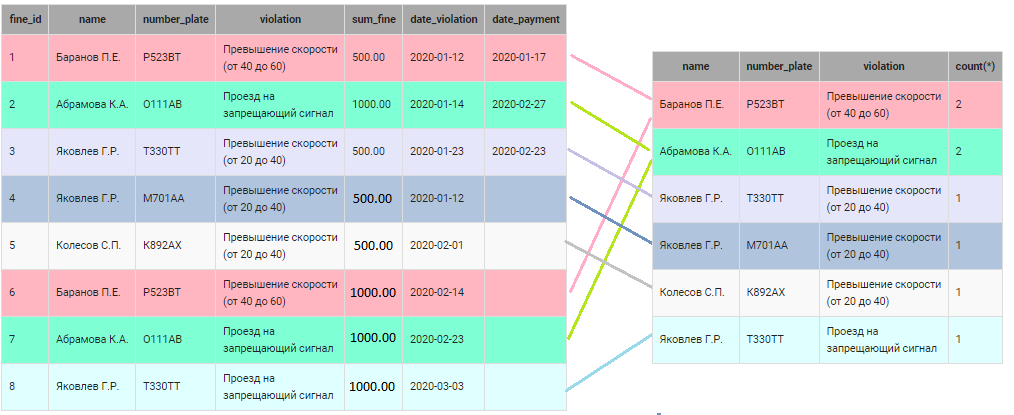

<p><strong>Важно! </strong>В разделе <code><strong>GROUP BY</strong></code> нужно перечислять все НЕАГРЕГИРОВАННЫЕ&nbsp;столбцы (к которым не применяются групповые функции) из <code><strong>SELECT</strong></code>.</p>

<h2>Задание</h2>

<p>Вывести фамилию, номер машины и нарушение только для тех водителей, которые&nbsp;на одной машине нарушили одно и то же правило&nbsp;&nbsp; два и более раз. При этом учитывать все нарушения, независимо от того оплачены они или нет. Информацию отсортировать в алфавитном порядке, сначала по фамилии водителя, потом по номеру машины и, наконец, по нарушению.</p>

In [44]:
read_sql_query("""
SELECT name, number_plate, violation
FROM fine
GROUP by name, number_plate, violation
HAVING COUNT(number_plate) >= 2
ORDER BY 1, 2, 3;
""")

,name,number_plate,violation
0,Абрамова К.А.,О111AB,Проезд на запрещающий сигнал
1,Баранов П.Е.,P523BT,Превышение скорости(от 40 до 60)


<h2>Задание</h2>

<p>В таблице <code><strong>fine</strong></code> увеличить в два раза сумму неоплаченных штрафов для отобранных на предыдущем шаге записей.&nbsp;</p>

In [7]:
read_sql_query("""
UPDATE fine AS f
SET sum_fine = f.sum_fine*2

FROM (
SELECT name, number_plate, violation
FROM fine
GROUP BY name, number_plate, violation
HAVING count(*) >= 2) AS dv

WHERE (f.date_payment IS NULL)
AND (f.name = dv.name)
AND (f.violation = dv.violation);

SELECT * FROM fine;
""")

,fine_id,name,number_plate,violation,sum_fine,date_violation,date_payment
0,9,Баранов П.Е.,Р523ВТ,Превышение скорости(от 40 до 60),500.000000,2020-01-12,2020-01-17
1,10,Абрамова К.А.,О111АВ,Проезд на запрещающий сигнал,1000.000000,2020-01-14,2020-02-27
2,11,Яковлев Г.Р.,Т330ТТ,Превышение скорости(от 20 до 40),500.000000,2020-01-23,2020-02-23
3,12,Яковлев Г.Р.,М701АА,Превышение скорости(от 20 до 40),500.000000,2020-01-12,None
4,13,Колесов С.П.,К892АХ,Превышение скорости(от 20 до 40),500.000000,2020-02-01,None
5,16,Яковлев Г.Р.,Т330ТТ,Проезд на запрещающий сигнал,1000.000000,2020-03-03,None
6,14,Баранов П.Е.,Р523ВТ,Превышение скорости(от 40 до 60),2000.000000,2020-02-14,None
7,15,Абрамова К.А.,О111АВ,Проезд на запрещающий сигнал,2000.000000,2020-02-23,None


<h2>Задание</h2>

<p>Создать новую таблицу&nbsp;<strong><code>back_payment</code></strong>, куда внести информацию о неоплаченных штрафах (Фамилию и инициалы водителя, номер машины, нарушение, сумму штрафа &nbsp;и&nbsp; дату нарушения) из таблицы <code><strong>fine</strong></code>.</p>

In [3]:
read_sql_query("""
CREATE TABLE back_payment AS (
    SELECT name, number_plate, violation, sum_fine, date_violation FROM fine
    WHERE date_payment IS NULL);
    
SELECT * FROM back_payment
""")

,name,number_plate,violation,sum_fine,date_violation
0,Яковлев Г.Р.,М701АА,Превышение скорости(от 20 до 40),500.000000,2020-01-12
1,Колесов С.П.,К892АХ,Превышение скорости(от 20 до 40),500.000000,2020-02-01
2,Баранов П.Е.,Р523ВТ,Превышение скорости(от 40 до 60),1000.000000,2020-02-14
3,Абрамова К.А.,О111АВ,Проезд на запрещающий сигнал,1000.000000,2020-02-23
4,Яковлев Г.Р.,Т330ТТ,Проезд на запрещающий сигнал,1000.000000,2020-03-03


<h2>Связь&nbsp;«один ко многим»</h2>

<p>Рассмотрим таблицу<strong><code> book</code></strong>(в ней столбец <code><strong>author</strong></code> переименован в <code><strong>name_author</strong></code>):</p>


<table border="1" cellpadding="0" cellspacing="0">
	<tbody>
		<tr style="background: rgb(169, 169, 169); text-align: center; --darkreader-inline-bgimage: initial; --darkreader-inline-bgcolor: #686c6a;" data-darkreader-inline-bgimage="" data-darkreader-inline-bgcolor="">
			<td><strong>book_id</strong></td>
			<td><strong>title</strong></td>
			<td><strong>name_author</strong></td>
			<td><strong>price</strong></td>
			<td><strong>amount</strong></td>
		</tr>
		<tr>
			<td>1</td>
			<td>Мастер и Маргарита</td>
			<td>Булгаков М.А.</td>
			<td>670.99</td>
			<td>3</td>
		</tr>
		<tr>
			<td>2</td>
			<td>Белая гвардия</td>
			<td>Булгаков М.А.</td>
			<td>540.50</td>
			<td>5</td>
		</tr>
		<tr>
			<td>3</td>
			<td>Идиот</td>
			<td>Достоевский Ф.М.</td>
			<td>460.00</td>
			<td>10</td>
		</tr>
		<tr>
			<td>4</td>
			<td>Братья Карамазовы</td>
			<td>Достоевский Ф.М.</td>
			<td>799.01</td>
			<td>2</td>
		</tr>
		<tr>
			<td>5</td>
			<td>Стихотворения и поэмы</td>
			<td>Есенин С.А.</td>
			<td>650.00</td>
			<td>15</td>
		</tr>
	</tbody>
</table>

<p>В этой таблице фамилии авторов повторяются для нескольких книг. А что, если придется вместо инициалов для каждого автора хранить его полное имя и отчество? Тогда, если в таблице содержится информация о 50 книгах Достоевского, придется 50 раз исправлять «Ф.М.» на «Федор Михайлович». При этом, если в некоторых записях использовать «Фёдор Михайлович» (c буквой ё), то мы вообще получим двух разных авторов...&nbsp;</p>

<p>Чтобы устранить эту проблему в реляционных базах данных создается новая таблица <code><strong>author</strong></code>,&nbsp; в которой перечисляются все различные авторы, а затем эта таблица связывается с таблицей <code><strong>book</strong></code>. При этом такая связь называется «<strong>один ко многим</strong>», таблица <code><strong>author</strong></code> называется главной, таблица<code><strong> book </strong></code>– связанной или подчиненной.&nbsp;</p>

<p>Связь&nbsp;«<strong>один ко многим</strong>» имеет место, когда одной записи&nbsp;главной таблицы соответствует несколько записей связанной таблицы, а каждой записи связанной таблицы&nbsp;соответствует только одна запись главной таблицы. Обозначается это так:</p>

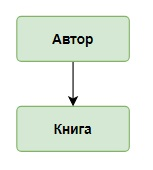

<p><strong>Этапы реализации связи </strong>«<strong>один ко многим</strong>» на следующем примере:</p>

<p>Один автор может написать несколько книг, а одна книга написана только одним автором. Для каждой книги известны ее количество и цена.</p>

<p>1. Создать таблицу <code><strong>author</strong></code>,&nbsp; в которую включить уникальных авторов книг, хранящихся на складе:</p>

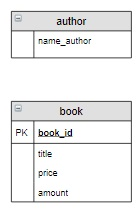

<p>2. Обе таблицы должны содержать первичный ключ, в таблице&nbsp; <code><strong>book</strong></code>он уже есть,&nbsp; в таблицу <code><strong>author</strong></code>добавим ключ&nbsp;<code><strong>author_id</strong></code>:</p>

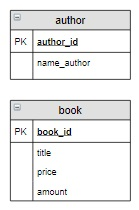

<p>3. Включить в таблицу <code><strong>book</strong></code> связанный столбец (внешний ключ,&nbsp;<code><strong>FOREIGN KEY</strong></code>), соответствующий по имени и типу ключевому столбцу главной таблицы (в нашем случае это столбец<code><strong> author_id</strong></code>). Для наглядности связь на схеме обозначается стрелкой от ключевого столбца главной таблицы к внешнему ключу связной таблицы:</p>

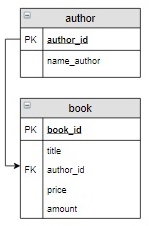

<span><h2>Связь «многие ко многим»</h2>

<p>На предыдущем шаге мы реализовали связь «<strong>один ко многим</strong>» для книг и авторов. Она означает, что каждый автор написал несколько книг, но каждую книгу написал только один автор. На самом деле, это не совсем верное утверждение. Например, книга «12 стульев» написана двумя авторами Ильфом И.А. и Петровым Е.П. С другой стороны, эти авторы написали и другие книги, например «Золотой теленок».</p>

<p>Для соединения таких таблиц используется связь «<strong>многие ко многим</strong>».</p>

<p>Связь «<strong>многие ко многим</strong>» имеет место когда каждой записи одной таблицы соответствует несколько записей во второй, и наоборот, каждой записи второй таблицы соответствует несколько записей в первой. Обозначается это так:</p>

<p><img alt="" src="https://ucarecdn.com/e53a7a38-0b4e-4705-b07e-209dd8074e49/"></p>

<p><strong>Этапы реализации связи </strong>«<strong>многие ко многим</strong>»&nbsp; на следующем примере:</p>

<p>Один автор может написать несколько книг, а одна книга может быть написана несколькими авторами. Для каждой книги известны ее количество и цена.</p>

<p>1. Создать таблицу <code><strong>author</strong></code>,&nbsp; в которую включить уникальных авторов книг, хранящихся на складе:</p>

<p><img alt="" src="https://ucarecdn.com/3762c894-7798-4ff7-a254-4068635de34e/"></p>

<p>2. В обеих таблицах необходимо определить первичный ключ, в нашем случае в таблице<strong> <code>book</code></strong> он уже есть, поэтому достаточно включить первичный ключ <strong><code>author_id</code>&nbsp;</strong>в таблицу&nbsp;<code><strong>author</strong></code>:</p>

<p><img alt="" src="https://ucarecdn.com/961abd2a-0a7c-42c4-ab52-b4e9cb2d9ceb/"></p>

<p>3. Создать новую таблицу-связку, состоящую из двух столбцов, соответствующих по имени и типу ключевым столбцам исходных таблиц. Каждый из этих столбцов является внешним ключом&nbsp;(<code><strong>FOREIGN KEY</strong></code>)&nbsp; и связан с&nbsp;ключевым столбцом каждой таблицы.&nbsp;Для наглядности связи на схеме обозначаются стрелкой от ключевого столбца исходной таблицы к внешнему ключу связной таблицы.</p>

<p><img alt="" src="https://ucarecdn.com/6943bc53-bbe5-410b-9264-00b20eb0f017/"></p>

<p>4. Дальше необходимо определиться с первичным ключом таблицы-связки. Можно сделать два ключевых столбца, тогда все записи в этой таблице должны быть уникальными, то есть не повторяться. Для связи автор-книга этот вариант подходит. Но в некоторых случаях записи в таблице-связке могут повторяться, например, если мы будем продавать книги покупателям (один человек может купить несколько книг, а одну и ту же книгу могут купить несколько человек). Тогда в таблицу-связку включают дополнительные столбцы для идентификации записей, например, дату продажи,&nbsp; также в таблицу-связку добавляют первичный ключ. Мы воспользуемся вторым способом:</p>

<p><img alt="" src="https://ucarecdn.com/9e4529dc-355a-4675-a782-a824fd11d4ce/"></p>


<span><h2><strong>Задание</strong></h2>

<p>Создать таблицу<code><strong> author </strong></code>следующей структуры:</p>

<table border="1" cellpadding="1" cellspacing="1">
	<tbody>
		<tr style="background: rgb(230, 248, 224); text-align: center; --darkreader-inline-bgimage: initial; --darkreader-inline-bgcolor: #2d4a11;" data-darkreader-inline-bgimage="" data-darkreader-inline-bgcolor="">
			<td><strong>Поле</strong></td>
			<td><strong>Тип, описание</strong></td>
		</tr>
		<tr>
			<td>author_id</td>
			<td><code>INT PRIMARY KEY AUTO_INCREMENT</code></td>
		</tr>
		<tr>
			<td>name_author</td>
			<td><code>VARCHAR(50)</code></td>
		</tr>
	</tbody>
</table></span>

In [6]:
read_sql_query("""
CREATE TABLE author (
author_id SERIAL PRIMARY KEY,
name_author VARCHAR(50)
);

SELECT * FROM author
""")

,author_id,name_author


<span><h2>Задание</h2>

<p>Заполнить таблицу <code><strong>author</strong></code>. В нее включить следующих авторов:</p>

<ul>
	<li>Булгаков М.А.</li>
	<li>Достоевский Ф.М.</li>
	<li>Есенин С.А.</li>
	<li>Пастернак Б.Л.</li>
</ul>

<details open=""><summary><strong>Результат</strong></summary>

<pre><code class="language-sql hljs">Affected rows: 1
Affected rows: 1
Affected rows: 1
Affected rows: 1

Query result:
+<span class="hljs-comment">-----------+------------------+</span>
| author_id | name_author      |
+<span class="hljs-comment">-----------+------------------+</span>
| 1         | Булгаков М.А.    |
| 2         | Достоевский Ф.М. |
| 3         | Есенин С.А.      |
| 4         | Пастернак Б.Л.   |
+<span class="hljs-comment">-----------+------------------+</span></code></pre>
</details></span>

In [7]:
read_sql_query("""
INSERT INTO author (name_author)
VALUES 
    ('Булгаков М.А.'),
    ('Достоевский Ф.М.'),
    ('Есенин С.А.'),
    ('Пастернак Б.Л.');
    
SELECT * FROM author
""")

,author_id,name_author
0,1,Булгаков М.А.
1,2,Достоевский Ф.М.
2,3,Есенин С.А.
3,4,Пастернак Б.Л.


<span><h2>Создание таблицы с внешними ключами</h2>

<p>При создании зависимой таблицы (таблицы, которая содержит внешние ключи) необходимо учитывать, что :</p>

<ul>
	<li>каждый внешний ключ должен иметь такой же тип данных, как связанное поле главной таблицы (в наших примерах это&nbsp;<code><strong>INT)</strong></code>;</li>
	<li>необходимо указать главную для нее таблицу и столбец, по которому осуществляется связь:</li>
</ul>

<pre><code class="language-sql hljs">FOREIGN KEY (связанное_поле_зависимой_таблицы) &nbsp;
REFERENCES главная_таблица&nbsp;(связанное_поле_главной_таблицы)</code></pre>

<p>По умолчанию любой столбец, кроме ключевого,&nbsp;может содержать значение <code><strong>NULL</strong></code>. При создании таблицы это можно переопределить,&nbsp; используя&nbsp; ограничение<code><strong>&nbsp;NOT NULL</strong></code> для этого столбца:</p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">CREATE</span> <span class="hljs-keyword">TABLE</span> таблица (
&nbsp; &nbsp; столбец_1 <span class="hljs-built_in">INT</span> <span class="hljs-keyword">NOT</span> <span class="hljs-literal">NULL</span>,&nbsp;
&nbsp; &nbsp; столбец_2 <span class="hljs-built_in">VARCHAR</span>(<span class="hljs-number">10</span>) 
);</code></pre>

<p>&nbsp;В созданной таблице в <code><strong>столбец_1</strong></code> не может содержать пустое значение, а<code><strong> столбец_2</strong></code> - может.</p>

<p>Для внешних ключей рекомендуется устанавливать ограничение&nbsp;<code><strong>NOT NULL</strong></code> (если это совместимо с другими опциями, которые будут рассмотрены&nbsp;в следующем шаге).</p>

<p><strong>&nbsp;Пример</strong></p>

<p>Создать таблицу <strong><code>book</code></strong> следующей структуры:</p>

<table border="1" cellpadding="1" cellspacing="1">
	<tbody>
		<tr style="background: rgb(230, 248, 224); text-align: center; --darkreader-inline-bgimage: initial; --darkreader-inline-bgcolor: #2d4a11;" data-darkreader-inline-bgimage="" data-darkreader-inline-bgcolor="">
			<td style="text-align: center;"><strong>Поле</strong></td>
			<td style="text-align: center;"><strong>Тип, описание</strong></td>
			<td style="text-align: center;"><strong>Связи</strong></td>
		</tr>
		<tr>
			<td><code>book_id</code></td>
			<td><code>INT PRIMARY KEY AUTO_INCREMENT</code></td>
			<td>&nbsp;</td>
		</tr>
		<tr>
			<td><code>title</code></td>
			<td><code>VARCHAR(50)</code></td>
			<td>&nbsp;</td>
		</tr>
		<tr>
			<td><code>author_id</code></td>
			<td><code>INT&nbsp;</code></td>
			<td>внешний ключ:<br>
			главная таблица <code><strong>author</strong></code>,<br>
			связанный столбец <code><strong>author.author_id</strong></code>,<br>
			пустое значение не допускается</td>
		</tr>
		<tr>
			<td><code>price</code></td>
			<td><code>DECIMAL(8, 2)</code></td>
			<td>&nbsp;</td>
		</tr>
		<tr>
			<td><code>amount</code></td>
			<td><code>INT</code></td>
			<td>&nbsp;</td>
		</tr>
	</tbody>
</table>

<p><em>Запрос:</em></p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">CREATE</span> <span class="hljs-keyword">TABLE</span> book (
    book_id <span class="hljs-built_in">INT</span> PRIMARY <span class="hljs-keyword">KEY</span> AUTO_INCREMENT, 
    title <span class="hljs-built_in">VARCHAR</span>(<span class="hljs-number">50</span>), 
    author_id <span class="hljs-built_in">INT</span> <span class="hljs-keyword">NOT</span> <span class="hljs-literal">NULL</span>, 
    price <span class="hljs-built_in">DECIMAL</span>(<span class="hljs-number">8</span>,<span class="hljs-number">2</span>), 
    amount <span class="hljs-built_in">INT</span>, 
    FOREIGN <span class="hljs-keyword">KEY</span> (author_id)  <span class="hljs-keyword">REFERENCES</span> author (author_id) 
);</code></pre>
|
<h2>Задание</h2>

<p>Перепишите&nbsp;запрос на создание таблицы&nbsp;<code><strong>book</strong></code>&nbsp;, чтобы ее структура соответствовала структуре, показанной на логической схеме (таблица <code><strong>genre</strong></code> уже создана, порядок следования столбцов - как на логической схеме в таблице <code><strong>book</strong></code>, <code><strong>genre_id</strong></code>&nbsp; - внешний ключ)&nbsp;. Для <strong><code>genre_id</code></strong>&nbsp;ограничение о недопустимости пустых значений <strong>не задавать</strong>. В качестве главной таблицы для описания поля&nbsp; <strong><code>genre_id</code></strong>использовать таблицу <a href="https://stepik.org/lesson/297508/step/5?unit=279268" rel="noopener noreferrer nofollow"><code><strong>genre</strong></code></a> следующей структуры:</p>

<table border="1" cellpadding="1" cellspacing="1">
	<tbody>
		<tr style="background: rgb(230, 248, 224); text-align: center; --darkreader-inline-bgimage: initial; --darkreader-inline-bgcolor: #2d4a11;" data-darkreader-inline-bgimage="" data-darkreader-inline-bgcolor="">
			<td style="text-align: center;"><strong>Поле</strong></td>
			<td style="text-align: center;"><strong>Тип, описание</strong></td>
		</tr>
		<tr>
			<td><code>genre_id</code></td>
			<td><code>INT PRIMARY KEY AUTO_INCREMENT</code></td>
		</tr>
		<tr>
			<td><code>name_genre</code></td>
			<td><code>VARCHAR(30)</code></td>
		</tr>
	</tbody>
</table>

<p><strong>Логическая схема</strong> (нужно создать только таблицу <strong><code>book</code></strong>):</p>

<p><img alt="" src="https://ucarecdn.com/95045d96-412d-4e10-88f2-7ac6b13fada6/"></p>

<details><summary><strong>Результат</strong></summary>

<pre><code class="language-sql hljs">Affected rows: 0</code></pre>
</details></span>

In [13]:
read_sql_query("""
CREATE TABLE book (
    book_id SERIAL PRIMARY KEY, 
    title VARCHAR(50), 
    author_id INT NOT NULL,
    genre_id INT,
    price DECIMAL(8,2), 
    amount INT, 
    FOREIGN KEY (author_id)  REFERENCES author (author_id),
    FOREIGN KEY (genre_id) REFERENCES genre (genre_id)
);

SELECT * from book;
""")

,book_id,title,author_id,genre_id,price,amount


<span><h2>Действия при&nbsp;удалении записи главной таблицы</h2>

<p>С помощью выражения<strong>&nbsp;</strong><code>ON DELETE</code>&nbsp;можно установить действия, которые выполняются для записей подчиненной таблицы при удалении связанной строки из главной таблицы. При удалении можно установить следующие опции:</p>

<ul>
	<li><code>CASCADE</code>: автоматически удаляет строки из зависимой таблицы при удалении&nbsp; связанных строк в главной таблице.</li>
	<li><code>SET NULL</code>: при удалении&nbsp; связанной строки из главной таблицы устанавливает для столбца внешнего ключа значение&nbsp;<strong><code>NULL</code></strong>. (В этом случае столбец внешнего ключа должен поддерживать установку<code><strong> NULL</strong></code>).</li>
	<li><code>SET&nbsp;DEFAULT</code>&nbsp;похоже на <code>SET&nbsp;NULL</code> за тем исключением, что значение&nbsp; внешнего ключа устанавливается не в <code>NULL,</code>&nbsp;а в значение по умолчанию для данного столбца.</li>
	<li><code>RESTRICT</code>: отклоняет удаление строк в главной таблице при наличии связанных строк в зависимой таблице.</li>
</ul>

<p><strong>Важно! </strong>Если для столбца установлена опция <code>SET NULL</code>, то при его описании нельзя задать ограничение на пустое значение.</p>

<p><strong>Пример</strong></p>

<p>Будем считать, что при удалении автора из таблицы <code><strong>author</strong></code>, необходимо удалить все записи о книгах из таблицы <code><strong>book</strong></code>, написанные этим автором. Данное действие необходимо прописать при создании таблицы.</p>

<p><em>Запрос:</em></p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">CREATE</span> <span class="hljs-keyword">TABLE</span> book (
    book_id <span class="hljs-built_in">INT</span> PRIMARY <span class="hljs-keyword">KEY</span> AUTO_INCREMENT, 
    title <span class="hljs-built_in">VARCHAR</span>(<span class="hljs-number">50</span>), 
    author_id <span class="hljs-built_in">INT</span> <span class="hljs-keyword">NOT</span> <span class="hljs-literal">NULL</span>, 
    price <span class="hljs-built_in">DECIMAL</span>(<span class="hljs-number">8</span>,<span class="hljs-number">2</span>), 
    amount <span class="hljs-built_in">INT</span>, 
    FOREIGN <span class="hljs-keyword">KEY</span> (author_id)  <span class="hljs-keyword">REFERENCES</span> author (author_id) <span class="hljs-keyword">ON</span> <span class="hljs-keyword">DELETE</span> <span class="hljs-keyword">CASCADE</span>
);</code></pre>

<h2>Задание</h2>

<p>Создать таблицу <code><strong>book</strong></code> той же структуры, что и на предыдущем шаге.&nbsp;Будем считать, что при удалении автора из таблицы <code><strong>author</strong></code>, должны удаляться все записи о книгах из таблицы <code><strong>book</strong></code>, написанные этим автором. А при удалении жанра из таблицы <code><strong>genre</strong></code> для соответствующей записи <code><strong>book</strong></code> установить значение <code><strong>Null </strong></code>в столбце <code><strong>genre_id</strong></code>.&nbsp;</p>

<details><summary><strong>Результат</strong></summary>

<pre><code class="language-sql hljs">Affected rows: 0</code></pre>
</details></span>

In [8]:
read_sql_query("""
CREATE TABLE book (
    book_id SERIAL PRIMARY KEY,
    title VARCHAR(50),
    genre_id INT,
    author_id INT NOT NULL, 
    price DECIMAL(8,2), 
    amount INT, 
    FOREIGN KEY (author_id) REFERENCES author (author_id) ON DELETE CASCADE,
    FOREIGN KEY (genre_id) REFERENCES genre (genre_id) ON DELETE SET NULL
);

SELECT * FROM book
""")

,book_id,title,genre_id,author_id,price,amount


<span><h2>Заполнение таблицы с внешними ключами</h2>

<p>На предыдущих шагах были созданы и заполнены таблицы<code><strong> author</strong></code>:</p>

<table border="1" cellpadding="1" cellspacing="1">
	<tbody>
		<tr style="background: rgb(169, 169, 169); text-align: center; --darkreader-inline-bgimage: initial; --darkreader-inline-bgcolor: #686c6a;" data-darkreader-inline-bgimage="" data-darkreader-inline-bgcolor="">
			<td style="text-align: center;"><strong>author_id</strong></td>
			<td style="text-align: center;"><strong>name_author</strong></td>
		</tr>
		<tr>
			<td>1</td>
			<td>Булгаков М.А.</td>
		</tr>
		<tr>
			<td>2</td>
			<td>Достоевский Ф.М.</td>
		</tr>
		<tr>
			<td>3</td>
			<td>Есенин С.А.</td>
		</tr>
		<tr>
			<td>4</td>
			<td>Пастернак Б.Л.</td>
		</tr>
	</tbody>
</table>

<p>и&nbsp;&nbsp;<code><strong>genre</strong></code>:</p>

<table border="1" cellpadding="1" cellspacing="1">
	<tbody>
		<tr style="background: rgb(169, 169, 169); text-align: center; --darkreader-inline-bgimage: initial; --darkreader-inline-bgcolor: #686c6a;" data-darkreader-inline-bgimage="" data-darkreader-inline-bgcolor="">
			<td style="text-align: center;"><strong>genre_id</strong></td>
			<td style="text-align: center;"><strong>name_genre</strong></td>
		</tr>
		<tr>
			<td>1</td>
			<td>Роман</td>
		</tr>
		<tr>
			<td>2</td>
			<td>Поэзия</td>
		</tr>
	</tbody>
</table>

<p>Эти таблицы являются главными для таблицы <code><strong>book </strong></code>и связаны с ней через внешние ключи:</p>

<p style="text-align: center;"><img alt="" src="https://ucarecdn.com/26d5d90a-3e95-46bc-807d-10fb53d10f25/"></p>

<p>&nbsp;При заполнении таблицы<code><strong> book</strong></code> в связанные столбцы необходимо заносить значения ключей главной таблицы. Например, Книгу «Игрок» написал Достоевский, поэтому значение поля <code><strong>author_id</strong></code> для этой записи должно быть&nbsp; 2, так как значение ключа для этого автора в таблице <code><strong>author</strong></code> равно 2. Значение поля&nbsp;<code><strong>genre_id</strong></code> для книги «Игрок» – 1, так как эта книга относится к жанру «Роман».</p>

<h2>Задание</h2>

<p>Для каждой строки таблицы <code><strong>book</strong></code> занесите значения в поля <code><strong>author_id </strong></code>и <code><strong>genre_id</strong></code>. Считать, что книга Есенина относится к жанру «Поэзия», остальные книги – к жанру «Роман».</p>

<p>Через запятую перечислены&nbsp;значения полей&nbsp;<code><strong>book_id</strong></code>,&nbsp; <code><strong>title</strong></code>, <code><strong>author_id</strong></code>, <code><strong>genre_id</strong></code>,&nbsp;&nbsp;<code><strong>price</strong></code>, <code><strong>amount</strong></code> каждой записи таблицы <code><strong>book</strong></code>. Заполните пропуски.</p>

<p>Авторы и их произведения:</p>

<table border="1" cellpadding="0" cellspacing="0">
	<tbody>
		<tr style="background: rgb(220, 220, 220); text-align: center; --darkreader-inline-bgimage: initial; --darkreader-inline-bgcolor: #393b3b;" data-darkreader-inline-bgimage="" data-darkreader-inline-bgcolor="">
			<td>
			<strong>Название книги</strong>
			</td>
			<td>
			<strong>Автор</strong>
			</td>
			<td>
			<strong>Цена</strong>
			</td>
			<td>
			<strong>Количество</strong>
			</td>
		</tr>
		<tr>
			<td>Мастер и Маргарита</td>
			<td>Булгаков М.А.</td>
			<td>670.99</td>
			<td>3</td>
		</tr>
		<tr>
			<td>Белая гвардия</td>
			<td>Булгаков М.А.</td>
			<td>540.50</td>
			<td>5</td>
		</tr>
		<tr>
			<td>Идиот</td>
			<td>Достоевский Ф.М.</td>
			<td>460.00</td>
			<td>10</td>
		</tr>
		<tr>
			<td>Братья Карамазовы</td>
			<td>Достоевский Ф.М.</td>
			<td>799.01</td>
			<td>3</td>
		</tr>
		<tr>
			<td>Игрок</td>
			<td>Достоевский Ф.М.</td>
			<td>480.50</td>
			<td>10</td>
		</tr>
		<tr>
			<td>Стихотворения и поэмы</td>
			<td>Есенин С.А.</td>
			<td>650.00</td>
			<td>15</td>
		</tr>
	</tbody>
</table></span>

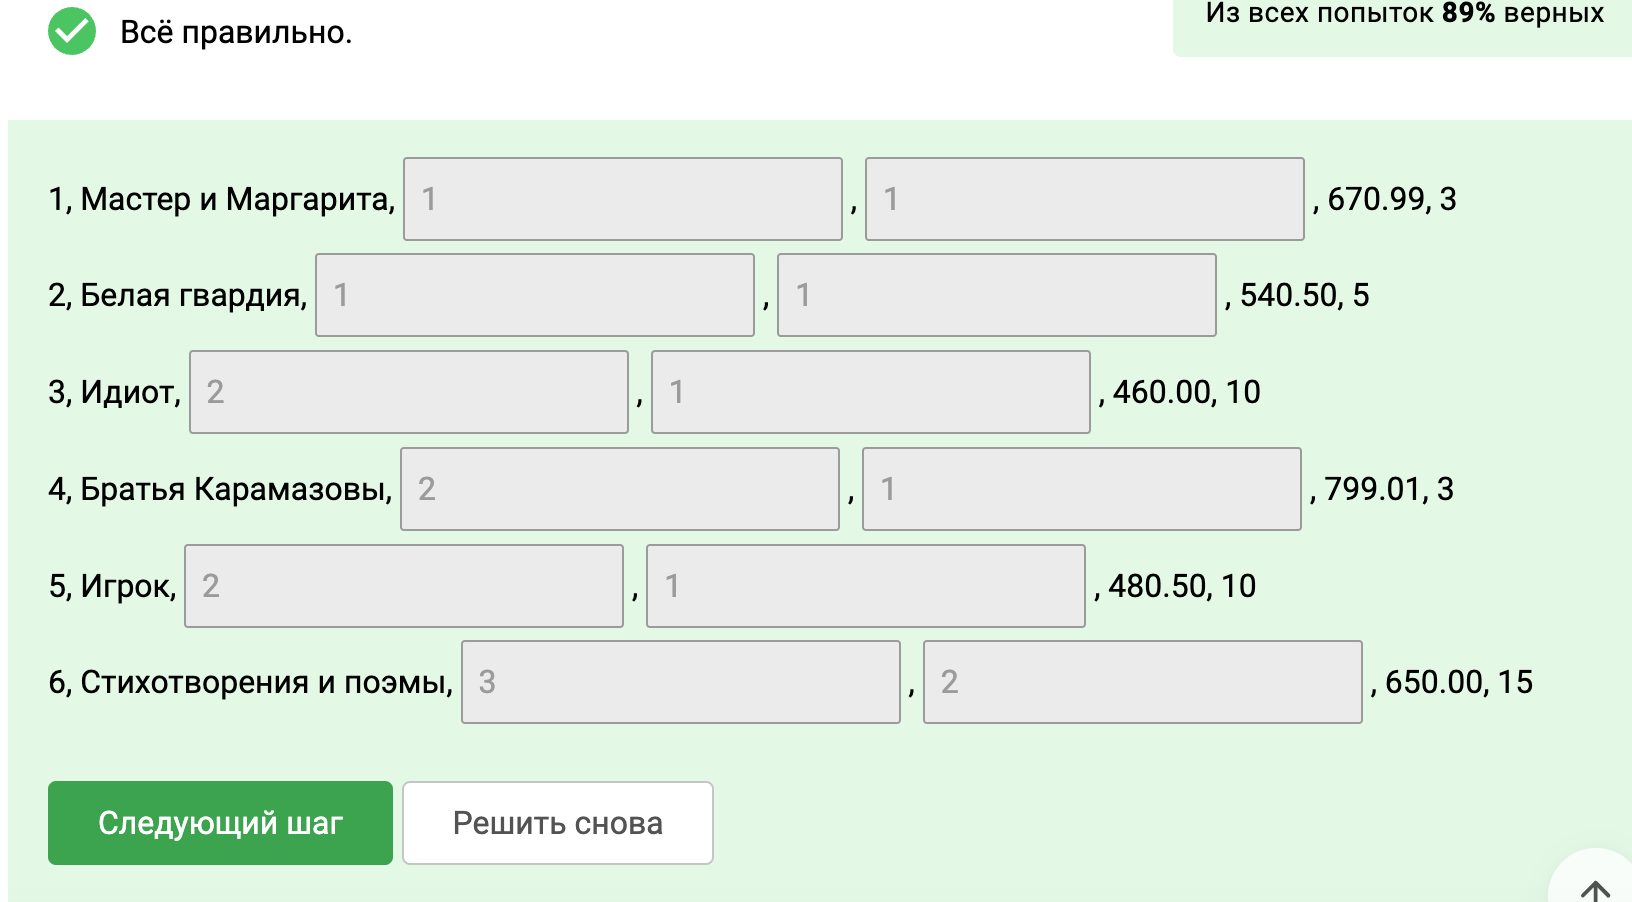

<span><h2>Задание</h2>

<p>Добавьте три последние записи (с ключевыми значениями 6, 7, 8) в таблицу<code><strong> book</strong></code>, первые 5 записей уже добавлены:</p>

<table border="1" cellpadding="0" cellspacing="0">
	<tbody>
		<tr style="background-color: #a9a9a9; background: #a9a9a9; text-align: center;">
			<td><strong>book_id</strong></td>
			<td><strong>title</strong></td>
			<td><strong>author_id</strong></td>
			<td><strong>genre_id</strong></td>
			<td><strong>price</strong></td>
			<td><strong>amount</strong></td>
		</tr>
		<tr>
			<td>1</td>
			<td>Мастер и Маргарита</td>
			<td>1</td>
			<td>1</td>
			<td>670.99</td>
			<td>3</td>
		</tr>
		<tr>
			<td>2</td>
			<td>Белая гвардия</td>
			<td>1</td>
			<td>1</td>
			<td>540.50</td>
			<td>5</td>
		</tr>
		<tr>
			<td>3</td>
			<td>Идиот</td>
			<td>2</td>
			<td>1</td>
			<td>460.00</td>
			<td>10</td>
		</tr>
		<tr>
			<td>4</td>
			<td>Братья Карамазовы</td>
			<td>2</td>
			<td>1</td>
			<td>799.01</td>
			<td>3</td>
		</tr>
		<tr>
			<td>5</td>
			<td>Игрок</td>
			<td>2</td>
			<td>1</td>
			<td>480.50</td>
			<td>10</td>
		</tr>
		<tr>
			<td>6</td>
			<td>Стихотворения и поэмы</td>
			<td>3</td>
			<td>2</td>
			<td>650.00</td>
			<td>15</td>
		</tr>
		<tr>
			<td>7</td>
			<td>Черный человек</td>
			<td>3</td>
			<td>2</td>
			<td>570.20</td>
			<td>6</td>
		</tr>
		<tr>
			<td>8</td>
			<td>Лирика</td>
			<td>4</td>
			<td>2</td>
			<td>518.99</td>
			<td>2</td>
		</tr>
	</tbody>
</table>

<p><strong>Логическая схема базы данных:</strong></p>

<p><img alt="" src="https://ucarecdn.com/26d5d90a-3e95-46bc-807d-10fb53d10f25/"></p>

In [21]:
read_sql_query("""
INSERT INTO book (title, author_id, genre_id, price, amount)
VALUES
    ('Мастер и Маргарита', 1, 1, 670.99, 3),
    ('Белая гвардия', 1, 1, 540.50, 5),
    ('Идиот', 2, 1, 460.00, 10),
    ('Братья Карамзовы', 2, 1, 799.01, 3),
    ('Игрок', 3, 2, 480.50, 10),
    ('Стихотворения и поэмы', 3, 2, 650.00, 15),
    ('Черный человек', 3, 2, 570.20, 6),
    ('Лирика', 4, 2, 518.99, 2);
    
SELECT * FROM book
""")

,book_id,title,genre_id,author_id,price,amount
0,1,Мастер и Маргарита,1,1,670.990000,3
1,2,Белая гвардия,1,1,540.500000,5
2,3,Идиот,1,2,460.000000,10
3,4,Братья Карамзовы,1,2,799.010000,3
4,5,Игрок,2,3,480.500000,10
5,6,Стихотворения и поэмы,2,3,650.000000,15
6,7,Черный человек,2,3,570.200000,6
7,8,Лирика,2,4,518.990000,2


<span><h2>Содержание урока</h2>

<p>В запросах SQL могут участвовать несколько таблиц базы данных. При этом необходимо указать как эти таблицы соединены между собой.&nbsp;</p>

<p>Операция соединения <code><strong>JOIN</strong></code> предназначена для обеспечения выборки данных из двух таблиц и включения этих данных в один результирующий набор. При необходимости соединения не двух, а нескольких таблиц, операция соединения применяется несколько раз (последовательно).</p>

<p>Операторы&nbsp;соединения входят&nbsp;в раздел <strong><code>FROM</code></strong> SQL запросов.</p>

<p>В данном уроке будут созданы запросы:</p>

<ul>
	<li><a href="https://stepik.org/lesson/308886/step/2?unit=291012" rel="noopener noreferrer nofollow">для двух&nbsp;таблиц, внутреннее соединение INNER JOIN</a>;</li>
	<li><a href="https://stepik.org/lesson/308886/step/3?unit=291012" rel="noopener noreferrer nofollow">для двух таблиц, внешние соединения LEFT JOIN и RIGHT JOIN</a>;</li>
	<li><a href="https://stepik.org/lesson/308886/step/4?unit=291012" rel="noopener noreferrer nofollow">для двух таблиц, перекрестное соединение CROSS JOIN</a>;</li>
	<li><a href="https://stepik.org/lesson/308886/step/5?unit=291012" rel="noopener noreferrer nofollow">выборки данных&nbsp;из нескольких таблиц</a>;</li>
	<li><a href="https://stepik.org/lesson/308886/step/6?unit=291012" rel="noopener noreferrer nofollow">выборки данных из нескольких таблиц с группировкой</a>;</li>
	<li><a href="https://stepik.org/lesson/308886/step/7?unit=291012" rel="noopener noreferrer nofollow">выборки&nbsp;данных с применением вложенных запросов</a>;</li>
	<li><a href="https://stepik.org/lesson/308886/step/8?unit=291012" rel="noopener noreferrer nofollow">вложенные запросы в операторах соединения</a>,</li>
	<li><a href="https://stepik.org/lesson/308886/step/9?unit=291012" rel="noopener noreferrer nofollow">операторы соединения, использование USING</a>.</li>
</ul>

<h2>Структура и наполнение таблиц</h2>

<p><strong>Концептуальная схема базы данных:</strong></p>

<p><img alt="" src="https://ucarecdn.com/f95c8b49-0d5c-45e0-9e35-6261f7cbbbe8/" style="float: left;"></p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p><strong>Логическая схема базы данных:</strong></p>

<p><img alt="" src="https://ucarecdn.com/95045d96-412d-4e10-88f2-7ac6b13fada6/" style="float: left;"></p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>Таблица<code><strong> author</strong></code>(<a href="https://stepik.org/lesson/308885/step/6?unit=291011" rel="noopener noreferrer nofollow">создание</a>, <a href="https://stepik.org/lesson/308885/step/7?unit=291011" rel="noopener noreferrer nofollow">заполнение</a>):</p>

<table border="1" cellpadding="1" cellspacing="1">
	<tbody>
		<tr style="background-color: #a9a9a9; background: #a9a9a9; text-align: center;">
			<td><strong>author_id</strong></td>
			<td><strong>name_author</strong></td>
		</tr>
		<tr>
			<td>1</td>
			<td>Булгаков М.А.</td>
		</tr>
		<tr>
			<td>2</td>
			<td>Достоевский Ф.М.</td>
		</tr>
		<tr>
			<td>3</td>
			<td>Есенин С.А.</td>
		</tr>
		<tr>
			<td>4</td>
			<td>Пастернак Б.Л.</td>
		</tr>
		<tr>
			<td>5</td>
			<td>Лермонтов М.Ю.</td>
		</tr>
	</tbody>
</table>

<p>Таблица<code><strong> genre</strong></code>(<a href="https://stepik.org/lesson/297508/step/6?unit=279268" rel="noopener noreferrer nofollow">создание</a>, <a href="https://stepik.org/lesson/297508/step/7?unit=279268" rel="noopener noreferrer nofollow">заполнение</a>, рассмотрено в качестве примеров):</p>

<table border="1" cellpadding="1" cellspacing="1">
	<tbody>
		<tr style="background-color: #a9a9a9; background: #a9a9a9; text-align: center;">
			<td><strong>genre_id</strong></td>
			<td><strong>name_genre</strong></td>
		</tr>
		<tr>
			<td>1</td>
			<td>Роман</td>
		</tr>
		<tr>
			<td>2</td>
			<td>Поэзия</td>
		</tr>
		<tr>
			<td>3</td>
			<td>Приключения</td>
		</tr>
	</tbody>
</table>

<p>Таблица <code><strong>book</strong></code>&nbsp;(<a href="https://stepik.org/lesson/308885/step/9?unit=291011" rel="noopener noreferrer nofollow">создание</a>, <a href="https://stepik.org/lesson/308885/step/11?unit=291011" rel="noopener noreferrer nofollow">заполнение</a>):</p>

<table border="1" cellpadding="0" cellspacing="0">
	<tbody>
		<tr style="background-color: #a9a9a9; background: #a9a9a9; text-align: center;">
			<td><strong>book_id</strong></td>
			<td><strong>title</strong></td>
			<td><strong>author_id</strong></td>
			<td><strong>genre_id</strong></td>
			<td><strong>price</strong></td>
			<td><strong>amount</strong></td>
		</tr>
		<tr>
			<td>1</td>
			<td>Мастер и Маргарита</td>
			<td>1</td>
			<td>1</td>
			<td>670.99</td>
			<td>3</td>
		</tr>
		<tr>
			<td>2</td>
			<td>Белая гвардия</td>
			<td>1</td>
			<td>1</td>
			<td>540.50</td>
			<td>5</td>
		</tr>
		<tr>
			<td>3</td>
			<td>Идиот</td>
			<td>2</td>
			<td>1</td>
			<td>460.00</td>
			<td>10</td>
		</tr>
		<tr>
			<td>4</td>
			<td>Братья Карамазовы</td>
			<td>2</td>
			<td>1</td>
			<td>799.01</td>
			<td>3</td>
		</tr>
		<tr>
			<td>5</td>
			<td>Игрок</td>
			<td>2</td>
			<td>1</td>
			<td>480.50</td>
			<td>10</td>
		</tr>
		<tr>
			<td>6</td>
			<td>Стихотворения и поэмы</td>
			<td>3</td>
			<td>2</td>
			<td>650.00</td>
			<td>15</td>
		</tr>
		<tr>
			<td>7</td>
			<td>Черный человек</td>
			<td>3</td>
			<td>2</td>
			<td>570.20</td>
			<td>6</td>
		</tr>
		<tr>
			<td>8</td>
			<td>Лирика</td>
			<td>4</td>
			<td>2</td>
			<td>518.99</td>
			<td>2</td>
		</tr>
	</tbody>
</table></span>

<span><h2>Соединение INNER JOIN</h2>

<p>Оператор внутреннего соединения <code>INNER JOIN</code> соединяет две таблицы. Порядок таблиц для оператора неважен, поскольку оператор является симметричным.</p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">SELECT</span>
 ...
<span class="hljs-keyword">FROM</span>
    таблица_1 <span class="hljs-keyword">INNER</span> <span class="hljs-keyword">JOIN</span>  таблица_2
    <span class="hljs-keyword">ON</span> условие
...</code></pre>

<p>Результат запроса формируется так:</p>

<ul>
	<li>каждая строка одной таблицы сопоставляется с каждой строкой второй таблицы;</li>
	<li>для полученной «соединённой» строки проверяется условие соединения;</li>
	<li>если условие истинно, в таблицу результата добавляется соответствующая «соединённая» строка;</li>
</ul>

<p><strong>Пример</strong></p>

<p>Вывести название книг и их авторов.</p>

<p><em>Запрос:</em></p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">SELECT</span> title, name_author
<span class="hljs-keyword">FROM</span> 
    author <span class="hljs-keyword">INNER</span> <span class="hljs-keyword">JOIN</span> book
    <span class="hljs-keyword">ON</span> author.author_id = book.author_id;</code></pre>

<p>Поскольку поля <code><strong>author_id</strong></code> в таблицах <code><strong>book</strong></code> и <strong><code>author</code></strong> называются одинаково, необходимо в запросах указывать полную ссылку на них (<code><strong>book.author_id</strong></code> и <code><strong>author.author_id</strong></code>).</p>

<p><em>Результат:</em></p>

<pre><code class="language-sql hljs">+<span class="hljs-comment">-----------------------+------------------+</span>
| title                 | name_author      |
+<span class="hljs-comment">-----------------------+------------------+</span>
| Мастер и Маргарита    | Булгаков М.А.    |
| Белая гвардия         | Булгаков М.А.    |
| Идиот                 | Достоевский Ф.М. |
| Братья Карамазовы     | Достоевский Ф.М. |
| Игрок                 | Достоевский Ф.М. |
| Стихотворения и поэмы | Есенин С.А.      |
| Черный человек        | Есенин С.А.      |
| Лирика                | Пастернак Б.Л.   |
+<span class="hljs-comment">-----------------------+------------------+</span></code></pre>

<p>В данном запросе осуществляется соединение главной&nbsp;таблицы <strong><code>author</code></strong> и зависимой таблицы&nbsp;<code><strong>book</strong></code> по ключевому столбцу<code><strong>&nbsp;author.author_id</strong></code> и внешнему ключу <code><strong>book.author_id</strong></code>. При этом в результирующую таблицу запроса включаются все строки, в которых значения этих столбцов совпадают. Другими словами строки зависимой таблицы <code><strong>book</strong></code> дополняются фамилией и инициалами авторов из таблицы <code><strong>author</strong></code>.</p>

<h2>Задание</h2>

<p>Вывести название, жанр&nbsp;и цену тех книг, количество которых больше 8, в отсортированном по убыванию цены виде.</p>

<p><strong>Логическая схема базы данных:</strong></p>

<p><img alt="" src="https://ucarecdn.com/95045d96-412d-4e10-88f2-7ac6b13fada6/"></p>

<p><em><strong>Текст задания </strong>(чтобы не прокручивать страницу):</em></p>

<blockquote>
<p>Вывести название, жанр&nbsp;и цену тех книг, количество которых больше 8, в отсортированном по убыванию цены виде.</p>
</blockquote>

<details><summary><strong>Результат</strong></summary>

<pre><code class="language-sql hljs">+<span class="hljs-comment">-----------------------+------------+--------+</span>
| title                 | name_genre | price  |
+<span class="hljs-comment">-----------------------+------------+--------+</span>
| Стихотворения и поэмы | Поэзия     | 650.00 |
| Игрок                 | Роман      | 480.50 |
| Идиот                 | Роман      | 460.00 |
+<span class="hljs-comment">-----------------------+------------+--------+</span></code></pre>
</details>

<details><summary><strong>Структура и наполнение таблиц</strong></summary>

<pre><code class="language-sql hljs">Таблица genre:
+<span class="hljs-comment">----------+-------------+</span>
| genre_id | name_genre  |
+<span class="hljs-comment">----------+-------------+</span>
| 1        | Роман       |
| 2        | Поэзия      |
| 3        | Приключения |
+<span class="hljs-comment">----------+-------------+</span>

Таблица author:
+<span class="hljs-comment">-----------+------------------+</span>
| author_id | name_author      |
+<span class="hljs-comment">-----------+------------------+</span>
| 1         | Булгаков М.А.    |
| 2         | Достоевский Ф.М. |
| 3         | Есенин С.А.      |
| 4         | Пастернак Б.Л.   |
| 5         | Лермонтов М.Ю.   |
+<span class="hljs-comment">-----------+------------------+</span>

Таблица book:
+<span class="hljs-comment">---------+-----------------------+-----------+----------+--------+--------+</span>
| book_id | title                 | author_id | genre_id | price  | amount |
+<span class="hljs-comment">---------+-----------------------+-----------+----------+--------+--------+</span>
| 1       | Мастер и Маргарита    | 1         | 1        | 670.99 | 3      |
| 2       | Белая гвардия         | 1         | 1        | 540.50 | 5      |
| 3       | Идиот                 | 2         | 1        | 460.00 | 10     |
| 4       | Братья Карамазовы     | 2         | 1        | 799.01 | 3      |
| 5       | Игрок                 | 2         | 1        | 480.50 | 10     |
| 6       | Стихотворения и поэмы | 3         | 2        | 650.00 | 15     |
| 7       | Черный человек        | 3         | 2        | 570.20 | 6      |
| 8       | Лирика                | 4         | 2        | 518.99 | 2      |
+<span class="hljs-comment">---------+-----------------------+-----------+----------+--------+--------+</span></code></pre>
</details></span>

In [33]:
read_sql_query("""
SELECT title, name_genre, price
FROM book INNER JOIN genre
ON (book.genre_id = genre.genre_id)
WHERE book.amount > 8
ORDER BY 3 DESC;
""")

,title,name_genre,price
0,Стихотворения и поэмы,Поэззия,650.000000
1,Игрок,Поэззия,480.500000
2,Идиот,Роман,460.000000


In [32]:
read_sql_query("""
SELECT title, name_genre, price
FROM book INNER JOIN genre
ON (book.genre_id = genre.genre_id) AND (book.amount > 8)
ORDER BY 3 DESC;
""")

,title,name_genre,price
0,Стихотворения и поэмы,Поэззия,650.000000
1,Игрок,Поэззия,480.500000
2,Идиот,Роман,460.000000


<span><h2>Внешнее соединение&nbsp;LEFT и RIGHT OUTER JOIN</h2>

<p>Оператор внешнего&nbsp;соединения <code>LEFT OUTER JOIN</code>&nbsp; (можно использовать <code>LEFT&nbsp;JOIN</code>) соединяет две таблицы. Порядок таблиц для оператора важен, поскольку оператор не является симметричным.</p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">SELECT</span>
 ...
<span class="hljs-keyword">FROM</span>
    таблица_1 <span class="hljs-keyword">LEFT</span> <span class="hljs-keyword">JOIN</span>  таблица_2
    <span class="hljs-keyword">ON</span> условие
...</code></pre>

<p>Результат запроса формируется так:</p>

<ol>
	<li>в результат включается внутреннее соединение (<code>INNER JOIN</code>) первой и второй&nbsp;таблицы в соответствии с условием;</li>
	<li>затем в результат добавляются те записи первой таблицы, которые не вошли во внутреннее соединение на шаге 1, для таких записей соответствующие поля второй&nbsp;таблицы заполняются значениями <code>NULL</code>.</li>
</ol>

<p>Соединение <code>RIGHT&nbsp;JOIN</code> действует аналогично, только в пункте 2 первая таблица меняется на вторую и наоборот.</p>

<p><strong>Пример</strong></p>

<p>Вывести название всех книг каждого автора, если книг некоторых авторов в данный момент нет на складе – вместо названия книги указать <code>Null</code>.</p>

<p><em>Запрос:</em></p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">SELECT</span> name_author, title 
<span class="hljs-keyword">FROM</span> author <span class="hljs-keyword">LEFT</span> <span class="hljs-keyword">JOIN</span> book
     <span class="hljs-keyword">ON</span> author.author_id = book.author_id
<span class="hljs-keyword">ORDER</span> <span class="hljs-keyword">BY</span> name_author;     </code></pre>

<p>Результат:</p>

<pre><code class="language-sql hljs">+<span class="hljs-comment">------------------+-----------------------+</span>
| name_author      | title                 |
+<span class="hljs-comment">------------------+-----------------------+</span>
| Булгаков М.А.    | Мастер и Маргарита    |
| Булгаков М.А.    | Белая гвардия         |
| Достоевский Ф.М. | Игрок                 |
| Достоевский Ф.М. | Идиот                 |
| Достоевский Ф.М. | Братья Карамазовы     |
| Есенин С.А.      | Стихотворения и поэмы |
| Есенин С.А.      | Черный человек        |
| Лермонтов М.Ю.   | NULL                  |
| Пастернак Б.Л.   | Лирика                |
+<span class="hljs-comment">------------------+-----------------------+</span></code></pre>

<p>Так как в таблице<code><strong> book</strong></code> нет книг Лермонтова, напротив этой фамилии стоит <code>Null</code>.</p>

<h2>Задание</h2>

<p>Вывести все жанры, которые не представлены в книгах на складе.</p>

<p><strong>Логическая схема базы данных:</strong></p>

<p><img alt="" src="https://ucarecdn.com/95045d96-412d-4e10-88f2-7ac6b13fada6/"></p>

<details><summary><strong>Пояснение</strong></summary>

<ol>
	<li>При использовании внешнего соединения названия книг и другие&nbsp;столбцы таблицы <code><strong>book </strong></code>для жанра тех книг, которого нет на складе, будут содержать значение&nbsp;<code>Null</code>.</li>
	<li>Для сравнения с пустым значением используется запись <code><strong>IS Null</strong></code> (написать <code><strong>= Null </strong></code>нельзя).</li>
</ol>
</details>

<p><em><strong>Текст задания (чтобы не прокручивать страницу):</strong></em></p>

<blockquote>
<p>Вывести все жанры, которые не представлены в книгах на складе.</p>
</blockquote>

<details><summary><strong>Результат</strong></summary>

<pre><code class="language-sql hljs">+<span class="hljs-comment">-------------+</span>
| name_genre  |
+<span class="hljs-comment">-------------+</span>
| Приключения |
+<span class="hljs-comment">-------------+</span></code></pre>
</details>

<details><summary><strong>Структура и наполнение таблиц</strong></summary>

<pre><code class="language-sql hljs">Таблица genre:
+<span class="hljs-comment">----------+-------------+</span>
| genre_id | name_genre  |
+<span class="hljs-comment">----------+-------------+</span>
| 1        | Роман       |
| 2        | Поэзия      |
| 3        | Приключения |
+<span class="hljs-comment">----------+-------------+</span>

Таблица author:
+<span class="hljs-comment">-----------+------------------+</span>
| author_id | name_author      |
+<span class="hljs-comment">-----------+------------------+</span>
| 1         | Булгаков М.А.    |
| 2         | Достоевский Ф.М. |
| 3         | Есенин С.А.      |
| 4         | Пастернак Б.Л.   |
| 5         | Лермонтов М.Ю.   |
+<span class="hljs-comment">-----------+------------------+</span>

Таблица book:
+<span class="hljs-comment">---------+-----------------------+-----------+----------+--------+--------+</span>
| book_id | title                 | author_id | genre_id | price  | amount |
+<span class="hljs-comment">---------+-----------------------+-----------+----------+--------+--------+</span>
| 1       | Мастер и Маргарита    | 1         | 1        | 670.99 | 3      |
| 2       | Белая гвардия         | 1         | 1        | 540.50 | 5      |
| 3       | Идиот                 | 2         | 1        | 460.00 | 10     |
| 4       | Братья Карамазовы     | 2         | 1        | 799.01 | 3      |
| 5       | Игрок                 | 2         | 1        | 480.50 | 10     |
| 6       | Стихотворения и поэмы | 3         | 2        | 650.00 | 15     |
| 7       | Черный человек        | 3         | 2        | 570.20 | 6      |
| 8       | Лирика                | 4         | 2        | 518.99 | 2      |
+<span class="hljs-comment">---------+-----------------------+-----------+----------+--------+--------+</span></code></pre>
</details></span>

In [2]:
read_sql_query("""
SELECT name_genre FROM (SELECT name_genre, title
FROM genre LEFT JOIN book
ON
(genre.genre_id = book.genre_id)) AS query_in WHERE query_in.title IS null;
""")

,name_genre
0,Приключения


<span><h2><strong>Перекрестное&nbsp;соединение CROSS JOIN</strong></h2>

<p>Оператор перекрёстного соединения, или декартова произведения <code>CROSS JOIN</code> (в запросе вместо ключевых слов&nbsp;можно поставить запятую между таблицами)&nbsp;соединяет две таблицы. Порядок таблиц для оператора неважен, поскольку оператор является симметричным. Его структура:</p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">SELECT</span>
 ...
<span class="hljs-keyword">FROM</span>
    таблица_1 <span class="hljs-keyword">CROSS</span> <span class="hljs-keyword">JOIN</span>  таблица_2
...</code></pre>

<p>или</p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">SELECT</span>
 ...
<span class="hljs-keyword">FROM</span>
    таблица_1, таблица_2
...</code></pre>

<p>Результат запроса формируется так: каждая строка одной таблицы соединяется с каждой строкой другой таблицы, формируя&nbsp; в результате все возможные сочетания строк двух таблиц.</p>

<p>Например, запрос:</p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">SELECT</span> name_author, name_genre
<span class="hljs-keyword">FROM</span> 
    author, genre;</code></pre>

<p>каждому автору из таблицы <code><strong>author</strong></code> поставит в соответствие все возможные жанры из таблицы <code><strong>genre</strong></code>:</p>

<pre><code class="language-sql hljs">+<span class="hljs-comment">------------------+-------------+</span>
| name_author      | name_genre  |
+<span class="hljs-comment">------------------+-------------+</span>
| Булгаков М.А.    | Роман       |
| Булгаков М.А.    | Поэзия      |
| Булгаков М.А.    | Приключения |
| Достоевский Ф.М. | Роман       |
| Достоевский Ф.М. | Поэзия      |
| Достоевский Ф.М. | Приключения |
| Есенин С.А.      | Роман       |
| Есенин С.А.      | Поэзия      |
| Есенин С.А.      | Приключения |
| Пастернак Б.Л.   | Роман       |
| Пастернак Б.Л.   | Поэзия      |
| Пастернак Б.Л.   | Приключения |
| Лермонтов М.Ю.   | Роман       |
| Лермонтов М.Ю.   | Поэзия      |
| Лермонтов М.Ю.   | Приключения |
+<span class="hljs-comment">------------------+-------------+</span></code></pre>

<h2><strong>Задание</strong></h2>

<p>Есть список городов, хранящийся в таблице <code><strong>city</strong></code>:</p>

<table border="1" cellpadding="1" cellspacing="1">
	<tbody>
		<tr style="background-color: #a9a9a9; background: #a9a9a9; text-align: center;">
			<td><strong>city_id</strong></td>
			<td><strong>name_city</strong></td>
		</tr>
		<tr>
			<td>1</td>
			<td>Москва</td>
		</tr>
		<tr>
			<td>2</td>
			<td>Санкт-Петербург</td>
		</tr>
		<tr>
			<td>3</td>
			<td>Владивосток</td>
		</tr>
	</tbody>
</table>

<p>Необходимо в каждом городе провести выставку книг каждого автора в течение&nbsp;2020 года. Дату проведения выставки выбрать случайным образом. Создать запрос, который выведет город, автора&nbsp;и дату проведения выставки. Последний столбец назвать <strong>Дата</strong>. Информацию вывести, отсортировав сначала&nbsp;в алфавитном порядке по названиям городов, а потом по убыванию дат&nbsp;проведения выставок.</p>

<p><strong>Структура таблицы:</strong></p>

<p><img alt="" src="https://ucarecdn.com/4d2b7a6d-ef2f-4597-a12f-87b3af48494e/"></p>

<details><summary><strong>Пояснение</strong></summary>

<p>1. Для генерации случайной даты можно к&nbsp;первому числу года ('2020-01-01') прибавить целое случайное число в интервале от 0 до 365.</p>

<p>Генерации случайных чисел в интервале от 0 до 1 (не включительно)&nbsp;осуществляется с помощью функции <code>RAND()</code>. Если эту функцию умножить на 365, то она будет генерировать вещественные числа от 0 до 365 (не включительно). Осталось только отбросить дробную часть. Это можно сделать с помощью функции <code>FLOOR()</code>, которая возвращает наибольшее целое число, меньшее или равное указанному числовому значению. Таким образом, случайное число от 0 до 365 можно получить с помощью выражения:</p>

<pre><code class="hljs excel"><span class="hljs-built_in">FLOOR</span>(<span class="hljs-built_in">RAND</span>() * <span class="hljs-number">365</span>)</code></pre>

<p><strong>Важно! </strong>Даты должны быть за 2020 год, первое число года - 1 января 2020 года.</p>

<p>2. Для сложения&nbsp; даты с числом используется функция:</p>

<pre><code class="language-sql hljs">DATE_ADD(дата, INTERVAL число единица_измерения),

где
  единица_измерения (использовать прописные буквы) – это день (DAY), месяц(MONTH), неделя(WEEK) и пр., 
  число – целое число,
  дата – значение даты или даты и времени.</code></pre>

<p>Функция к <strong>дате</strong>&nbsp; прибавляет указанное <strong>число</strong>, выраженное в днях, месяцах и пр. , в зависимости от заданного интервала, и возвращает новую дату.</p>

<p>Например:</p>

<pre><code class="language-sql hljs">DATE_ADD('2020-02-02', INTERVAL 45 DAY) возвращает 18 марта 2020 года
DATE_ADD('2020-02-02', INTERVAL 6 MONTH) возвращает 2 августа 2020 года</code></pre>
</details>

<p><em><strong>Текст задания (чтобы не прокручивать страницу):</strong></em></p>

<blockquote>
<p>&nbsp;Есть список городов, хранящийся в таблице <code><strong>city</strong></code>:</p>

<table border="1" cellpadding="1" cellspacing="1">
	<tbody>
		<tr style="background-color: #a9a9a9; background: #a9a9a9; text-align: center;">
			<td><strong>city_id</strong></td>
			<td><strong>name_city</strong></td>
		</tr>
		<tr>
			<td>1</td>
			<td>Москва</td>
		</tr>
		<tr>
			<td>2</td>
			<td>Санкт-Петербург</td>
		</tr>
		<tr>
			<td>3</td>
			<td>Владивосток</td>
		</tr>
	</tbody>
</table>

<p>Необходимо в каждом городе провести выставку книг каждого автора в течение&nbsp;2020 года. Дату проведения выставки выбрать случайным образом. Создать запрос, который выведет город, автора&nbsp;и дату проведения выставки. Последний столбец назвать <strong>Дата</strong>. Информацию вывести, отсортировав сначала&nbsp;в алфавитном порядке по названиям городов, а потом по убыванию дат&nbsp;проведения выставок.</p>
</blockquote>

<details><summary><strong>Результат</strong></summary>

<p>Примечание: даты при каждом запуске получаются разными, и не должны совпадать с приведенными значениями.</p>

<pre><code class="language-sql hljs">+<span class="hljs-comment">-----------------+------------------+------------+</span>
| name_city       | name_author      | Дата       |
+<span class="hljs-comment">-----------------+------------------+------------+</span>
| Владивосток     | Достоевский Ф.М. | 2020-12-04 |
| Владивосток     | Лермонтов М.Ю.   | 2020-10-21 |
| Владивосток     | Пастернак Б.Л.   | 2020-08-23 |
| Владивосток     | Есенин С.А.      | 2020-08-14 |
| Владивосток     | Булгаков М.А.    | 2020-01-08 |
| Москва          | Лермонтов М.Ю.   | 2020-09-30 |
| Москва          | Достоевский Ф.М. | 2020-07-21 |
| Москва          | Есенин С.А.      | 2020-06-23 |
| Москва          | Булгаков М.А.    | 2020-05-28 |
| Москва          | Пастернак Б.Л.   | 2020-04-08 |
| Санкт-Петербург | Булгаков М.А.    | 2020-11-05 |
| Санкт-Петербург | Лермонтов М.Ю.   | 2020-10-22 |
| Санкт-Петербург | Достоевский Ф.М. | 2020-09-19 |
| Санкт-Петербург | Есенин С.А.      | 2020-08-11 |
| Санкт-Петербург | Пастернак Б.Л.   | 2020-06-28 |
+<span class="hljs-comment">-----------------+------------------+------------+</span></code></pre>
</details>

<details><summary><strong>Структура и наполнение таблиц</strong></summary>

<pre><code class="language-sql hljs">Таблица genre:
+<span class="hljs-comment">----------+-------------+</span>
| genre_id | name_genre  |
+<span class="hljs-comment">----------+-------------+</span>
| 1        | Роман       |
| 2        | Поэзия      |
| 3        | Приключения |
+<span class="hljs-comment">----------+-------------+</span>

Таблица author:
+<span class="hljs-comment">-----------+------------------+</span>
| author_id | name_author      |
+<span class="hljs-comment">-----------+------------------+</span>
| 1         | Булгаков М.А.    |
| 2         | Достоевский Ф.М. |
| 3         | Есенин С.А.      |
| 4         | Пастернак Б.Л.   |
| 5         | Лермонтов М.Ю.   |
+<span class="hljs-comment">-----------+------------------+</span>

Таблица city:
+<span class="hljs-comment">---------+-----------------+</span>
| city_id | name_city       |
+<span class="hljs-comment">---------+-----------------+</span>
| 1       | Москва          |
| 2       | Санкт-Петербург |
| 3       | Владивосток     |
+<span class="hljs-comment">---------+-----------------+</span></code></pre>
</details></span>

In [10]:
read_sql_query("""
CREATE TABLE city (
city_id SERIAL PRIMARY KEY,
name_city VARCHAR(50)
);

INSERT INTO city (name_city)
VALUES
    ('Москва'),
    ('Санкт-Петербург'),
    ('Владивосток');

SELECT name_city, name_author, '2020-01-01'::date + FLOOR(RANDOM() * 365)::integer AS Дата
FROM city CROSS JOIN author
ORDER BY 1, 3 DESC
""")

,name_city,name_author,Дата
0,Владивосток,Лермонтов М.Ю.,2020-08-06
1,Владивосток,Булгаков М.А.,2020-05-08
2,Владивосток,Есенин С.А.,2020-03-15
3,Владивосток,Пастернак Б.Л.,2020-02-02
4,Владивосток,Достоевский Ф.М.,2020-01-01
5,Москва,Пастернак Б.Л.,2020-07-23
6,Москва,Достоевский Ф.М.,2020-06-27
7,Москва,Булгаков М.А.,2020-03-25
8,Москва,Лермонтов М.Ю.,2020-02-15
9,Москва,Есенин С.А.,2020-02-10


In [10]:
read_sql_query("""
SELECT name_genre, title, name_author
FROM 
    genre 
    INNER JOIN book ON genre.genre_id = book.genre_id
    INNER JOIN author ON author.author_id = book.author_id
WHERE name_genre = 'Роман'
ORDER BY title;
""")

,name_genre,title,name_author
0,Роман,Белая гвардия,Булгаков М.А.
1,Роман,Братья Карамзовы,Достоевский Ф.М.
2,Роман,Идиот,Достоевский Ф.М.
3,Роман,Мастер и Маргарита,Булгаков М.А.


<span><h2>Запросы для нескольких таблиц с группировкой</h2>

<p>В запросах с групповыми функциями могут использоваться несколько таблиц, между которыми используются&nbsp;различные типы соединений.</p>

<p><strong>Пример</strong></p>

<p>Вывести количество различных книг каждого автора. Информацию отсортировать&nbsp;в алфавитном порядке по фамилиям&nbsp; авторов.</p>

<p><em>Запрос:</em></p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">SELECT</span> name_author, <span class="hljs-keyword">count</span>(title) <span class="hljs-keyword">AS</span> Количество
<span class="hljs-keyword">FROM</span> 
    author <span class="hljs-keyword">INNER</span> <span class="hljs-keyword">JOIN</span> book
    <span class="hljs-keyword">on</span> author.author_id = book.author_id
<span class="hljs-keyword">GROUP</span> <span class="hljs-keyword">BY</span> name_author
<span class="hljs-keyword">ORDER</span> <span class="hljs-keyword">BY</span> name_author;    </code></pre>

<p><em>Результат</em></p>

<pre><code class="language-sql hljs">+<span class="hljs-comment">------------------+------------+</span>
| name_author      | Количество |
+<span class="hljs-comment">------------------+------------+</span>
| Булгаков М.А.    | 2          |
| Достоевский Ф.М. | 3          |
| Есенин С.А.      | 2          |
| Пастернак Б.Л.   | 1          |
+<span class="hljs-comment">------------------+------------+</span></code></pre>

<p>При использовании соединения <code>INNER JOIN</code> мы не можем узнать, что книг Лермонтова на складе нет, но предполагается, что они могут быть.&nbsp; Чтобы автор Лермонтов был включен в результат, нужно изменить соединение таблиц.</p>

<p><em>Запрос:</em></p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">SELECT</span> name_author, <span class="hljs-keyword">count</span>(title) <span class="hljs-keyword">AS</span> Количество
<span class="hljs-keyword">FROM</span> 
    author <span class="hljs-keyword">LEFT</span> <span class="hljs-keyword">JOIN</span> book
    <span class="hljs-keyword">on</span> author.author_id = book.author_id
<span class="hljs-keyword">GROUP</span> <span class="hljs-keyword">BY</span> name_author
<span class="hljs-keyword">ORDER</span> <span class="hljs-keyword">BY</span> name_author;   </code></pre>

<p><em>Результат:</em></p>

<pre><code class="language-sql hljs">+<span class="hljs-comment">------------------+------------+</span>
| name_author      | Количество |
+<span class="hljs-comment">------------------+------------+</span>
| Булгаков М.А.    | 2          |
| Достоевский Ф.М. | 3          |
| Есенин С.А.      | 2          |
| Лермонтов М.Ю.   | 0          |
| Пастернак Б.Л.   | 1          |
+<span class="hljs-comment">------------------+------------+</span></code></pre>

<h2><strong>Задание</strong></h2>

<p>Посчитать количество экземпляров&nbsp; книг каждого автора из таблицы <code><strong>author</strong></code>.&nbsp; Вывести тех авторов,&nbsp;&nbsp;количество книг которых меньше 10, в отсортированном по возрастанию количества виде. Последний столбец назвать&nbsp;<code><strong>Количество</strong></code>.</p>

<p><strong>Логическая схема базы данных:</strong></p>

<p><img alt="" src="https://ucarecdn.com/95045d96-412d-4e10-88f2-7ac6b13fada6/"></p>

<details><summary><strong>Пояснение</strong></summary>

<p>Чтобы в результат были включены авторы, книг которых на складе нет, необходимо в условии отбора, кроме того, что общее количество книг каждого автора меньше 10, учесть, что у автора вообще может не быть книг (то есть <code><strong>COUNT(title) = 0</strong></code>).</p>
</details>

<p><em><strong>Текст задания (чтобы не прокручивать страницу):</strong></em></p>

<blockquote>
<p>Посчитать количество экземпляров&nbsp; книг каждого автора из таблицы <code><strong>author</strong></code>.&nbsp; Вывести тех авторов,&nbsp;&nbsp;количество книг которых меньше 10, в отсортированном по возрастанию количества виде. Последний столбец назвать&nbsp;<code><strong>Количество</strong></code>.</p>
</blockquote>

<details><summary><strong>Результат</strong></summary>

<pre><code class="language-sql hljs">+<span class="hljs-comment">----------------+------------+</span>
| name_author    | Количество |
+<span class="hljs-comment">----------------+------------+</span>
| Лермонтов М.Ю. | NULL       |
| Пастернак Б.Л. | 2          |
| Булгаков М.А.  | 8          |
+<span class="hljs-comment">----------------+------------+</span></code></pre>
</details>

<details><summary><strong>Структура и наполнение таблиц</strong></summary>

<pre><code class="language-sql hljs">Таблица genre:
+<span class="hljs-comment">----------+-------------+</span>
| genre_id | name_genre  |
+<span class="hljs-comment">----------+-------------+</span>
| 1        | Роман       |
| 2        | Поэзия      |
| 3        | Приключения |
+<span class="hljs-comment">----------+-------------+</span>

Таблица author:
+<span class="hljs-comment">-----------+------------------+</span>
| author_id | name_author      |
+<span class="hljs-comment">-----------+------------------+</span>
| 1         | Булгаков М.А.    |
| 2         | Достоевский Ф.М. |
| 3         | Есенин С.А.      |
| 4         | Пастернак Б.Л.   |
| 5         | Лермонтов М.Ю.   |
+<span class="hljs-comment">-----------+------------------+</span>

Таблица book:
+<span class="hljs-comment">---------+-----------------------+-----------+----------+--------+--------+</span>
| book_id | title                 | author_id | genre_id | price  | amount |
+<span class="hljs-comment">---------+-----------------------+-----------+----------+--------+--------+</span>
| 1       | Мастер и Маргарита    | 1         | 1        | 670.99 | 3      |
| 2       | Белая гвардия         | 1         | 1        | 540.50 | 5      |
| 3       | Идиот                 | 2         | 1        | 460.00 | 10     |
| 4       | Братья Карамазовы     | 2         | 1        | 799.01 | 3      |
| 5       | Игрок                 | 2         | 1        | 480.50 | 10     |
| 6       | Стихотворения и поэмы | 3         | 2        | 650.00 | 15     |
| 7       | Черный человек        | 3         | 2        | 570.20 | 6      |
| 8       | Лирика                | 4         | 2        | 518.99 | 2      |
+<span class="hljs-comment">---------+-----------------------+-----------+----------+--------+--------+</span></code></pre>
</details></span>

In [36]:
read_sql_query("""
SELECT name_author, SUM(amount) AS Количество
FROM
    author LEFT JOIN book
    ON author.author_id = book.author_id
GROUP BY name_author
HAVING SUM(amount) < 10 OR (SUM(amount) IS NULL)
ORDER BY 2;
""")

,name_author,Количество
0,Пастернак Б.Л.,2.000000
1,Булгаков М.А.,8.000000
2,Лермонтов М.Ю.,nan


В постгрес почему-то NULL ставится в последнюю строку, в мускуле NULL ставится в первую строку при ордер бай 2

<span><h2>Запросы для нескольких таблиц со вложенными запросами</h2>

<p>В запросах, построенных на нескольких таблицах, можно использовать вложенные запросы. Вложенный запрос может быть включен:&nbsp;&nbsp;после ключевого слова <code>SELECT</code>,&nbsp; после <code>FROM</code> и&nbsp;в условие отбора после <code>WHERE (HAVING)</code>.</p>

<p><strong>Пример</strong></p>

<p>Вывести авторов, общее количество книг которых на складе максимально.</p>

<p>Это достаточно сложный запрос, поэтому будем решать его по шагам (реализуя каждый запрос по отдельности), а потом объединим все запросы в один.</p>

<p><strong>Шаг 1.</strong> Найдем суммарное количество книг на складе по каждому автору. Поскольку фамилии автора в этой таблице нет, то группировку будем осуществлять по <code><strong>author_id</strong></code>.</p>

<p><em>Запрос:</em></p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">SELECT</span> author_id, <span class="hljs-keyword">SUM</span>(amount) <span class="hljs-keyword">AS</span> sum_amount <span class="hljs-keyword">FROM</span> book <span class="hljs-keyword">GROUP</span> <span class="hljs-keyword">BY</span> author_id</code></pre>

<p><em>Результат:</em></p>

<pre><code class="language-sql hljs">+<span class="hljs-comment">-----------+------------+</span>
| author_id | sum_amount |
+<span class="hljs-comment">-----------+------------+</span>
| 1         | 8          |
| 2         | 23         |
| 3         | 21         |
| 4         | 2          |
+<span class="hljs-comment">-----------+------------+</span></code></pre>

<p><strong>Шаг 2</strong>. В результирующей таблице предыдущего запроса необходимо найти максимальное значение, то есть 23. Для этого запросу, созданному на шаге 1, необходимо присвоить имя (например, <code><strong>query_in</strong></code>) и использовать его в качестве таблицы-источника после <code>FROM</code>. Затем уже находить максимум по столбцу <code><strong>sum_amount</strong></code>.</p>

<p><em>Запрос:&nbsp;&nbsp;</em></p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">SELECT</span> <span class="hljs-keyword">MAX</span>(sum_amount) <span class="hljs-keyword">AS</span> max_sum_amount
<span class="hljs-keyword">FROM</span> 
    (
     <span class="hljs-keyword">SELECT</span> author_id, <span class="hljs-keyword">SUM</span>(amount) <span class="hljs-keyword">AS</span> sum_amount 
     <span class="hljs-keyword">FROM</span> book 
     <span class="hljs-keyword">GROUP</span> <span class="hljs-keyword">BY</span> author_id
    ) query_in</code></pre>

<p><em>Результат:</em></p>

<pre><code class="language-sql hljs">+<span class="hljs-comment">----------------+</span>
| max_sum_amount |
+<span class="hljs-comment">----------------+</span>
| 23             |
+<span class="hljs-comment">----------------+</span></code></pre>

<p><strong>Шаг 3</strong>. Выведем фамилию автора и общее количество книг для него.</p>

<p><em>Запрос:&nbsp;&nbsp;</em></p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">SELECT</span> name_author, <span class="hljs-keyword">SUM</span>(amount) <span class="hljs-keyword">as</span> Количество
<span class="hljs-keyword">FROM</span> 
    author <span class="hljs-keyword">INNER</span> <span class="hljs-keyword">JOIN</span> book
    <span class="hljs-keyword">on</span> author.author_id = book.author_id
<span class="hljs-keyword">GROUP</span> <span class="hljs-keyword">BY</span> name_author</code></pre>

<p><em>Результат:</em></p>

<pre><code class="language-sql hljs">+<span class="hljs-comment">------------------+------------+</span>
| name_author      | Количество |
+<span class="hljs-comment">------------------+------------+</span>
| Булгаков М.А.    | 8          |
| Достоевский Ф.М. | 23         |
| Есенин С.А.      | 21         |
| Пастернак Б.Л.   | 2          |
+<span class="hljs-comment">------------------+------------+</span></code></pre>

<p><strong>Шаг 4</strong>.&nbsp; Включим запрос с шага 2 в условие отбора запроса с шага 3. И получим всех авторов, общее количество книг которых максимально.</p>

<p><em>&nbsp;Запрос:&nbsp;&nbsp;</em></p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">SELECT</span> name_author, <span class="hljs-keyword">SUM</span>(amount) <span class="hljs-keyword">as</span> Количество
<span class="hljs-keyword">FROM</span> 
    author <span class="hljs-keyword">INNER</span> <span class="hljs-keyword">JOIN</span> book
    <span class="hljs-keyword">on</span> author.author_id = book.author_id
<span class="hljs-keyword">GROUP</span> <span class="hljs-keyword">BY</span> name_author
<span class="hljs-keyword">HAVING</span> <span class="hljs-keyword">SUM</span>(amount) = 
     (<span class="hljs-comment">/* вычисляем максимальное из общего количества книг каждого автора */</span>
      <span class="hljs-keyword">SELECT</span> <span class="hljs-keyword">MAX</span>(sum_amount) <span class="hljs-keyword">AS</span> max_sum_amount
      <span class="hljs-keyword">FROM</span> 
          (<span class="hljs-comment">/* считаем количество книг каждого автора */</span>
            <span class="hljs-keyword">SELECT</span> author_id, <span class="hljs-keyword">SUM</span>(amount) <span class="hljs-keyword">AS</span> sum_amount 
            <span class="hljs-keyword">FROM</span> book <span class="hljs-keyword">GROUP</span> <span class="hljs-keyword">BY</span> author_id
          ) query_in
      );</code></pre>

<p><em>Результат:</em></p>

<pre><code class="language-sql hljs">+<span class="hljs-comment">------------------+------------+</span>
| name_author      | Количество |
+<span class="hljs-comment">------------------+------------+</span>
| Достоевский Ф.М. | 23         |
+<span class="hljs-comment">------------------+------------+</span></code></pre>

<h2><strong>Задание</strong></h2>

<p>Вывести в алфавитном порядке всех авторов, которые пишут только в одном жанре. Поскольку у нас в таблицах так занесены данные, что у каждого автора книги только в одном жанре,&nbsp; для этого запроса внесем изменения в таблицу <code><strong>book</strong></code>. Пусть у нас&nbsp; книга Есенина «Черный человек» относится к жанру «Роман», а книга Булгакова «Белая гвардия» к&nbsp;«Приключениям» (эти изменения в таблицы уже внесены).</p>

<p><strong>Логическая схема базы данных:</strong></p>

<p><img alt="" src="https://ucarecdn.com/95045d96-412d-4e10-88f2-7ac6b13fada6/"></p>

<p><em><strong>Текст задания (чтобы не прокручивать страницу):</strong></em></p>

<blockquote>
<p>&nbsp;Вывести в алфавитном порядке всех авторов, которые пишут только в одном жанре. Поскольку у нас в таблицах так занесены данные, что у каждого автора книги только в одном жанре,&nbsp; для этого запроса внесем изменения в таблицу <code><strong>book</strong></code>. Пусть у нас&nbsp; книга Есенина «Черный человек» относится к жанру «Роман», а книга Булгакова «Белая гвардия» к&nbsp;«Приключениям» (эти изменения в таблицы уже внесены).</p>
</blockquote>

<details><summary><strong>Результат</strong></summary>

<pre><code class="language-sql hljs">+<span class="hljs-comment">------------------+</span>
| name_author      |
+<span class="hljs-comment">------------------+</span>
| Достоевский Ф.М. |
| Пастернак Б.Л.   |
+<span class="hljs-comment">------------------+</span></code></pre>
</details>

<details><summary><strong>Структура и наполнение таблиц</strong></summary>

<pre><code class="language-sql hljs">Таблица genre:
+<span class="hljs-comment">----------+-------------+</span>
| genre_id | name_genre  |
+<span class="hljs-comment">----------+-------------+</span>
| 1        | Роман       |
| 2        | Поэзия      |
| 3        | Приключения |
+<span class="hljs-comment">----------+-------------+</span>

Таблица author:
+<span class="hljs-comment">-----------+------------------+</span>
| author_id | name_author      |
+<span class="hljs-comment">-----------+------------------+</span>
| 1         | Булгаков М.А.    |
| 2         | Достоевский Ф.М. |
| 3         | Есенин С.А.      |
| 4         | Пастернак Б.Л.   |
| 5         | Лермонтов М.Ю.   |
+<span class="hljs-comment">-----------+------------------+</span>

Таблица book:
+<span class="hljs-comment">---------+-----------------------+-----------+----------+--------+--------+</span>
| book_id | title                 | author_id | genre_id | price  | amount |
+<span class="hljs-comment">---------+-----------------------+-----------+----------+--------+--------+</span>
| 1       | Мастер и Маргарита    | 1         | 1        | 670.99 | 3      |
| 2       | Белая гвардия         | 1         | 3        | 540.50 | 5      |
| 3       | Идиот                 | 2         | 1        | 460.00 | 10     |
| 4       | Братья Карамазовы     | 2         | 1        | 799.01 | 3      |
| 5       | Игрок                 | 2         | 1        | 480.50 | 10     |
| 6       | Стихотворения и поэмы | 3         | 2        | 650.00 | 15     |
| 7       | Черный человек        | 3         | 1        | 570.20 | 6      |
| 8       | Лирика                | 4         | 2        | 518.99 | 2      |
+<span class="hljs-comment">---------+-----------------------+-----------+----------+--------+--------+</span></code></pre>
</details></span>

In [37]:
read_sql_query("""
SELECT author_id, SUM(amount) AS sum_amount FROM book GROUP BY 1;
""")

,author_id,sum_amount
0,3,31
1,4,2
2,2,13
3,1,8


In [42]:
read_sql_query("""
SELECT MAX(sum_amount) AS max_sum_amount
FROM
(
SELECT author_id, SUM(amount) AS sum_amount
FROM book
GROUP BY author_id
) query_in
""")

,max_sum_amount
0,31


In [43]:
read_sql_query("""
SELECT name_author, SUM(amount) AS Количество
FROM
    author INNER JOIN book
    ON author.author_id = book.author_id
GROUP BY name_author;
""")

,name_author,Количество
0,Пастернак Б.Л.,2
1,Есенин С.А.,31
2,Булгаков М.А.,8
3,Достоевский Ф.М.,13


In [44]:
read_sql_query("""
SELECT name_author, SUM(amount) as Количество
FROM 
    author INNER JOIN book
    on author.author_id = book.author_id
GROUP BY name_author
HAVING SUM(amount) = 
     (/* вычисляем максимальное из общего количества книг каждого автора */
      SELECT MAX(sum_amount) AS max_sum_amount
      FROM 
          (/* считаем количество книг каждого автора */
            SELECT author_id, SUM(amount) AS sum_amount 
            FROM book GROUP BY author_id
          ) query_in
      );
""")

,name_author,Количество
0,Есенин С.А.,31


In [78]:
read_sql_query("""
SELECT name_author, title, name_genre
FROM author 
LEFT JOIN book ON author.author_id = book.author_id
LEFT JOIN genre ON book.genre_id = genre.genre_id
ORDER BY 1;
""")

,name_author,title,name_genre
0,Булгаков М.А.,Мастер и Маргарита,Роман
1,Булгаков М.А.,Белая гвардия,Роман
2,Достоевский Ф.М.,Идиот,Роман
3,Достоевский Ф.М.,Братья Карамзовы,Роман
4,Есенин С.А.,Игрок,Поэззия
5,Есенин С.А.,Стихотворения и поэмы,Поэззия
6,Есенин С.А.,Черный человек,Поэззия
7,Лермонтов М.Ю.,None,None
8,Пастернак Б.Л.,Лирика,Поэззия


In [95]:
read_sql_query("""
SELECT name_author
FROM book JOIN author
ON book.author_id = author.author_id
GROUP BY 1
HAVING COUNT(DISTINCT genre_id) < 2
""")

,name_author
0,Булгаков М.А.
1,Достоевский Ф.М.
2,Есенин С.А.
3,Пастернак Б.Л.


<span><h2>Вложенные запросы в операторах соединения</h2>

<p>Вложенные запросы могут использоваться в операторах соединения&nbsp;<code>JOIN</code>.&nbsp; При этом им необходимо присваивать имя, которое записывается сразу после закрывающей скобки вложенного запроса.</p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">SELECT</span>
 ...
<span class="hljs-keyword">FROM</span>
    таблица ... <span class="hljs-keyword">JOIN</span>  
       (
        <span class="hljs-keyword">SELECT</span> ...
       ) имя_вложенного_запроса
    <span class="hljs-keyword">ON</span> условие
...</code></pre>

<p>Вложенный запрос может стоять как справа, так и слева от оператора <code>JOIN</code>. Допускается использование двух запросов в операторах соединения.</p>

<p><strong>Пример</strong></p>

<p>Вывести авторов, пишущих книги в самом&nbsp;популярном жанре. Указать этот жанр.</p>

<p>Самым популярным считать жанр, общее количество экземпляров книг которого на складе максимально. Таких жанров может быть несколько, если они имеют одинаковое максимальное значение общего количества экземпляров. Только для этого шага изменена запись в таблице <code><strong>book</strong></code>.</p>

<table border="1" cellpadding="0" cellspacing="0">
	<tbody>
		<tr style="background-color: #a9a9a9; background: #a9a9a9; text-align: center;">
			<td><strong>book_id</strong></td>
			<td><strong>title</strong></td>
			<td><strong>author_id</strong></td>
			<td><strong>genre_id</strong></td>
			<td><strong>price</strong></td>
			<td><strong>amount</strong></td>
		</tr>
		<tr>
			<td>8</td>
			<td>Лирика</td>
			<td>4</td>
			<td>2</td>
			<td>518.9910</td>
			<td><span style="color: #ff4363;">10</span></td>
		</tr>
	</tbody>
</table>

<p>А также добавлены новые записи:</p>

<table border="1" cellpadding="0" cellspacing="0">
	<tbody>
		<tr style="background-color: #a9a9a9; background: #a9a9a9; text-align: center;">
			<td><strong>book_id</strong></td>
			<td><strong>title</strong></td>
			<td><strong>author_id</strong></td>
			<td><strong>genre_id</strong></td>
			<td><strong>price</strong></td>
			<td><strong>amount</strong></td>
		</tr>
		<tr>
			<td>9</td>
			<td>Герой нашего времени</td>
			<td>5</td>
			<td>3</td>
			<td>570.59</td>
			<td>2</td>
		</tr>
		<tr>
			<td>10</td>
			<td>Доктор Живаго</td>
			<td>4</td>
			<td>3</td>
			<td>740.50</td>
			<td>5</td>
		</tr>
	</tbody>
</table>

<p>Рассмотрим реализацию этого запроса по шагам.</p>

<p><strong>Шаг 1.</strong> Найдем общее количество книг по каждому жанру, отсортируем его по убыванию и ограничим вывод одной строкой. Рекомендуется, если запрос будет использоваться в качестве вложенного (особенно в операциях соединения), вычисляемым полям запроса давать собственное имя.</p>

<p><em>Запрос:</em></p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">SELECT</span> genre_id, <span class="hljs-keyword">SUM</span>(amount) <span class="hljs-keyword">AS</span> sum_amount
<span class="hljs-keyword">FROM</span> book
<span class="hljs-keyword">GROUP</span> <span class="hljs-keyword">BY</span> genre_id
<span class="hljs-keyword">ORDER</span> <span class="hljs-keyword">BY</span> sum_amount <span class="hljs-keyword">DESC</span>
<span class="hljs-keyword">LIMIT</span> <span class="hljs-number">1</span></code></pre>

<p><em>Результат:</em></p>

<pre><code class="language-sql hljs">+<span class="hljs-comment">---------------+------------+</span>
|  genre_id     | sum_amount |
+<span class="hljs-comment">---------------+------------+</span>
| 1             | 31         |
+<span class="hljs-comment">---------------+------------+</span></code></pre>

<p>Кажется, что, уже используя этот запрос, можно получить<strong> <code>id</code></strong> самого популярного жанра. Но это не так, поскольку несколько жанров&nbsp;могут иметь одинаковую популярность. Поэтому нам необходим запрос, который отберет ВСЕ жанры, суммарное количество книг которых равно <code><strong>sum_amount</strong></code>.</p>

<p><strong>Шаг 2.</strong>&nbsp;Используя запрос с предыдущего шага, найдем <code><strong>id</strong></code> самых популярных жанров.</p>

<p><em>Запрос:</em></p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">SELECT</span> query_in_1.genre_id
<span class="hljs-keyword">FROM</span> 
    (<span class="hljs-comment">/* выбираем код жанра и количество произведений, относящихся к нему */</span>
      <span class="hljs-keyword">SELECT</span> genre_id, <span class="hljs-keyword">SUM</span>(amount) <span class="hljs-keyword">AS</span> sum_amount
      <span class="hljs-keyword">FROM</span> book
      <span class="hljs-keyword">GROUP</span> <span class="hljs-keyword">BY</span> genre_id 
    )query_in_1
    <span class="hljs-keyword">INNER</span> <span class="hljs-keyword">JOIN</span>
    (<span class="hljs-comment">/* выбираем запись, в которой указан код жанр с максимальным количеством книг */</span>
      <span class="hljs-keyword">SELECT</span> genre_id, <span class="hljs-keyword">SUM</span>(amount) <span class="hljs-keyword">AS</span> sum_amount
      <span class="hljs-keyword">FROM</span> book
      <span class="hljs-keyword">GROUP</span> <span class="hljs-keyword">BY</span> genre_id
      <span class="hljs-keyword">ORDER</span> <span class="hljs-keyword">BY</span> sum_amount <span class="hljs-keyword">DESC</span>
      <span class="hljs-keyword">LIMIT</span> <span class="hljs-number">1</span>
     ) query_in_2
     <span class="hljs-keyword">ON</span> query_in_1.sum_amount= query_in_2.sum_amount              
  </code></pre>

<p><em>Результат:</em></p>

<pre><code class="language-sql hljs">+<span class="hljs-comment">----------+</span>
| genre_id |
+<span class="hljs-comment">----------+</span>
| 1        |
| 2        |
+<span class="hljs-comment">----------+</span></code></pre>

<p><strong>Шаг 3.</strong>&nbsp;Используя запрос с&nbsp;шага 2, выведем фамилии авторов, которые пишут в самых популярных жанрах, и названия этих жанров. В этом запросе обязательно выполнить группировку по фамилиям авторов и <code><strong>id</strong></code> жанров, так как без этого фамилии авторов будут повторяться, поскольку в таблице<strong>&nbsp;<code>book</code></strong> есть разные книги, написанные автором в одном жанре.</p>

<p><em>Запрос:</em></p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">SELECT</span>  name_author, name_genre
<span class="hljs-keyword">FROM</span> 
    author 
    <span class="hljs-keyword">INNER</span> <span class="hljs-keyword">JOIN</span> book <span class="hljs-keyword">ON</span> author.author_id = book.author_id
    <span class="hljs-keyword">INNER</span> <span class="hljs-keyword">JOIN</span> genre <span class="hljs-keyword">ON</span>  book.genre_id = genre.genre_id
<span class="hljs-keyword">GROUP</span> <span class="hljs-keyword">BY</span> name_author,name_genre, genre.genre_id
<span class="hljs-keyword">HAVING</span> genre.genre_id <span class="hljs-keyword">IN</span>
         (<span class="hljs-comment">/* выбираем автора, если он пишет книги в самых популярных жанрах*/</span>
          <span class="hljs-keyword">SELECT</span> query_in_1.genre_id
          <span class="hljs-keyword">FROM</span> 
              ( <span class="hljs-comment">/* выбираем код жанра и количество произведений, относящихся к нему */</span>
                <span class="hljs-keyword">SELECT</span> genre_id, <span class="hljs-keyword">SUM</span>(amount) <span class="hljs-keyword">AS</span> sum_amount
                <span class="hljs-keyword">FROM</span> book
                <span class="hljs-keyword">GROUP</span> <span class="hljs-keyword">BY</span> genre_id
               )query_in_1
          <span class="hljs-keyword">INNER</span> <span class="hljs-keyword">JOIN</span> 
              ( <span class="hljs-comment">/* выбираем запись, в которой указан код жанр с максимальным количеством книг */</span>
                <span class="hljs-keyword">SELECT</span> genre_id, <span class="hljs-keyword">SUM</span>(amount) <span class="hljs-keyword">AS</span> sum_amount
                <span class="hljs-keyword">FROM</span> book
                <span class="hljs-keyword">GROUP</span> <span class="hljs-keyword">BY</span> genre_id
                <span class="hljs-keyword">ORDER</span> <span class="hljs-keyword">BY</span> sum_amount <span class="hljs-keyword">DESC</span>
                <span class="hljs-keyword">LIMIT</span> <span class="hljs-number">1</span>
               ) query_in_2
          <span class="hljs-keyword">ON</span> query_in_1.sum_amount= query_in_2.sum_amount
         );   </code></pre>

<p><strong>Важно!</strong></p>

<ol>
	<li>Обратите внимание, что в группировку включен столбец<code><strong>genre_id</strong></code>, который используется в <code>HAVING.</code>&nbsp;Это связано с тем, что в <code>HAVING</code> можно использовать либо столбцы, перечисленные в <code>GROUP BY</code>, либо вычисляемые с помощью групповых функций столбцы. Добавление&nbsp;столбца <code><strong>genre_id</strong></code>не влияет на группировку, так как между названием жанра и его <strong>id</strong> - взаимно-однозначное соответствие.</li>
	<li>Название столбца<code><strong>&nbsp;genre_id </strong></code>задается с указанием имени таблицы (<code><strong>genre.genre_id</strong></code>), так как этот столбец входит в структуру двух таблиц <code><strong>book</strong></code> и <strong><code>genre</code></strong>.&nbsp; Для этого запроса можно было бы&nbsp;указать и <code><strong>book.genre_id</strong></code>, так как эти таблицы связаны внутренним соединением <code>INNER JOIN</code> и имеют одинаковые значения в полях&nbsp;<code><strong>genre.genre_id</strong></code> и <code><strong>book.genre_id</strong></code>.</li>
</ol>

<p><em>Результат:</em></p>

<pre><code class="language-sql hljs">+<span class="hljs-comment">------------------+------------+</span>
| name_author      | name_genre |
+<span class="hljs-comment">------------------+------------+</span>
| Достоевский Ф.М. | Роман      |
| Булгаков М.А.    | Роман      |
| Пастернак Б.Л.   | Поэзия     |
| Есенин С.А.      | Поэзия     |
+<span class="hljs-comment">------------------+------------+</span></code></pre>

<h2>Задание</h2>

<p>Вывести информацию о книгах (название книги, фамилию и инициалы автора, название жанра, цену&nbsp;и количество экземпляров книги), написанных в самых популярных жанрах, в отсортированном в алфавитном порядке по названию книг виде.&nbsp;Самым популярным считать жанр, общее количество экземпляров книг которого на складе максимально.</p>

<p><strong>Логическая схема базы данных:</strong></p>

<p><img alt="" src="https://ucarecdn.com/95045d96-412d-4e10-88f2-7ac6b13fada6/"></p>

<p><em><strong>Текст задания (чтобы не прокручивать страницу):</strong></em></p>

<blockquote>
<p>&nbsp;Вывести информацию о книгах (название книги, фамилию и инициалы автора, название жанра, цену и количество экземпляров книг), написанных в самых популярных жанрах, в отсортированном в алфавитном порядке по названию книг виде.&nbsp;Самым популярным считать жанр, общее количество экземпляров книг которого на складе максимально.</p>
</blockquote>

<details><summary><strong>Результат</strong></summary>

<pre><code class="language-sql hljs">+<span class="hljs-comment">-----------------------+------------------+------------+--------+--------+</span>
| title                 | name_author      | name_genre | price  | amount |
+<span class="hljs-comment">-----------------------+------------------+------------+--------+--------+</span>
| Белая гвардия         | Булгаков М.А.    | Роман      | 540.50 | 5      |
| Братья Карамазовы     | Достоевский Ф.М. | Роман      | 799.01 | 3      |
| Игрок                 | Достоевский Ф.М. | Роман      | 480.50 | 10     |
| Идиот                 | Достоевский Ф.М. | Роман      | 460.00 | 10     |
| Лирика                | Пастернак Б.Л.   | Поэзия     | 518.99 | 10     |
| Мастер и Маргарита    | Булгаков М.А.    | Роман      | 670.99 | 3      |
| Стихотворения и поэмы | Есенин С.А.      | Поэзия     | 650.00 | 15     |
| Черный человек        | Есенин С.А.      | Поэзия     | 570.20 | 6      |
+<span class="hljs-comment">-----------------------+------------------+------------+--------+--------+</span></code></pre>
</details>

<details><summary><strong>Структура и наполнение таблиц</strong></summary>

<pre><code class="language-sql hljs">Таблица genre:
+<span class="hljs-comment">----------+-------------+</span>
| genre_id | name_genre  |
+<span class="hljs-comment">----------+-------------+</span>
| 1        | Роман       |
| 2        | Поэзия      |
| 3        | Приключения |
+<span class="hljs-comment">----------+-------------+</span>

Таблица author:
+<span class="hljs-comment">-----------+------------------+</span>
| author_id | name_author      |
+<span class="hljs-comment">-----------+------------------+</span>
| 1         | Булгаков М.А.    |
| 2         | Достоевский Ф.М. |
| 3         | Есенин С.А.      |
| 4         | Пастернак Б.Л.   |
| 5         | Лермонтов М.Ю.   |
+<span class="hljs-comment">-----------+------------------+</span>

Таблица book:
+<span class="hljs-comment">---------+-----------------------+-----------+----------+--------+--------+</span>
| book_id | title                 | author_id | genre_id | price  | amount |
+<span class="hljs-comment">---------+-----------------------+-----------+----------+--------+--------+</span>
| 1       | Мастер и Маргарита    | 1         | 1        | 670.99 | 3      |
| 2       | Белая гвардия         | 1         | 1        | 540.50 | 5      |
| 3       | Братья Карамазовы     | 2         | 1        | 799.01 | 3      |
| 4       | Игрок                 | 2         | 1        | 480.50 | 10     |
| 5       | Стихотворения и поэмы | 3         | 2        | 650.00 | 15     |
| 6       | Черный человек        | 3         | 2        | 570.20 | 6      |
| 7       | Лирика                | 4         | 2        | 518.99 | 10     |
| 8       | Идиот                 | 2         | 1        | 460.00 | 10     |
| 9       | Герой нашего времени  | 5         | 3        | 570.59 | 2      |
| 10      | Доктор Живаго         | 4         | 3        | 740.50 | 5      |
+<span class="hljs-comment">---------+-----------------------+-----------+----------+--------+--------+</span></code></pre>
</details></span>

In [125]:
read_sql_query("""
SELECT title, name_author, name_genre, price, amount
FROM
    genre
    LEFT JOIN book ON genre.genre_id = book.genre_id
    LEFT JOIN author ON author.author_id = book.author_id
GROUP BY title, name_author, name_genre, price, amount, genre.genre_id
HAVING genre.genre_id IN 
(
    SELECT query_in_1.genre_id
    FROM (
        SELECT genre_id, SUM(amount) AS sum_amount
        FROM book
        GROUP BY genre_id
    ) query_in_1
    INNER JOIN
    (
    SELECT genre_id, SUM(amount) AS sum_amount
    FROM book
    GROUP BY genre_id
    ORDER BY sum_amount DESC
    LIMIT 1
    ) query_in_2
    ON query_in_1.sum_amount = query_in_2.sum_amount
)
ORDER BY title;
""")

,title,name_author,name_genre,price,amount
0,Игрок,Есенин С.А.,Поэззия,480.500000,10
1,Лирика,Пастернак Б.Л.,Поэззия,518.990000,2
2,Стихотворения и поэмы,Есенин С.А.,Поэззия,650.000000,15
3,Черный человек,Есенин С.А.,Поэззия,570.200000,6


<span><h2>Операция соединение, использование USING()</h2>

<p><em>Данный шаг добавлен по предложениям пользователей </em>(<a href="https://stepik.org/users/60542727" rel="noopener noreferrer nofollow" title="Показать профиль пользователя">Валерий Родькин</a>,&nbsp;<a href="https://stepik.org/users/33149099" rel="noopener noreferrer nofollow">Todor Illia</a>&nbsp;&nbsp;и другие)<em>.</em></p>

<p>При описании соединения таблиц с помощью <code><strong>JOIN</strong></code> в некоторых случаях вместо <strong><code>ON</code> </strong>и следующего за ним условия&nbsp;можно использовать оператор<strong> <code>USING()</code></strong>.</p>

<p><code><strong>USING</strong></code> позволяет указать набор столбцов, которые есть&nbsp;в обеих объединяемых таблицах. Если база данных хорошо спроектирована, а каждый внешний ключ имеет такое же имя, как и соответствующий первичный ключ (например, <code><strong>genre.genre_id = book.genre_id</strong></code>), тогда можно использовать предложение<strong> <code>USING</code></strong> для реализации операции <code><strong>JOIN</strong></code>.&nbsp;</p>

<p>При этом&nbsp;после <strong><code>SELECT</code></strong>,<strong>&nbsp;</strong>при использовании столбцов из&nbsp;<code><strong>USING()</strong></code>, необязательно указывать, из какой именно таблицы берется столбец.</p>

<p><strong>Пример</strong></p>

<p>Вывести название книг, фамилии и&nbsp;<code><strong>id</strong></code> их авторов.</p>

<p><em>Запрос:</em></p>

<p>Вариант с <code><strong>ON</strong></code></p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">SELECT</span> title, name_author, author.author_id <span class="hljs-comment">/* явно указать таблицу - обязательно */</span>
<span class="hljs-keyword">FROM</span> 
    author <span class="hljs-keyword">INNER</span> <span class="hljs-keyword">JOIN</span> book
    <span class="hljs-keyword">ON</span> author.author_id = book.author_id;</code></pre>

<p>Вариант с <code><strong>USING</strong></code></p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">SELECT</span> title, name_author, author_id <span class="hljs-comment">/* имя таблицы, из которой берется author_id, указывать не обязательно*/</span>
<span class="hljs-keyword">FROM</span> 
    author <span class="hljs-keyword">INNER</span> <span class="hljs-keyword">JOIN</span> book
    <span class="hljs-keyword">USING</span>(author_id);</code></pre>

<p><em>Результат (одинаковый для обоих запросов):</em></p>

<pre><code class="language-sql hljs">+<span class="hljs-comment">-----------------------+------------------+-----------+</span>
| title                 | name_author      | author_id |
+<span class="hljs-comment">-----------------------+------------------+-----------+</span>
| Мастер и Маргарита    | Булгаков М.А.    | 1         |
| Белая гвардия         | Булгаков М.А.    | 1         |
| Идиот                 | Достоевский Ф.М. | 2         |
| Братья Карамазовы     | Достоевский Ф.М. | 2         |
| Игрок                 | Достоевский Ф.М. | 2         |
| Стихотворения и поэмы | Есенин С.А.      | 3         |
| Черный человек        | Есенин С.А.      | 3         |
| Лирика                | Пастернак Б.Л.   | 4         |
+<span class="hljs-comment">-----------------------+------------------+-----------+</span></code></pre>

<p>Запись условия соединения с&nbsp;<strong><code>ON</code>&nbsp;</strong>является более общим случаем, так как</p>

<ul>
	<li>позволяет задавать соединение не только по одноименным полям;</li>
	<li>позволяет использовать произвольное условие на соединение таблиц, при этом в условие может включаться произвольное выражение, например, можно указать связь двух таблиц по двум и более столбцам.</li>
</ul>

<p><strong>Пример</strong></p>

<p>В таблице&nbsp;<strong>supply&nbsp;</strong>занесена информация о книгах, поступивших на склад.</p>

<table border="1" cellpadding="0" cellspacing="0">
	<tbody>
		<tr style="background-color: #a9a9a9; background: #a9a9a9; text-align: center;">
			<td><strong>supply_id</strong></td>
			<td><strong>title</strong></td>
			<td><strong>author</strong></td>
			<td><strong>price</strong></td>
			<td><strong>amount</strong></td>
		</tr>
		<tr>
			<td>1</td>
			<td>Доктор Живаго</td>
			<td>Пастернак Б.Л.</td>
			<td>618.99</td>
			<td>3</td>
		</tr>
		<tr>
			<td>2</td>
			<td>Черный человек&nbsp;</td>
			<td>Есенин С.А.</td>
			<td>570.20</td>
			<td>6</td>
		</tr>
		<tr>
			<td>3</td>
			<td>Евгений Онегин</td>
			<td>Пушкин А.С.</td>
			<td>440.80</td>
			<td>5</td>
		</tr>
		<tr>
			<td>4</td>
			<td>Идиот</td>
			<td>Достоевский Ф.М.</td>
			<td>360.80</td>
			<td>3</td>
		</tr>
	</tbody>
</table>

<p>Если в таблицах&nbsp;<code><strong>supply</strong></code>&nbsp; и&nbsp;<code><strong>book</strong></code> есть одинаковые книги,&nbsp; вывести их название и автора. При этом учесть, что у нескольких авторов могут быть книги с одинаковым названием.</p>

<p><strong>Важно. </strong>В данном примере для соединения <code><strong>book</strong></code> и <code><strong>supply</strong></code> использовать <code><strong>USING</strong></code> нельзя, так как:&nbsp;</p>

<ul>
	<li>в таблице <code><strong>book</strong></code> фамилий авторов вообще нет (их необходимо получить из таблицы<strong> <code>author</code></strong>, столбец<strong> <code>name_author</code></strong>),&nbsp;&nbsp;а в таблице <code><strong>supply</strong></code> фамилии занесены в столбец <code><strong>author</strong></code>;</li>
	<li>для однозначной идентификации книги нужно указать, что совпадают не только названия, но и авторы книг.</li>
</ul>

<p><em>Запрос:</em></p>

<pre><code class="language-sql hljs"><span class="hljs-keyword">SELECT</span> book.title, name_author
<span class="hljs-keyword">FROM</span> 
    author 
    <span class="hljs-keyword">INNER</span> <span class="hljs-keyword">JOIN</span> book <span class="hljs-keyword">USING</span> (author_id)   
    <span class="hljs-keyword">INNER</span> <span class="hljs-keyword">JOIN</span> supply <span class="hljs-keyword">ON</span> book.title = supply.title 
                         <span class="hljs-keyword">and</span> author.name_author = supply.author;
</code></pre>

<p><em>Результат:</em></p>

<pre><code class="language-sql hljs">+<span class="hljs-comment">----------------+------------------+</span>
| title          | name_author      |
+<span class="hljs-comment">----------------+------------------+</span>
| Идиот          | Достоевский Ф.М. |
| Черный человек | Есенин С.А.      |
+<span class="hljs-comment">----------------+------------------+</span></code></pre>

<ul>
</ul>

<h2>Задание</h2>

<p>Если в таблицах&nbsp;<code><strong>supply</strong></code>&nbsp; и&nbsp;<code><strong>book</strong></code> есть одинаковые книги, которые имеют равную цену,&nbsp; вывести их название и автора, а также посчитать общее количество экземпляров книг в таблицах&nbsp;<code><strong>supply</strong></code>&nbsp;и&nbsp;<code><strong>book</strong></code>,&nbsp; столбцы назвать <strong><code>Название</code>, <code>Автор</code></strong>&nbsp; и&nbsp;<strong><code>Количество</code>.</strong></p>

<p><strong>Схема данных:</strong></p>

<p>&nbsp;</p>

<p><img alt="" src="https://ucarecdn.com/6de130b3-aac2-4216-82bb-7421c2a614ad/"></p>

<p><em><strong>Текст задания (чтобы не прокручивать страницу):</strong></em></p>

<blockquote>
<p>&nbsp;Если в таблицах&nbsp;<code><strong>supply</strong></code>&nbsp; и&nbsp;<code><strong>book</strong></code> есть одинаковые книги, которые имеют равную цену,&nbsp; вывести их название и автора, а также посчитать общее количество экземпляров книг в таблицах&nbsp;<code><strong>supply</strong></code>&nbsp;и&nbsp;<code><strong>book</strong></code>,&nbsp; столбцы назвать <strong><code>Название</code>, <code>Автор</code></strong>&nbsp; и&nbsp;<strong><code>Количество</code>.</strong></p>
</blockquote>

<details><summary><strong>Результат</strong></summary>

<pre><code class="language-sql hljs">+<span class="hljs-comment">----------------+-------------+------------+</span>
| Название       | Автор       | Количество |
+<span class="hljs-comment">----------------+-------------+------------+</span>
| Черный человек | Есенин С.А. | 12         |
+<span class="hljs-comment">----------------+-------------+------------+</span></code></pre>
</details>

<details><summary><strong>Структура и наполнение таблиц</strong></summary>

<pre><code class="language-sql hljs">Таблица supply:
+<span class="hljs-comment">-----------+----------------+------------------+--------+--------+</span>
| supply_id | title          | author           | price  | amount |
+<span class="hljs-comment">-----------+----------------+------------------+--------+--------+</span>
| 1         | Доктор Живаго  | Пастернак Б.Л.   | 618.99 | 3      |
| 2         | Черный человек | Есенин С.А.      | 570.20 | 6      |
| 3         | Евгений Онегин | Пушкин А.С.      | 440.80 | 5      |
| 4         | Идиот          | Достоевский Ф.М. | 360.80 | 3      |
+<span class="hljs-comment">-----------+----------------+------------------+--------+--------+</span>

Таблица author:
+<span class="hljs-comment">-----------+------------------+</span>
| author_id | name_author      |
+<span class="hljs-comment">-----------+------------------+</span>
| 1         | Булгаков М.А.    |
| 2         | Достоевский Ф.М. |
| 3         | Есенин С.А.      |
| 4         | Пастернак Б.Л.   |
| 5         | Лермонтов М.Ю.   |
+<span class="hljs-comment">-----------+------------------+</span>

Таблица book:
+<span class="hljs-comment">---------+-----------------------+-----------+----------+--------+--------+</span>
| book_id | title                 | author_id | genre_id | price  | amount |
+<span class="hljs-comment">---------+-----------------------+-----------+----------+--------+--------+</span>
| 1       | Мастер и Маргарита    | 1         | 1        | 670.99 | 3      |
| 2       | Белая гвардия         | 1         | 1        | 540.50 | 5      |
| 3       | Идиот                 | 2         | 1        | 460.00 | 10     |
| 4       | Братья Карамазовы     | 2         | 1        | 799.01 | 3      |
| 5       | Игрок                 | 2         | 1        | 480.50 | 10     |
| 6       | Стихотворения и поэмы | 3         | 2        | 650.00 | 15     |
| 7       | Черный человек        | 3         | 2        | 570.20 | 6      |
| 8       | Лирика                | 4         | 2        | 518.99 | 2      |
+<span class="hljs-comment">---------+-----------------------+-----------+----------+--------+--------+</span></code></pre>
</details></span>

In [129]:
read_sql_query("""
SELECT title, name_author, author_id
FROM
    author INNER JOIN book
    USING(author_id)
""")

,title,name_author,author_id
0,Мастер и Маргарита,Булгаков М.А.,1
1,Белая гвардия,Булгаков М.А.,1
2,Идиот,Достоевский Ф.М.,2
3,Братья Карамзовы,Достоевский Ф.М.,2
4,Игрок,Есенин С.А.,3
5,Стихотворения и поэмы,Есенин С.А.,3
6,Черный человек,Есенин С.А.,3
7,Лирика,Пастернак Б.Л.,4


<div id="ember30482" class="step-view step-view_material ember-view"><!----><div class="step-wrapper">
  <div class="step-inner page-fragment">
      <div id="ember30483" class="html-content rich-text-viewer ember-view" data-processed=""><!----><span><h2>Содержание урока</h2>

<p>С помощью запросов корректировки данных решим задачу о занесении&nbsp;в базу книг, привезенных на склад&nbsp;поставщиком.</p>

<p>База данных о книгах&nbsp; включает три таблицы<code><strong> genre</strong></code>, <code><strong>author</strong></code> и <strong><code>book</code></strong>, информация о поставке занесена в таблицу <code><strong>supply</strong></code>. С разными типами книг из поставки необходимо выполнить разные действия:</p>

<ul>
	<li>для книг, которые уже есть на складе по той же цене, что и в поставке,&nbsp;- увеличить их количество на значение, указанное в поставке (<a href="https://stepik.org/lesson/308887/step/2?unit=291013" rel="noopener noreferrer nofollow">пример</a>);</li>
	<li>для книг, которые уже есть на складе, но цена книги в поставке отличается, - увеличить количество экземпляров и вычислить новую цену, при расчете учесть количество имеющихся и новых экземпляров книг&nbsp;(<a href="https://stepik.org/lesson/308887/step/2?unit=291013" rel="noopener noreferrer nofollow">задание</a>);</li>
	<li>для книг, которых на складе нет,&nbsp;- проверить, есть ли&nbsp; автор книги в базе, если нет - <a href="https://stepik.org/lesson/308887/step/3?unit=291013" rel="noopener noreferrer nofollow">занести фамилию автора</a>, а потом <a href="https://stepik.org/lesson/308887/step/4?unit=291013" rel="noopener noreferrer nofollow">добавить новую запись о книге</a>, оставив поле для описания жанра пустым;</li>
	<li><a href="https://stepik.org/lesson/308887/step/5?unit=291013" rel="noopener noreferrer nofollow">задать жанр для новых книг</a>.</li>
</ul>

<p>Еще одно типовое действие на складе - удаление устаревшей информации. С помощью запросов корректировки удаление данных о жанрах, авторах и книгах выполняется в зависимости от того, какие свойства внешних ключей были указаны в таблицах при их создании:</p>

<ul>
	<li><a href="https://stepik.org/lesson/308887/step/6?unit=291013" rel="noopener noreferrer nofollow">каскадное удаление записей связанных таблиц</a>;</li>
	<li><a href="https://stepik.org/lesson/308887/step/7?unit=291013" rel="noopener noreferrer nofollow">удаление записей в главной таблице с сохранением записей в зависимой</a>;</li>
	<li><a href="https://stepik.org/lesson/308887/step/8?unit=291013" rel="noopener noreferrer nofollow">удаление записей с использованием информации из связанных таблиц</a>.</li>
</ul>

<h2>&nbsp;Структура и наполнение&nbsp; таблиц</h2>

<p><strong>Концептуальная схема базы данных:</strong></p>

<p><img alt="" src="https://ucarecdn.com/f95c8b49-0d5c-45e0-9e35-6261f7cbbbe8/" style="float: left;"></p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p><strong>Логическая схема базы данных:</strong></p>

<p><img alt="" src="https://ucarecdn.com/95045d96-412d-4e10-88f2-7ac6b13fada6/" style="float: left;"></p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>Таблица<code><strong> author</strong></code>(<a href="https://stepik.org/lesson/308885/step/6?unit=291011" rel="noopener noreferrer nofollow">создание</a>, <a href="https://stepik.org/lesson/308885/step/7?unit=291011" rel="noopener noreferrer nofollow">заполнение</a>):</p>

<table border="1" cellpadding="1" cellspacing="1">
	<tbody>
		<tr style="background-color: #a9a9a9; background: #a9a9a9; text-align: center;">
			<td><strong>author_id</strong></td>
			<td><strong>name_author</strong></td>
		</tr>
		<tr>
			<td>1</td>
			<td>Булгаков М.А.</td>
		</tr>
		<tr>
			<td>2</td>
			<td>Достоевский Ф.М.</td>
		</tr>
		<tr>
			<td>3</td>
			<td>Есенин С.А.</td>
		</tr>
		<tr>
			<td>4</td>
			<td>Пастернак Б.Л.</td>
		</tr>
		<tr>
			<td>5</td>
			<td>Лермонтов М.Ю.</td>
		</tr>
	</tbody>
</table>

<p>Таблица<code><strong> genre</strong></code>(<a href="https://stepik.org/lesson/297508/step/6?unit=279268" rel="noopener noreferrer nofollow">создание</a>, <a href="https://stepik.org/lesson/297508/step/7?unit=279268" rel="noopener noreferrer nofollow">заполнение</a>, рассмотрено в качестве примеров):</p>

<table border="1" cellpadding="1" cellspacing="1">
	<tbody>
		<tr style="background-color: #a9a9a9; background: #a9a9a9; text-align: center;">
			<td><strong>genre_id</strong></td>
			<td><strong>name_genre</strong></td>
		</tr>
		<tr>
			<td>1</td>
			<td>Роман</td>
		</tr>
		<tr>
			<td>2</td>
			<td>Поэзия</td>
		</tr>
		<tr>
			<td>3</td>
			<td>Приключения</td>
		</tr>
	</tbody>
</table>

<p>Таблица <code><strong>book</strong></code>&nbsp;(<a href="https://stepik.org/lesson/308885/step/9?unit=291011" rel="noopener noreferrer nofollow">создание</a>, <a href="https://stepik.org/lesson/308885/step/11?unit=291011" rel="noopener noreferrer nofollow">заполнение</a>):</p>

<table border="1" cellpadding="0" cellspacing="0">
	<tbody>
		<tr style="background-color: #a9a9a9; background: #a9a9a9; text-align: center;">
			<td><strong>book_id</strong></td>
			<td><strong>title</strong></td>
			<td><strong>author_id</strong></td>
			<td><strong>genre_id</strong></td>
			<td><strong>price</strong></td>
			<td><strong>amount</strong></td>
		</tr>
		<tr>
			<td>1</td>
			<td>Мастер и Маргарита</td>
			<td>1</td>
			<td>1</td>
			<td>670.99</td>
			<td>3</td>
		</tr>
		<tr>
			<td>2</td>
			<td>Белая гвардия</td>
			<td>1</td>
			<td>1</td>
			<td>540.50</td>
			<td>5</td>
		</tr>
		<tr>
			<td>3</td>
			<td>Идиот</td>
			<td>2</td>
			<td>1</td>
			<td>460.00</td>
			<td>10</td>
		</tr>
		<tr>
			<td>4</td>
			<td>Братья Карамазовы</td>
			<td>2</td>
			<td>1</td>
			<td>799.01</td>
			<td>3</td>
		</tr>
		<tr>
			<td>5</td>
			<td>Игрок</td>
			<td>2</td>
			<td>1</td>
			<td>480.50</td>
			<td>10</td>
		</tr>
		<tr>
			<td>6</td>
			<td>Стихотворения и поэмы</td>
			<td>3</td>
			<td>2</td>
			<td>650.00</td>
			<td>15</td>
		</tr>
		<tr>
			<td>7</td>
			<td>Черный человек</td>
			<td>3</td>
			<td>2</td>
			<td>570.20</td>
			<td>6</td>
		</tr>
		<tr>
			<td>8</td>
			<td>Лирика</td>
			<td>4</td>
			<td>2</td>
			<td>518.99</td>
			<td>2</td>
		</tr>
	</tbody>
</table>

<p>Таблица <strong><code>supply</code></strong>(<a href="https://stepik.org/lesson/305012/step/2?unit=287020" rel="noopener noreferrer nofollow">создание</a>, <a href="https://stepik.org/lesson/305012/step/3?unit=287020" rel="noopener noreferrer nofollow">заполнение</a>):</p>

<table border="1" cellpadding="0" cellspacing="0">
	<tbody>
		<tr style="background-color: #a9a9a9; background: #a9a9a9; text-align: center;">
			<td><strong>supply_id</strong></td>
			<td><strong>title</strong></td>
			<td><strong>author</strong></td>
			<td><strong>price</strong></td>
			<td><strong>amount</strong></td>
		</tr>
		<tr>
			<td>1</td>
			<td>Доктор Живаго</td>
			<td>Пастернак Б.Л.</td>
			<td>380.80</td>
			<td>4</td>
		</tr>
		<tr>
			<td>2</td>
			<td>Черный человек&nbsp;</td>
			<td>Есенин С.А.</td>
			<td>570.20</td>
			<td>6</td>
		</tr>
		<tr>
			<td>3</td>
			<td>Белая гвардия</td>
			<td>Булгаков М.А.</td>
			<td>540.50</td>
			<td>7</td>
		</tr>
		<tr>
			<td>4</td>
			<td>Идиот</td>
			<td>Достоевский Ф.М.</td>
			<td>360.80</td>
			<td>3</td>
		</tr>
		<tr>
			<td>5</td>
			<td>Стихотворения и поэмы</td>
			<td>Лермонтов М.Ю.</td>
			<td>255.90</td>
			<td>4</td>
		</tr>
		<tr>
			<td>6</td>
			<td>Остров сокровищ</td>
			<td>Стивенсон Р.Л.</td>
			<td>599.99</td>
			<td>5</td>
		</tr>
	</tbody>
</table></span></div>
      </div>
</div>
</div>

<h2>Запросы на обновление, связанные таблицы</h2>

<code class="language-sql hljs"><span class="hljs-keyword">UPDATE</span> таблица_1
     ... <span class="hljs-keyword">JOIN</span> таблица_2
     <span class="hljs-keyword">ON</span> выражение
     ...
<span class="hljs-keyword">SET</span> ...   
<span class="hljs-keyword">WHERE</span> ...;</code>

<p>При этом исправлять данные можно во всех используемых в запросе таблицах.</p>

Пример

<p>Для книг, которые уже есть на складе (в таблице<strong><code> book</code></strong>) по той же цене, что и в поставке (<code><strong>supply</strong></code>), увеличить количество на значение, указанное в поставке, а также обнулить количество этих книг в поставке.</p>

<p>Этот запрос&nbsp;должен&nbsp;отобрать строки из таблиц <strong><code>book</code></strong>и&nbsp;<code><strong>supply</strong></code> такие, что у них совпадают и автор, и название книги. Но в&nbsp;таблице&nbsp;<code><strong>supply</strong></code> фамилия автора записана не числом (<code><strong>id</strong></code>), а текстом. Следовательно, чтобы выполнить сравнение по фамилии автора нужно "подтянуть" таблицу&nbsp;<strong><code>author</code></strong>,&nbsp; которая связана с <strong><code>book</code></strong>по столбцу <code><strong>author_id</strong></code>.&nbsp; И в логическом выражении, описывающем соединение таблиц, можно будет использовать столбцы из таблиц <strong><code>book,&nbsp;author</code></strong>и&nbsp;<code><strong>supply</strong></code>.&nbsp;</p>

<p>Если таблицы логически связаны по двум и более столбцам (на рисунке связи обозначены линиями), возможно через другие таблицы, условие соединение будет включать связи по нужным столбцам через логический оператор <code><strong>AND</strong></code>. Например, для следующих таблиц логическую связь по названию и автору:</p>

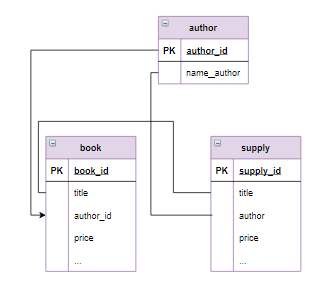

условие соединения можно записать в виде:

<code class="language-sql hljs">book INNER JOIN author ON author.author_id = book.author_id
     INNER JOIN supply ON book.title = supply.title 
                          and supply.author = author.name_author</code>


In [24]:
read_sql_query("""
WITH updated_books
    AS (
    UPDATE book
        SET amount = book.amount + s.amount
        FROM supply AS s
        WHERE book.price = s.price
            AND book.title = s.title
            AND book.author_id = (SELECT author_id
                                    FROM author
                                    WHERE author.name_author = s.author)
        RETURNING book_id, book.title, book.author_id, genre_id, book.price, book.amount
    )
UPDATE supply
SET amount = 0
WHERE (supply.title, supply.author) IN (SELECT updated_books.title,
                                                author.name_author
                                                FROM updated_books
                                                    JOIN author ON
                                                    author.author_id = updated_books.author_id);
SELECT * FROM book;
""")

,book_id,title,author_id,genre_id,price,amount
0,1,Мастер и Маргарита,1,1,670.990000,3
1,3,Идиот,2,1,460.000000,10
2,4,Братья Карамазовы,2,1,799.010000,3
3,5,Игрок,2,1,480.500000,10
4,6,Стихотворения и поэмы,3,2,650.000000,15
5,8,Лирика,4,2,518.990000,2
6,2,Белая гвардия,1,1,540.500000,12
7,7,Черный человек,3,2,570.200000,12


In [103]:
read_sql_query("""
WITH b AS (
UPDATE book
SET amount = book.amount + query_in.amount,
price = ((book.price * book.amount) + (query_in.price * query_in.amount)) / (book.amount + query_in.amount)
FROM (
SELECT
book.author_id, book.title, supply.amount, supply.price
FROM book
    INNER JOIN author ON book.author_id = author.author_id
    INNER JOIN supply ON (supply.author = author.name_author)
    AND (supply.title = book.title)
    AND (supply.price != book.price)) AS query_in
WHERE (book.title = query_in.title)
AND (book.author_id = query_in.author_id)

RETURNING book_id, book.title, book.author_id, genre_id, book.price, book.amount)

UPDATE supply
SET amount = 0
WHERE (supply.title, supply.author) 
IN (SELECT b.title, author.name_author
    FROM b
    JOIN author ON
    author.author_id = b.author_id);


SELECT * FROM book;
""")

,book_id,title,author_id,genre_id,price,amount
0,1,Мастер и Маргарита,1,1,670.990000,3
1,2,Белая гвардия,1,1,540.500000,5
2,4,Братья Карамазовы,2,1,799.010000,3
3,5,Игрок,2,1,480.500000,10
4,6,Стихотворения и поэмы,3,2,650.000000,15
5,7,Черный человек,3,2,570.200000,6
6,8,Лирика,4,2,518.990000,2
7,3,Идиот,2,1,437.110000,13


In [104]:
read_sql_query("""
WITH updated_books AS (
UPDATE book
    SET amount = book.amount + s.amount
    FROM supply AS s
    WHERE book.price = s.price
        AND book.title = s.title
        AND book.author_id = (SELECT author_id
                                FROM author
                                WHERE author.name_author = s.author)
                                
    RETURNING book_id, book.title, book.author_id, genre_id, book.price, book.amount
    )
    
UPDATE supply
SET amount = 0
WHERE (supply.title, supply.author) IN (
SELECT updated_books.title,
                                                author.name_author
                                                FROM updated_books
                                                    JOIN author ON
                                                    author.author_id = updated_books.author_id);
SELECT * FROM book;
""")

,book_id,title,author_id,genre_id,price,amount
0,1,Мастер и Маргарита,1,1,670.990000,3
1,3,Идиот,2,1,460.000000,10
2,4,Братья Карамазовы,2,1,799.010000,3
3,5,Игрок,2,1,480.500000,10
4,6,Стихотворения и поэмы,3,2,650.000000,15
5,8,Лирика,4,2,518.990000,2
6,2,Белая гвардия,1,1,540.500000,12
7,7,Черный человек,3,2,570.200000,12
